In [1]:
import numpy as np
import pandas as pd
import keras
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [2]:
X_train_1 = pd.read_csv('dataset storey 1.csv',index_col=None).iloc[:,:-3]
y_train_1 = pd.read_csv('dataset storey 1.csv',index_col=None).iloc[:,[-3,-2]]
X_test_1 = pd.read_csv('datatest storey 1.csv',index_col=None).iloc[:,:-3]
y_test_1 = pd.read_csv('datatest storey 1.csv',index_col=None).iloc[:,[-3,-2]]
print(X_train_1)
print(X_test_1)

        0     1     2     3     4     5
0   -75.0 -79.0 -81.0 -18.0 -53.0 -60.0
1   -73.0 -81.0 -80.0 -18.0 -52.0 -60.0
2   -74.0 -79.0 -77.0 -15.0 -49.0 -59.0
3   -73.0 -77.0 -80.0 -15.0 -50.0 -61.0
4   -72.0 -80.0 -81.0 -15.0 -49.0 -60.0
..    ...   ...   ...   ...   ...   ...
677 -71.0 -67.0 -66.0 -50.0 -49.0 -39.0
678 -71.0 -68.0 -66.0 -51.0 -50.0 -37.0
679 -73.0 -68.0 -66.0 -50.0 -52.0 -37.0
680 -71.0 -67.0 -65.0 -50.0 -50.0 -39.0
681 -73.0 -66.0 -67.0 -49.0 -51.0 -38.0

[682 rows x 6 columns]
       0     1     2     3     4     5
0  -73.0 -82.0 -81.0 -17.0 -50.0 -59.0
1  -73.0 -76.0 -82.0 -18.0 -50.0 -61.0
2  -72.0 -80.0 -81.0 -19.0 -48.0 -60.0
3  -74.0 -79.0 -81.0 -18.0 -50.0 -60.0
4  -74.0 -79.0 -80.0 -18.0 -51.0 -60.0
..   ...   ...   ...   ...   ...   ...
95 -70.0 -67.0 -66.0 -49.0 -49.0 -38.0
96 -73.0 -66.0 -66.0 -50.0 -50.0 -40.0
97 -72.0 -68.0 -65.0 -51.0 -50.0 -72.0
98 -71.0 -68.0 -66.0 -50.0 -49.0 -38.0
99 -70.0 -70.0 -65.0 -50.0 -42.0 -39.0

[100 rows x 6 columns]


In [3]:
X_train_2 = pd.read_csv('dataset storey 2.csv',index_col=None).iloc[:,:-3]
y_train_2 = pd.read_csv('dataset storey 2.csv',index_col=None).iloc[:,[-3,-2]]
X_test_2 = pd.read_csv('datatest storey 2.csv',index_col=None).iloc[:,:-3]
y_test_2 = pd.read_csv('datatest storey 2.csv',index_col=None).iloc[:,[-3,-2]]
print(X_train_2)
print(X_test_2)

         0     1     2     3     4     5
0    -54.0 -63.0 -63.0 -73.0 -78.0 -76.0
1    -48.0 -67.0 -65.0 -76.0 -79.0 -75.0
2    -52.0 -57.0 -61.0 -72.0 -74.0 -73.0
3    -52.0 -56.0 -61.0 -72.0 -75.0 -74.0
4    -50.0 -57.0 -61.0 -72.0 -75.0 -75.0
...    ...   ...   ...   ...   ...   ...
1058 -57.0 -51.0 -16.0 -84.0 -79.0 -71.0
1059 -57.0 -51.0 -17.0 -84.0 -79.0 -71.0
1060 -58.0 -50.0 -74.0 -84.0 -80.0 -72.0
1061 -60.0 -53.0 -19.0 -84.0 -80.0 -73.0
1062 -55.0 -51.0 -16.0 -84.0 -78.0 -73.0

[1063 rows x 6 columns]
        0     1     2     3     4     5
0   -51.0 -61.0 -63.0 -74.0 -76.0 -72.0
1   -50.0 -61.0 -63.0 -73.0 -75.0 -74.0
2   -51.0 -60.0 -70.0 -75.0 -75.0 -74.0
3   -50.0 -59.0 -62.0 -73.0 -75.0 -74.0
4   -53.0 -65.0 -65.0 -75.0 -75.0 -74.0
..    ...   ...   ...   ...   ...   ...
155 -59.0 -51.0 -18.0 -85.0 -80.0 -74.0
156 -58.0 -52.0 -18.0 -86.0 -79.0 -73.0
157 -60.0 -53.0 -18.0 -80.0 -79.0 -74.0
158 -60.0 -54.0 -21.0 -87.0 -83.0 -73.0
159 -59.0 -52.0 -18.0 -87.0 -80.0 -76.0

[1

In [4]:
X_train_full = pd.read_csv('dataset multi storey.csv',index_col=None).iloc[:,:-3]
y_train_full = pd.read_csv('dataset multi storey.csv',index_col=None).iloc[:,[-1]]
X_test_full = pd.read_csv('datatest multi storey.csv',index_col=None).iloc[:,:-3]
y_test_full = pd.read_csv('datatest multi storey.csv',index_col=None).iloc[:,[-1]]
y_test_full2 = pd.read_csv('datatest multi storey.csv',index_col=None).iloc[:,[-3,-2]]
print(X_train_full)
print(X_test_full)

         0     1     2     3     4     5
0    -75.0 -79.0 -81.0 -18.0 -53.0 -60.0
1    -73.0 -81.0 -80.0 -18.0 -52.0 -60.0
2    -74.0 -79.0 -77.0 -15.0 -49.0 -59.0
3    -73.0 -77.0 -80.0 -15.0 -50.0 -61.0
4    -72.0 -80.0 -81.0 -15.0 -49.0 -60.0
...    ...   ...   ...   ...   ...   ...
1740 -57.0 -51.0 -16.0 -84.0 -79.0 -71.0
1741 -57.0 -51.0 -17.0 -84.0 -79.0 -71.0
1742 -58.0 -50.0 -74.0 -84.0 -80.0 -72.0
1743 -60.0 -53.0 -19.0 -84.0 -80.0 -73.0
1744 -55.0 -51.0 -16.0 -84.0 -78.0 -73.0

[1745 rows x 6 columns]
        0     1     2     3     4     5
0   -73.0 -82.0 -81.0 -17.0 -50.0 -59.0
1   -73.0 -76.0 -82.0 -18.0 -50.0 -61.0
2   -72.0 -80.0 -81.0 -19.0 -48.0 -60.0
3   -74.0 -79.0 -81.0 -18.0 -50.0 -60.0
4   -74.0 -79.0 -80.0 -18.0 -51.0 -60.0
..    ...   ...   ...   ...   ...   ...
255 -59.0 -51.0 -18.0 -85.0 -80.0 -74.0
256 -58.0 -52.0 -18.0 -86.0 -79.0 -73.0
257 -60.0 -53.0 -18.0 -80.0 -79.0 -74.0
258 -60.0 -54.0 -21.0 -87.0 -83.0 -73.0
259 -59.0 -52.0 -18.0 -87.0 -80.0 -76.0

[2

In [5]:
y_test_full

8
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
..   ...
255  2.0
256  2.0
257  2.0
258  2.0
259  2.0

[260 rows x 1 columns]

In [6]:
def custom_mse(y_true, y_pred):
    err=y_true - y_pred
    err2= np.square(err)
    err3 =np.sum(err2,axis=1)
    err4 =np.sqrt(err3)
    loss =np.sum(err4)/err4.shape[0]
    
    return loss
def stdev(mse,y_true,y_pred):
    err= y_true - y_pred
    err2= np.square(err)
    err3 =np.sum(err2,axis=1)
    err4 =np.sqrt(err3)
    err5 =mse-err4
    err6 =np.square(err5)
    dev = np.sqrt(np.sum(err6)/err4.shape[0])
    
    return dev

In [7]:
model_rf1 = RandomForestRegressor(random_state=42,criterion='mse')
model_rf2 = RandomForestRegressor(random_state=42,criterion='mse')
model_rf3 = RandomForestClassifier(random_state=42,criterion='entropy')

param_model_rf = {'n_estimators': [10,20,50,100,200],
    'max_depth' : [4,5,8],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'bootstrap' : [True, False]}

cv_rf1 = RandomizedSearchCV(estimator=model_rf1, param_distributions=param_model_rf, cv= 5)
cv_rf2 = RandomizedSearchCV(estimator=model_rf2, param_distributions=param_model_rf, cv= 5)
cv_rf3 = RandomizedSearchCV(estimator=model_rf3, param_distributions=param_model_rf, cv= 5)

model_knn1 = neighbors.KNeighborsRegressor()
model_knn2 = neighbors.KNeighborsRegressor()
model_knn3 = neighbors.KNeighborsClassifier()

param_model_knn = {'n_neighbors' :[1,2,5,10],
                   'weights' : ['uniform', 'distance']}

cv_knn1 = RandomizedSearchCV(estimator=model_knn1, param_distributions=param_model_knn, cv= 5)
cv_knn2 = RandomizedSearchCV(estimator=model_knn2, param_distributions=param_model_knn, cv= 5)
cv_knn3 = RandomizedSearchCV(estimator=model_knn3, param_distributions=param_model_knn, cv= 5)

cv_rf1.fit(X_train_1,y_train_1)
cv_knn1.fit(X_train_1,y_train_1)

cv_rf2.fit(X_train_2,y_train_2)
cv_knn2.fit(X_train_2,y_train_2)

cv_rf3.fit(X_train_full,y_train_full)
cv_knn3.fit(X_train_full,y_train_full)

C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  

C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  

C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  

C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  

C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  

C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  

C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  

C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pa

C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pa

C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Refa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 2, 5, 10],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [8]:
print(cv_rf1.best_params_)
print(cv_knn1.best_params_)

print(cv_rf2.best_params_)
print(cv_knn2.best_params_)

print(cv_rf3.best_params_)
print(cv_knn3.best_params_)

{'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 8, 'bootstrap': True}
{'weights': 'uniform', 'n_neighbors': 10}
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 4, 'bootstrap': True}
{'weights': 'distance', 'n_neighbors': 10}
{'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'bootstrap': True}
{'weights': 'uniform', 'n_neighbors': 2}


In [9]:
best_rf1 = cv_rf1.best_estimator_
best_knn1 = cv_knn1.best_estimator_

best_rf2= cv_rf2.best_estimator_
best_knn2= cv_knn2.best_estimator_

best_rf3 = cv_rf3.best_estimator_
best_knn3= cv_knn3.best_estimator_

In [10]:
pred1_lantai = best_rf3.predict(X_test_full)
pred2_lantai = best_knn3.predict(X_test_full)

print('Classification report for Random Forest')
print(classification_report(y_test_full, pred1_lantai))

print('Classification report for kNN')
print(classification_report(y_test_full, pred2_lantai))

Classification report for Random Forest
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       100
         2.0       1.00      1.00      1.00       160

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260

Classification report for kNN
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       100
         2.0       1.00      1.00      1.00       160

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260



In [45]:
y_test_full.iloc[i][0]

2.0

Lantai 1.0.


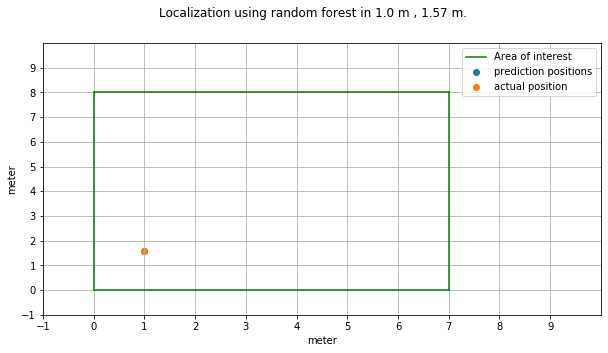

Nilai MAE untuk RF: 0.00 meter.
1.0

Lantai 1.0.


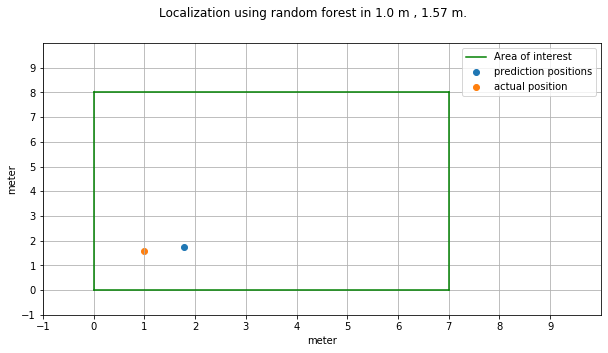

Nilai MAE untuk RF: 0.80 meter.
1.7799999999999998

Lantai 1.0.


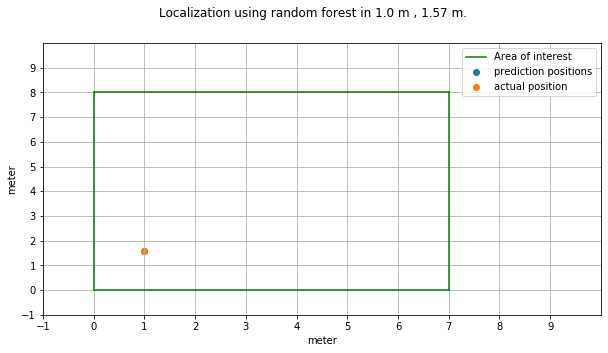

Nilai MAE untuk RF: 0.00 meter.
1.0

Lantai 1.0.


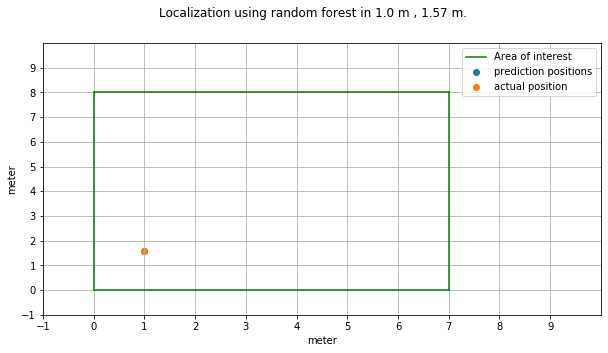

Nilai MAE untuk RF: 0.00 meter.
1.0

Lantai 1.0.


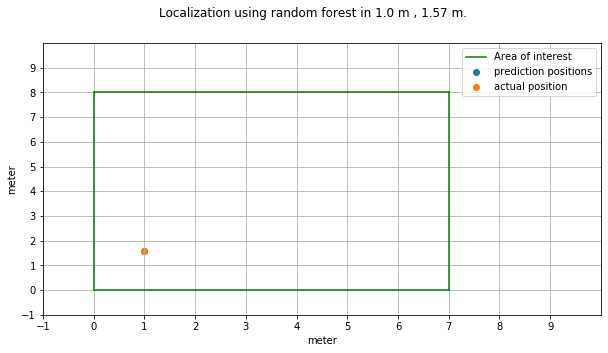

Nilai MAE untuk RF: 0.00 meter.
1.0

Lantai 1.0.


Nilai MAE untuk RF: 0.00 meter.
2.2

Lantai 1.0.


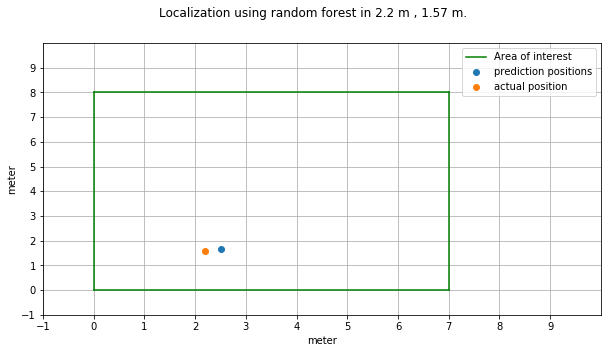

Nilai MAE untuk RF: 0.32 meter.
2.504843091334895

Lantai 1.0.


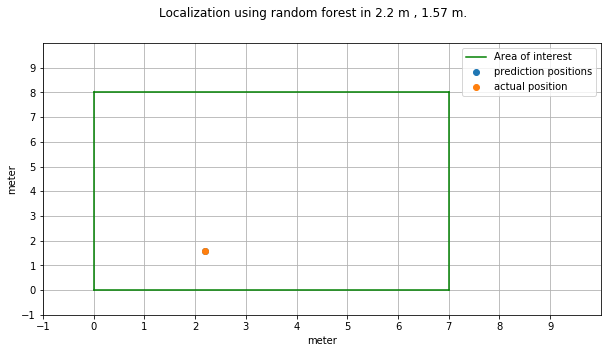

Nilai MAE untuk RF: 0.00 meter.
2.2

Lantai 1.0.


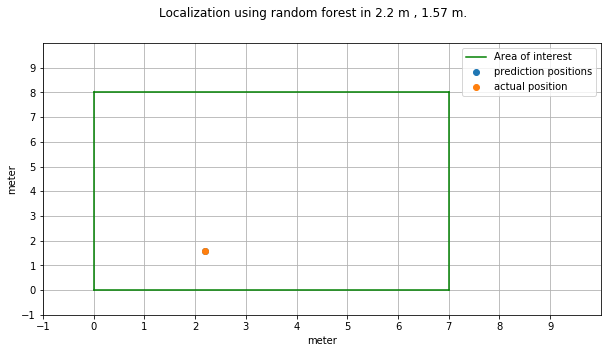

Nilai MAE untuk RF: 0.00 meter.
2.2

Lantai 1.0.


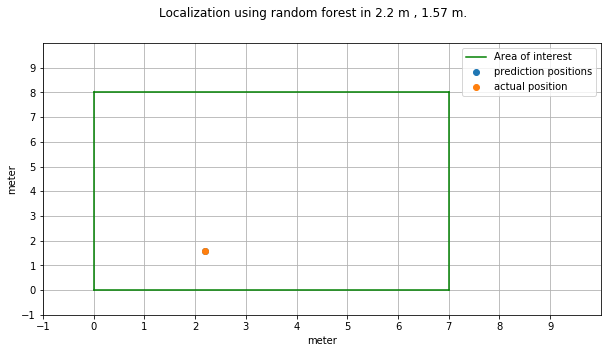

Nilai MAE untuk RF: 0.00 meter.
2.2

Lantai 1.0.


Nilai MAE untuk RF: 0.22 meter.
3.549429321564015

Lantai 1.0.


Nilai MAE untuk RF: 0.22 meter.
3.549429321564015

Lantai 1.0.


Nilai MAE untuk RF: 2.29 meter.
4.031200234192037

Lantai 1.0.


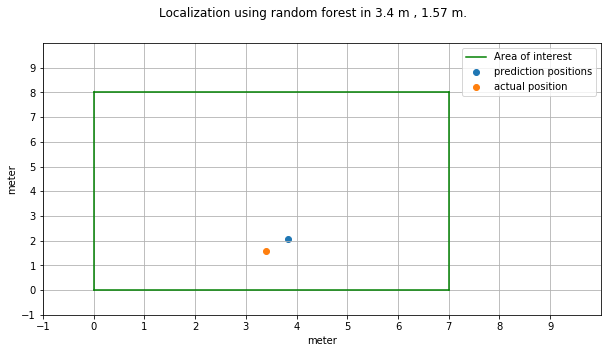

Nilai MAE untuk RF: 0.67 meter.
3.838871944514834

Lantai 1.0.


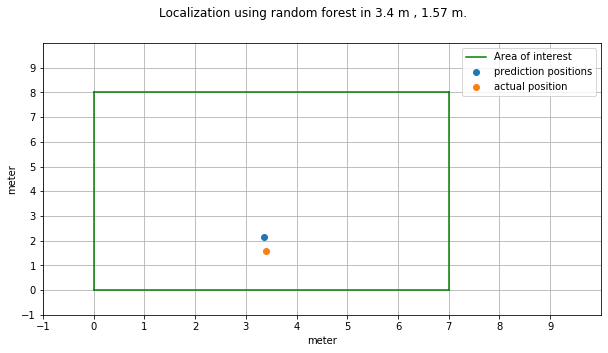

Nilai MAE untuk RF: 0.60 meter.
3.360448420112525

Lantai 1.0.


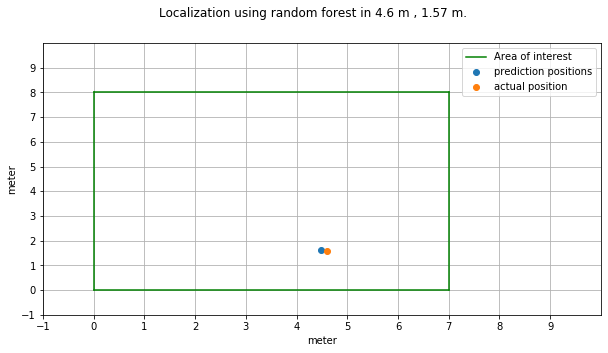

Nilai MAE untuk RF: 0.13 meter.
4.479913145539905

Lantai 1.0.


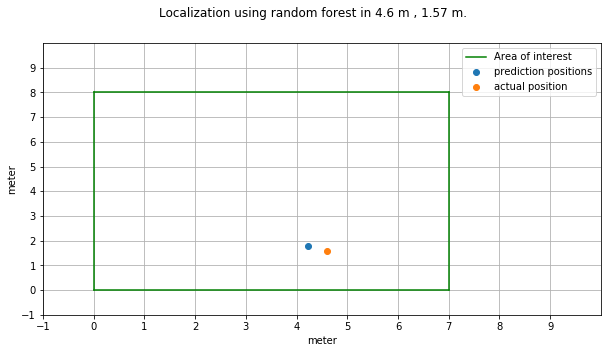

Nilai MAE untuk RF: 0.44 meter.
4.224429274572165

Lantai 1.0.


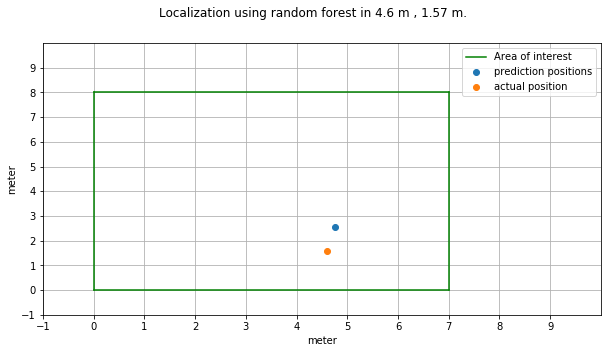

Nilai MAE untuk RF: 0.98 meter.
4.754

Lantai 1.0.


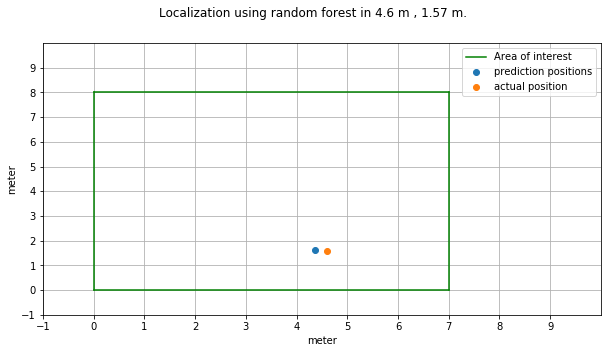

Nilai MAE untuk RF: 0.24 meter.
4.359913145539906

Lantai 1.0.


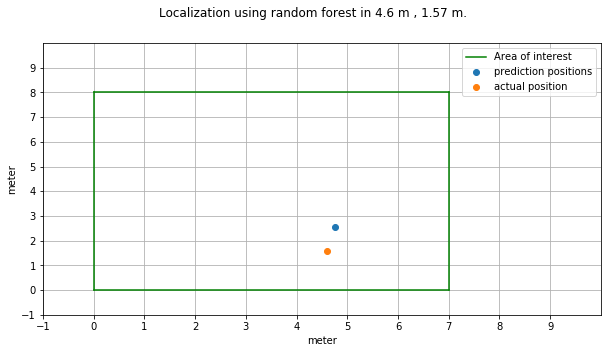

Nilai MAE untuk RF: 0.98 meter.
4.754

Lantai 1.0.


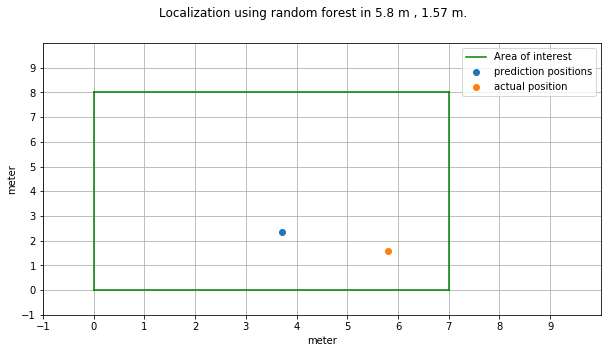

Nilai MAE untuk RF: 2.23 meter.
3.7120719988071045

Lantai 1.0.


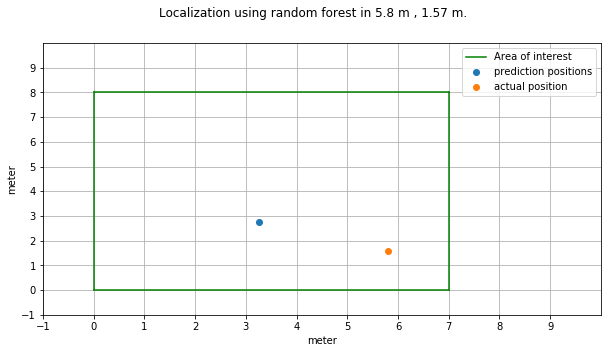

Nilai MAE untuk RF: 2.80 meter.
3.2640000000000002

Lantai 1.0.


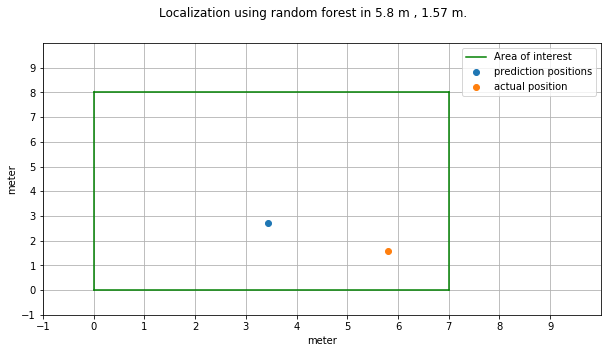

Nilai MAE untuk RF: 2.62 meter.
3.432

Lantai 1.0.


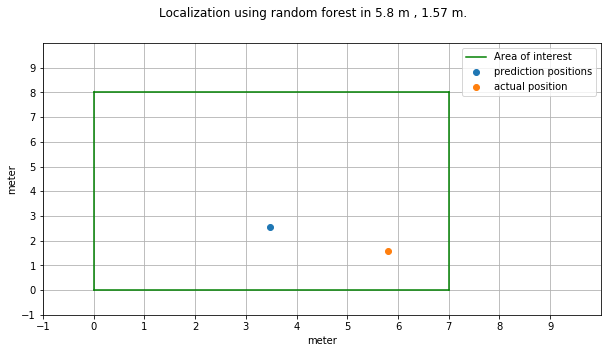

Nilai MAE untuk RF: 2.51 meter.
3.4820019091184506

Lantai 1.0.


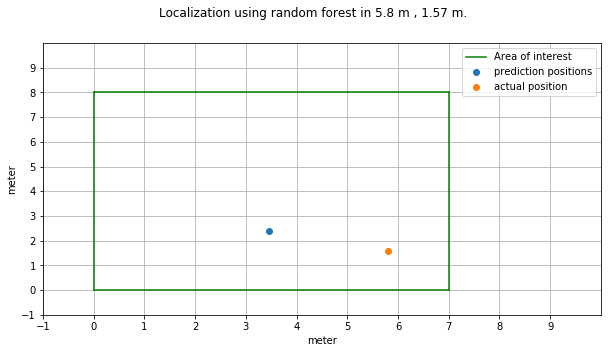

Nilai MAE untuk RF: 2.48 meter.
3.4581175112593305

Lantai 1.0.


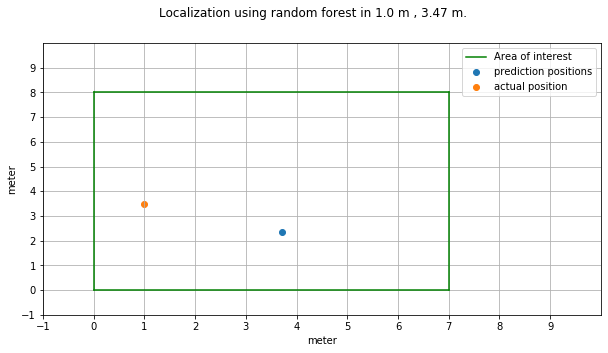

Nilai MAE untuk RF: 2.93 meter.
3.7120719988071045

Lantai 1.0.


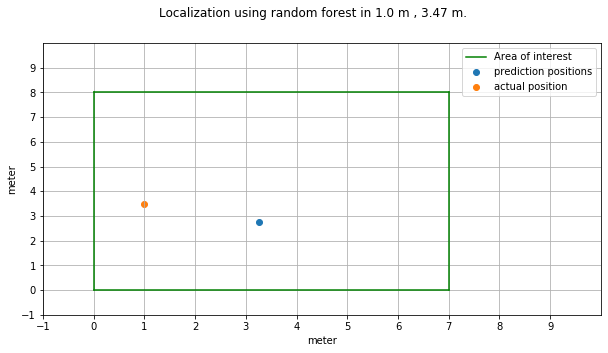

Nilai MAE untuk RF: 2.37 meter.
3.2640000000000002

Lantai 1.0.


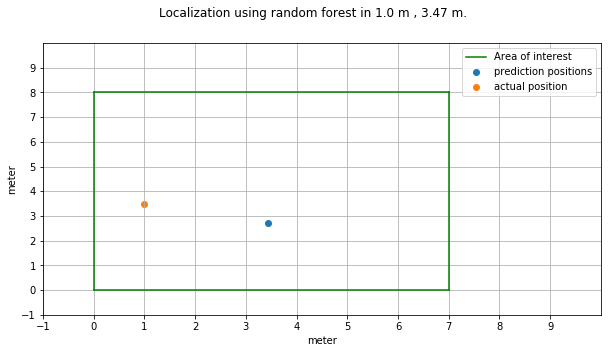

Nilai MAE untuk RF: 2.55 meter.
3.432

Lantai 1.0.


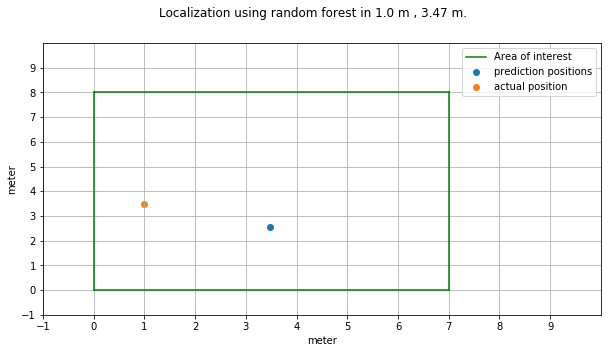

Nilai MAE untuk RF: 2.65 meter.
3.4820019091184506

Lantai 1.0.


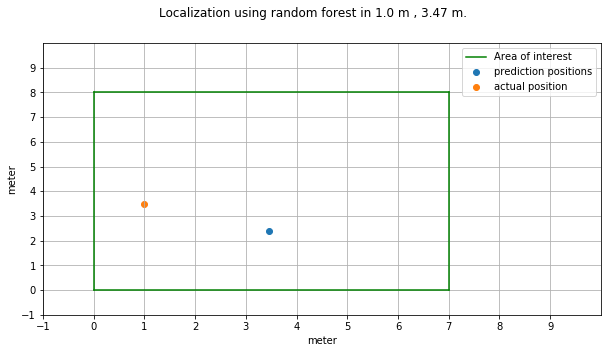

Nilai MAE untuk RF: 2.69 meter.
3.4581175112593305

Lantai 1.0.


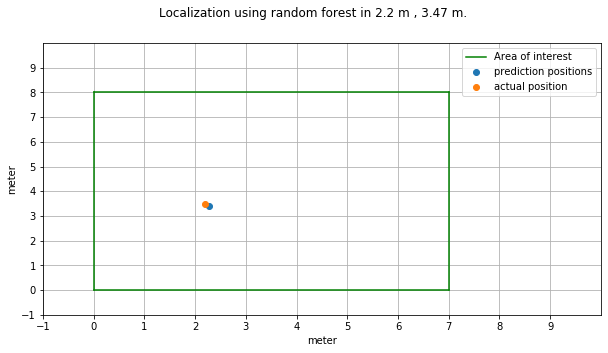

Nilai MAE untuk RF: 0.10 meter.
2.2800000000000002

Lantai 1.0.


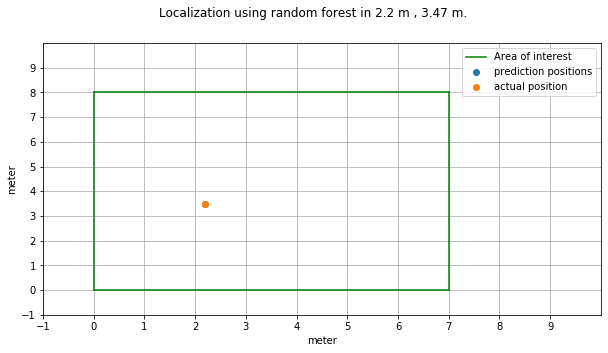

Nilai MAE untuk RF: 0.01 meter.
2.192941176470588

Lantai 1.0.


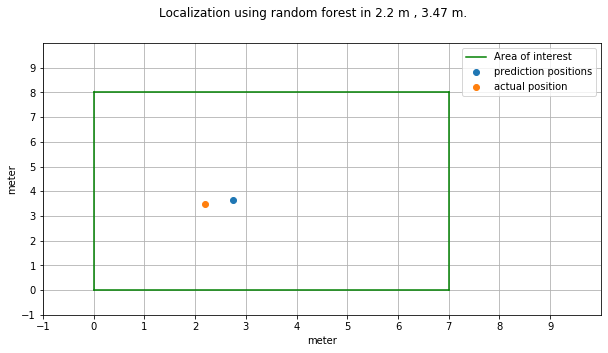

Nilai MAE untuk RF: 0.57 meter.
2.7465940511101805

Lantai 1.0.


Nilai MAE untuk RF: 0.22 meter.
2.3129411764705883

Lantai 1.0.


Nilai MAE untuk RF: 0.38 meter.
2.2600000000000002

Lantai 1.0.


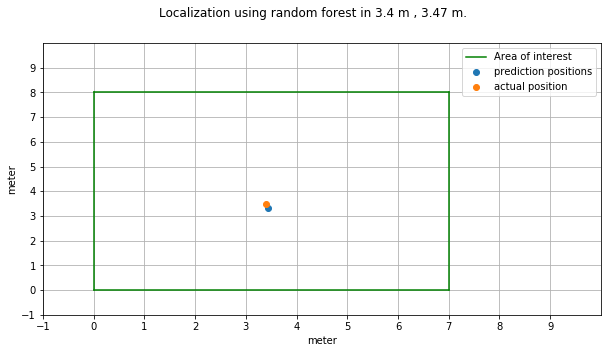

Nilai MAE untuk RF: 0.17 meter.
3.4435858393365066

Lantai 1.0.


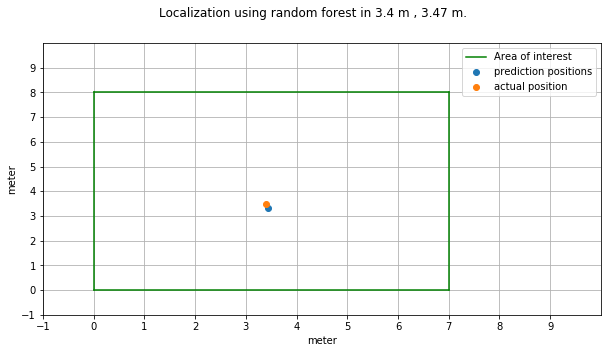

Nilai MAE untuk RF: 0.17 meter.
3.4435858393365066

Lantai 1.0.


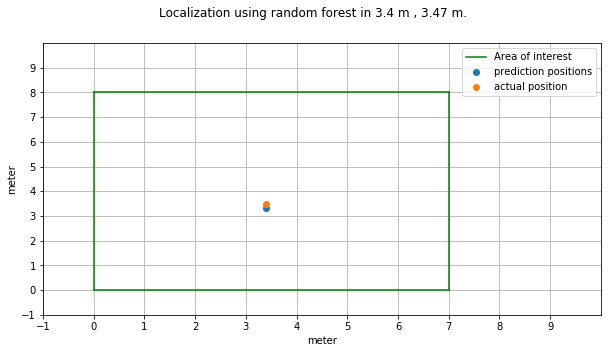

Nilai MAE untuk RF: 0.16 meter.
3.3950144107650777

Lantai 1.0.


Nilai MAE untuk RF: 0.20 meter.
3.198650774401442

Lantai 1.0.


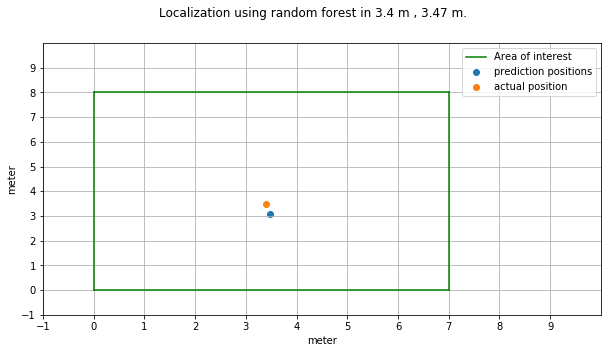

Nilai MAE untuk RF: 0.40 meter.
3.477493291364259

Lantai 1.0.


Nilai MAE untuk RF: 0.07 meter.
4.58

Lantai 1.0.


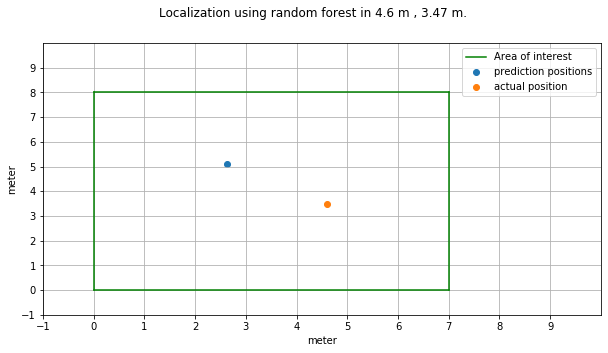

Nilai MAE untuk RF: 2.56 meter.
2.6199999999999997

Lantai 1.0.


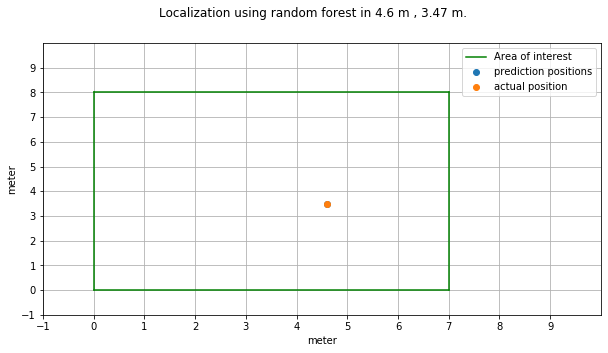

Nilai MAE untuk RF: 0.00 meter.
4.6

Lantai 1.0.


Nilai MAE untuk RF: 0.05 meter.
4.55

Lantai 1.0.


Nilai MAE untuk RF: 0.07 meter.
4.58

Lantai 1.0.


Nilai MAE untuk RF: 0.00 meter.
5.8

Lantai 1.0.


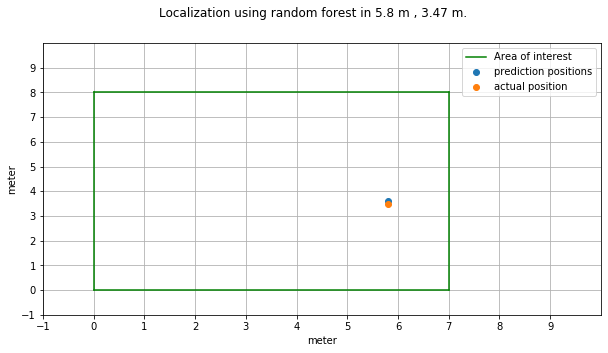

Nilai MAE untuk RF: 0.13 meter.
5.799999999999999

Lantai 1.0.


Nilai MAE untuk RF: 0.00 meter.
5.8

Lantai 1.0.


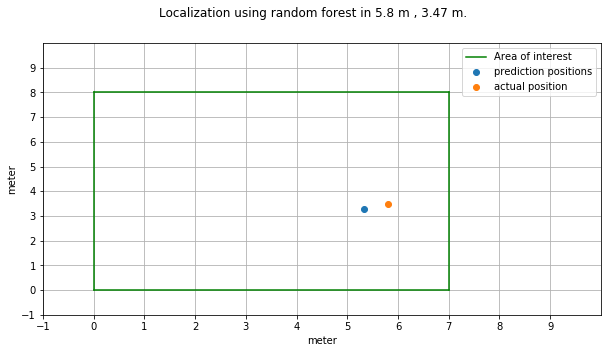

Nilai MAE untuk RF: 0.50 meter.
5.329350649350649

Lantai 1.0.


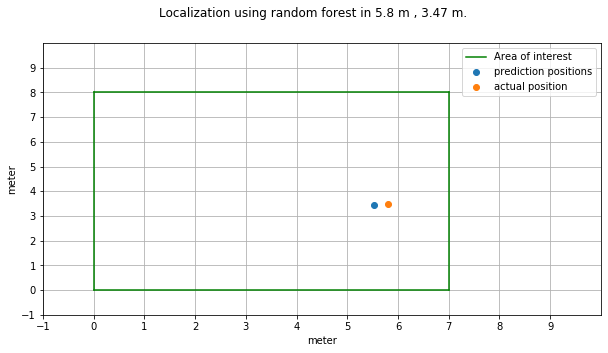

Nilai MAE untuk RF: 0.28 meter.
5.525714285714285

Lantai 1.0.


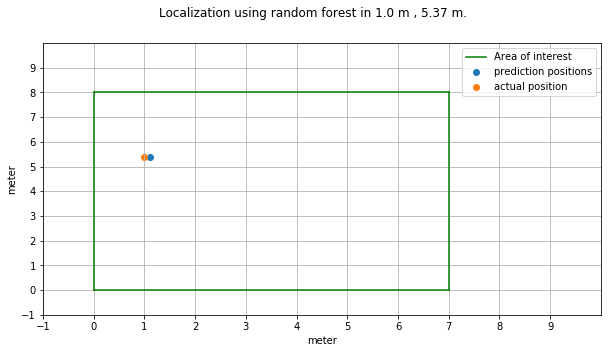

Nilai MAE untuk RF: 0.12 meter.
1.1199999999999999

Lantai 1.0.


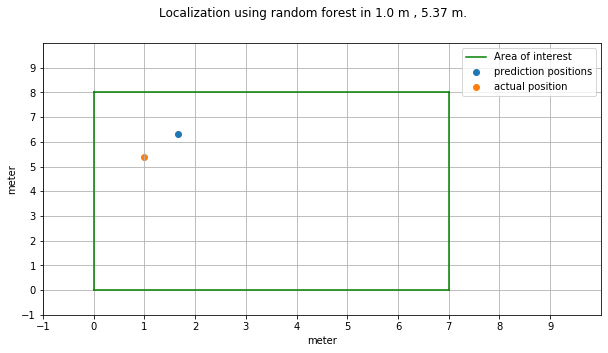

Nilai MAE untuk RF: 1.16 meter.
1.6599999999999997

Lantai 1.0.


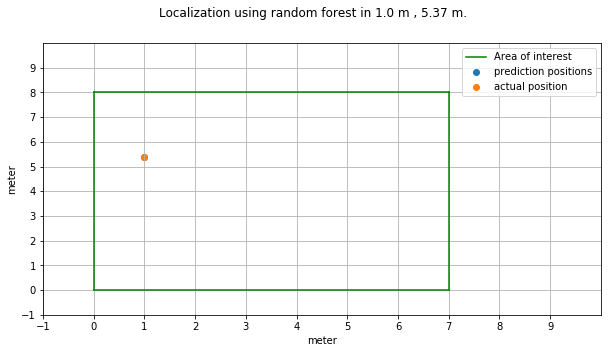

Nilai MAE untuk RF: 0.00 meter.
1.0

Lantai 1.0.


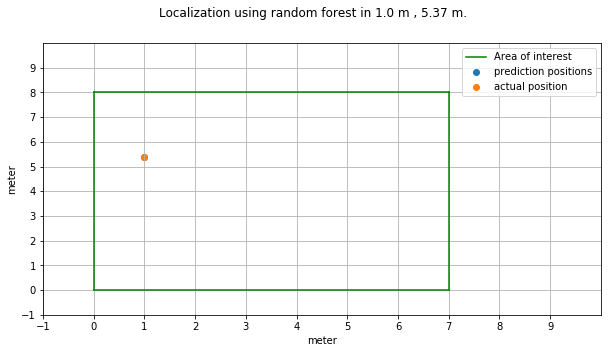

Nilai MAE untuk RF: 0.00 meter.
1.0

Lantai 1.0.


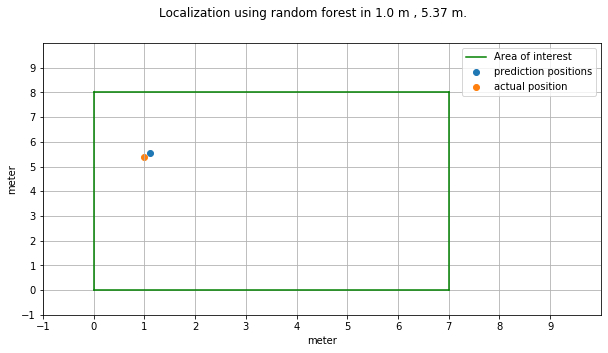

Nilai MAE untuk RF: 0.22 meter.
1.1199999999999999

Lantai 1.0.


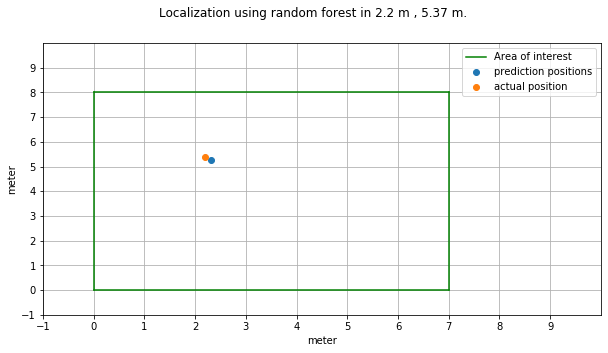

Nilai MAE untuk RF: 0.15 meter.
2.3200000000000003

Lantai 1.0.


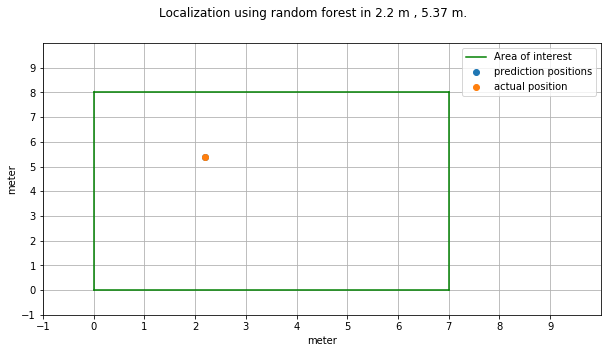

Nilai MAE untuk RF: 0.00 meter.
2.2

Lantai 1.0.


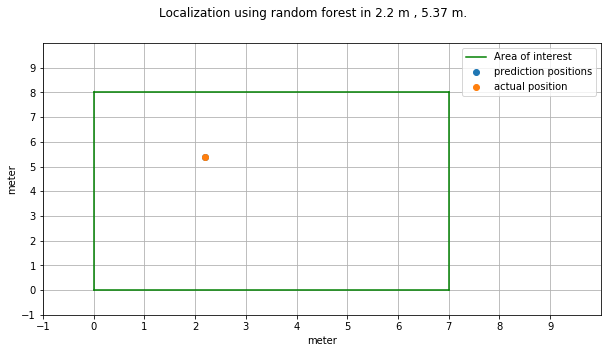

Nilai MAE untuk RF: 0.00 meter.
2.2

Lantai 1.0.


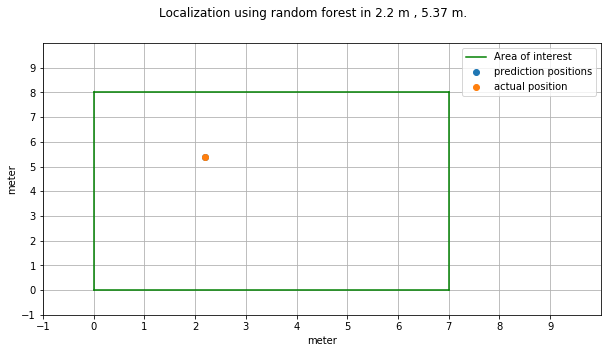

Nilai MAE untuk RF: 0.00 meter.
2.2

Lantai 1.0.


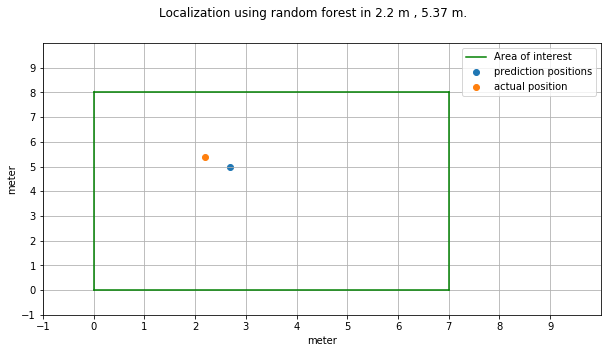

Nilai MAE untuk RF: 0.61 meter.
2.6799999999999997

Lantai 1.0.


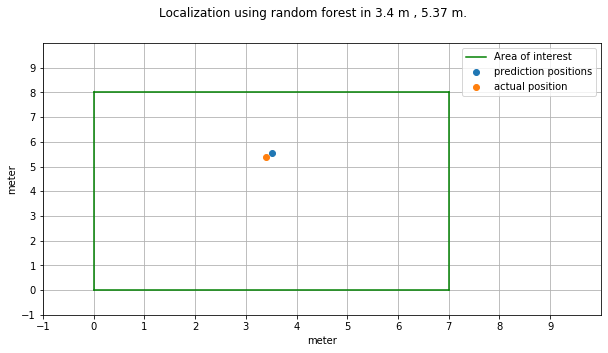

Nilai MAE untuk RF: 0.22 meter.
3.5140000000000002

Lantai 1.0.


Nilai MAE untuk RF: 0.12 meter.
3.5200000000000005

Lantai 1.0.


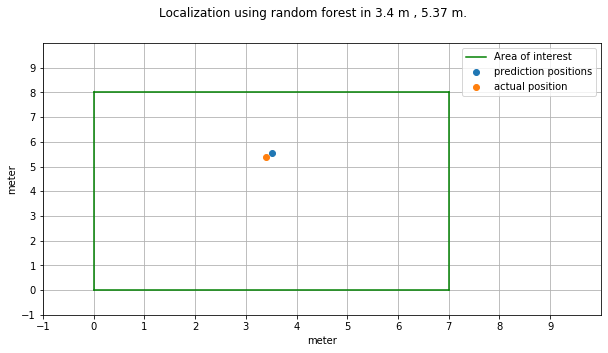

Nilai MAE untuk RF: 0.22 meter.
3.5140000000000002

Lantai 1.0.


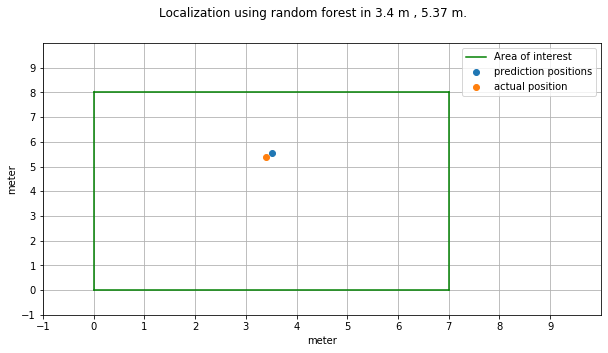

Nilai MAE untuk RF: 0.22 meter.
3.5140000000000002

Lantai 1.0.


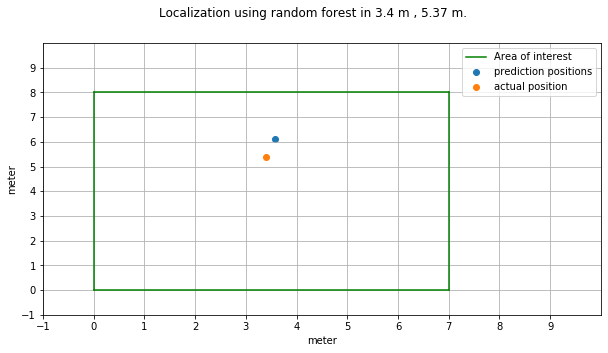

Nilai MAE untuk RF: 0.78 meter.
3.5799999999999996

Lantai 1.0.


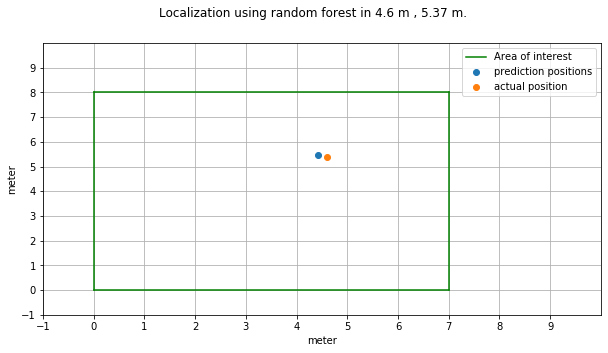

Nilai MAE untuk RF: 0.20 meter.
4.419999999999999

Lantai 1.0.


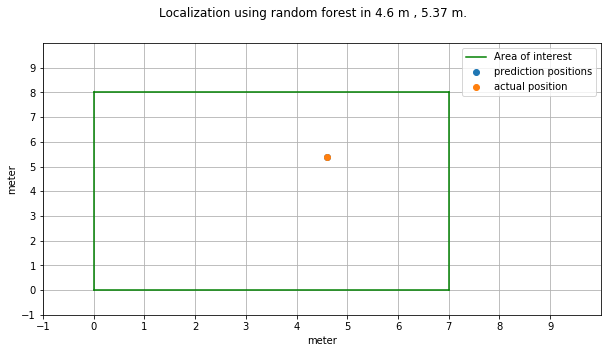

Nilai MAE untuk RF: 0.00 meter.
4.6

Lantai 1.0.


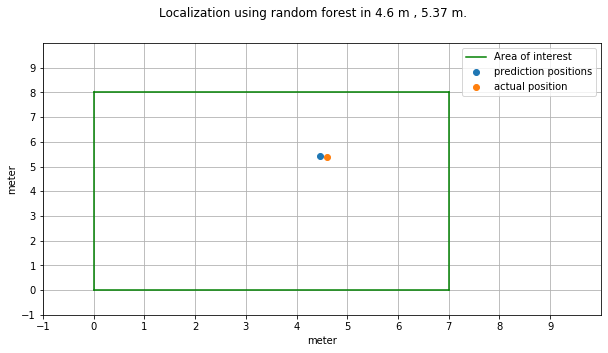

Nilai MAE untuk RF: 0.16 meter.
4.4559999999999995

Lantai 1.0.


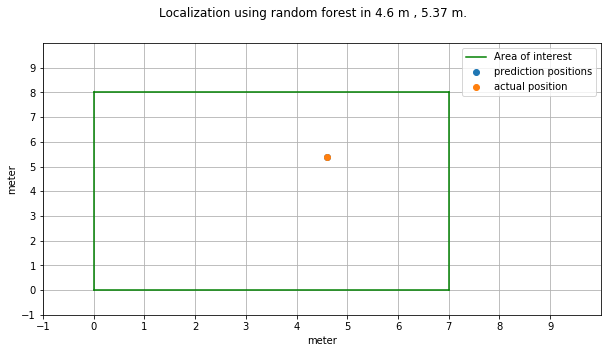

Nilai MAE untuk RF: 0.00 meter.
4.6

Lantai 1.0.


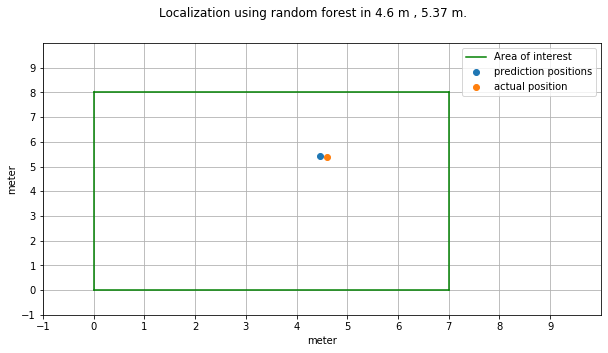

Nilai MAE untuk RF: 0.16 meter.
4.4559999999999995

Lantai 1.0.


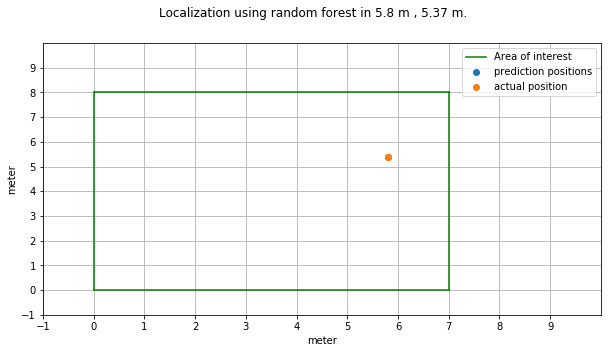

Nilai MAE untuk RF: 0.00 meter.
5.8

Lantai 1.0.


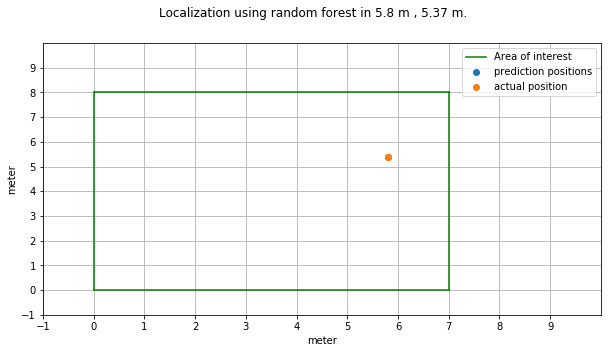

Nilai MAE untuk RF: 0.00 meter.
5.8

Lantai 1.0.


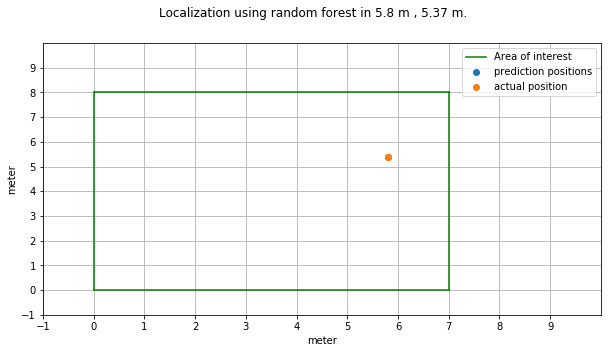

Nilai MAE untuk RF: 0.00 meter.
5.799999999999999

Lantai 1.0.


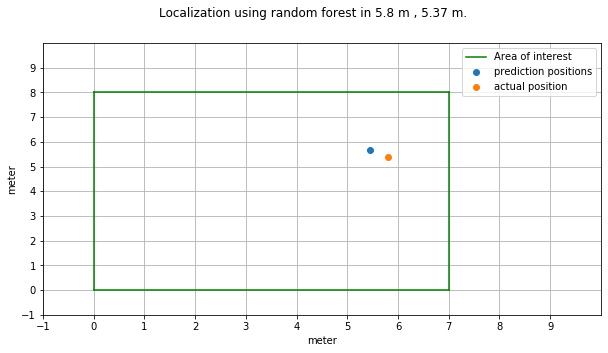

Nilai MAE untuk RF: 0.46 meter.
5.4399999999999995

Lantai 1.0.


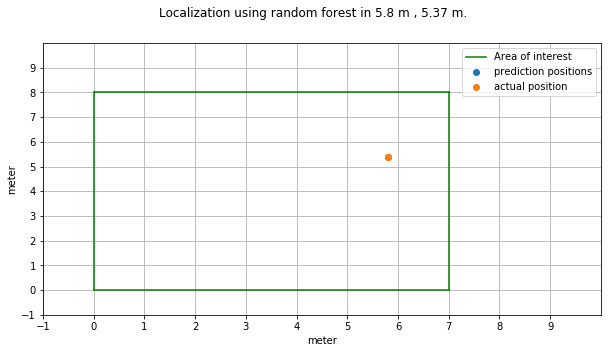

Nilai MAE untuk RF: 0.00 meter.
5.8

Lantai 1.0.


Nilai MAE untuk RF: 0.62 meter.
1.5799999999999998

Lantai 1.0.


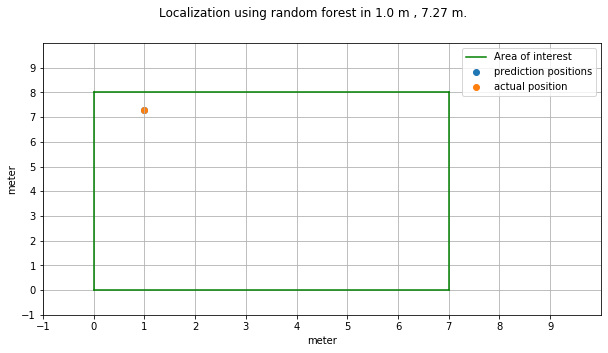

Nilai MAE untuk RF: 0.00 meter.
1.0

Lantai 1.0.


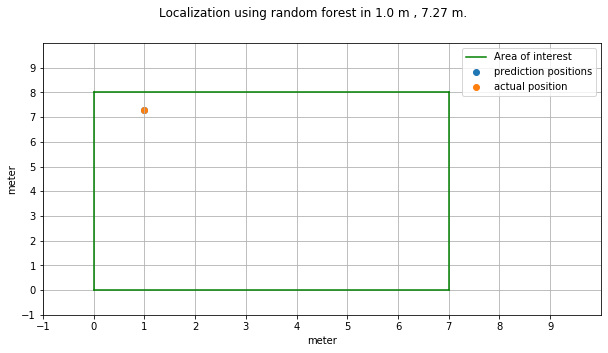

Nilai MAE untuk RF: 0.00 meter.
1.0

Lantai 1.0.


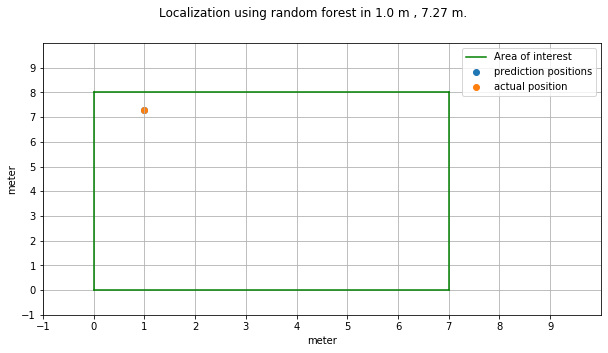

Nilai MAE untuk RF: 0.00 meter.
1.0

Lantai 1.0.


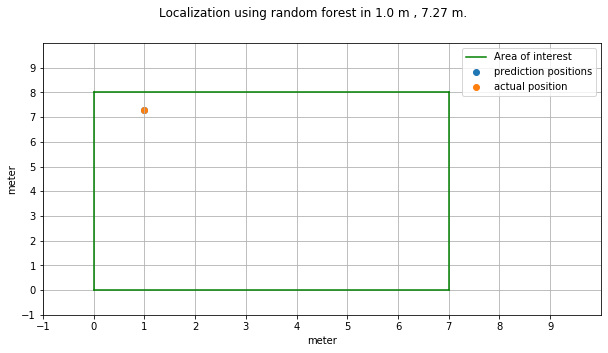

Nilai MAE untuk RF: 0.00 meter.
1.0

Lantai 1.0.


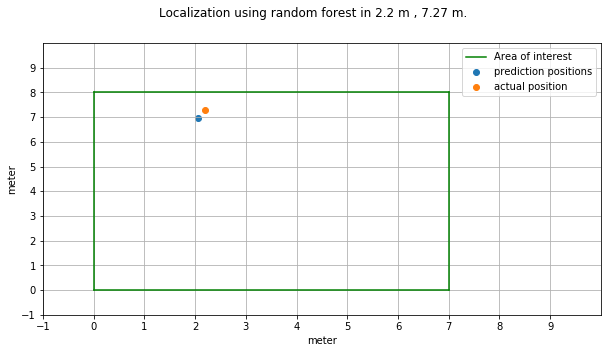

Nilai MAE untuk RF: 0.35 meter.
2.0599999999999996

Lantai 1.0.


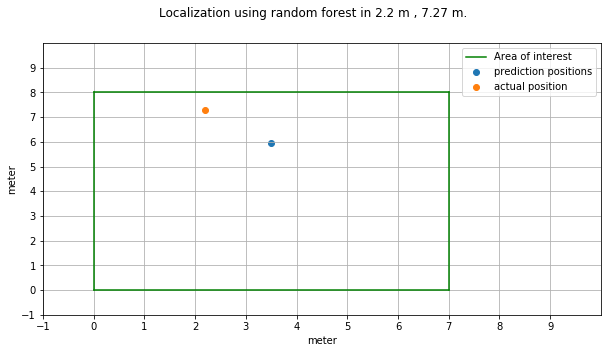

Nilai MAE untuk RF: 1.84 meter.
3.5

Lantai 1.0.


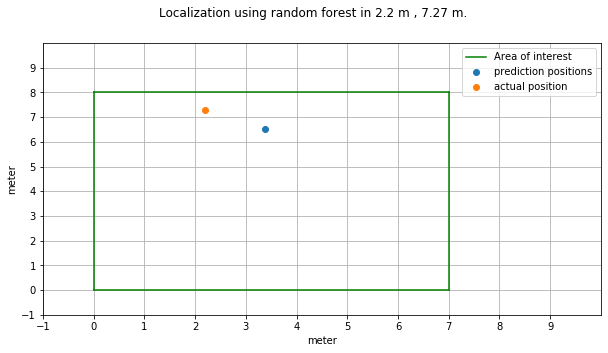

Nilai MAE untuk RF: 1.38 meter.
3.3760000000000003

Lantai 1.0.


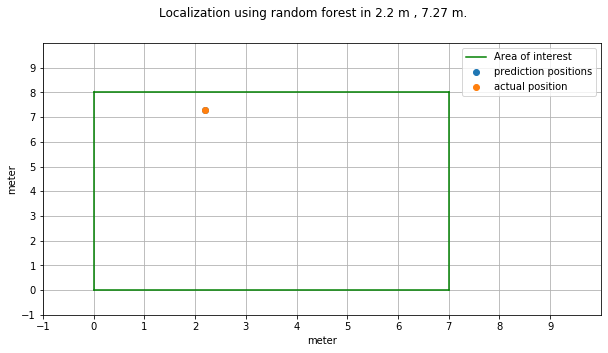

Nilai MAE untuk RF: 0.00 meter.
2.1999999999999997

Lantai 1.0.


Nilai MAE untuk RF: 0.63 meter.
1.9100000000000001

Lantai 1.0.


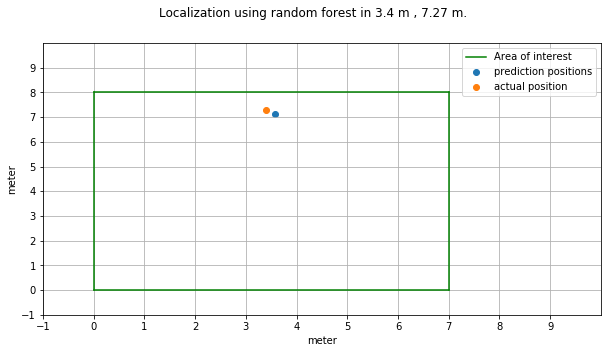

Nilai MAE untuk RF: 0.23 meter.
3.579999999999999

Lantai 1.0.


Nilai MAE untuk RF: 0.05 meter.
3.351999999999999

Lantai 1.0.


Nilai MAE untuk RF: 0.00 meter.
3.4

Lantai 1.0.


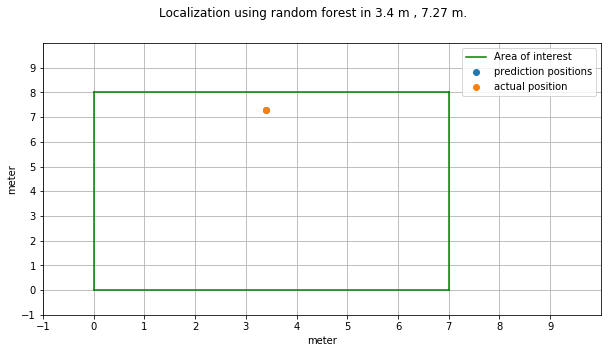

Nilai MAE untuk RF: 0.00 meter.
3.4

Lantai 1.0.


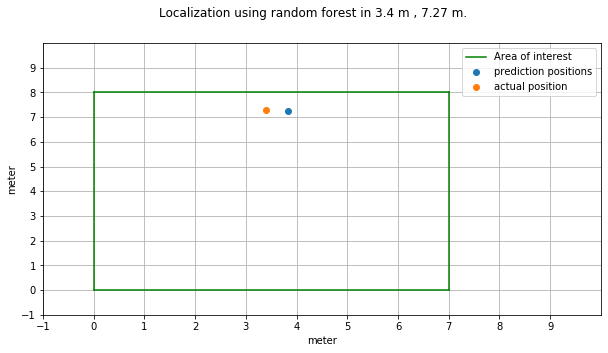

Nilai MAE untuk RF: 0.42 meter.
3.8225714285714276

Lantai 1.0.


Nilai MAE untuk RF: 0.01 meter.
4.590571428571428

Lantai 1.0.


Nilai MAE untuk RF: 0.01 meter.
4.590571428571428

Lantai 1.0.


Nilai MAE untuk RF: 0.01 meter.
4.590571428571428

Lantai 1.0.


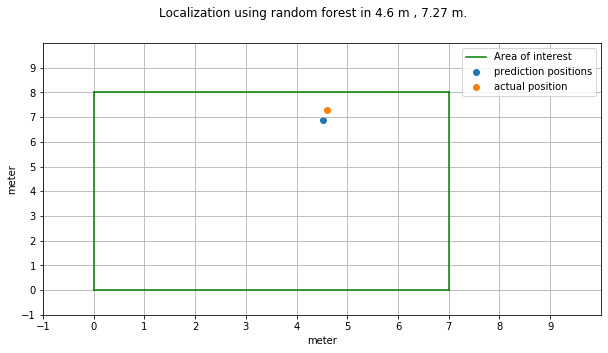

Nilai MAE untuk RF: 0.39 meter.
4.5200000000000005

Lantai 1.0.


Nilai MAE untuk RF: 0.48 meter.
4.574

Lantai 1.0.


Nilai MAE untuk RF: 0.00 meter.
5.799999999999999

Lantai 1.0.


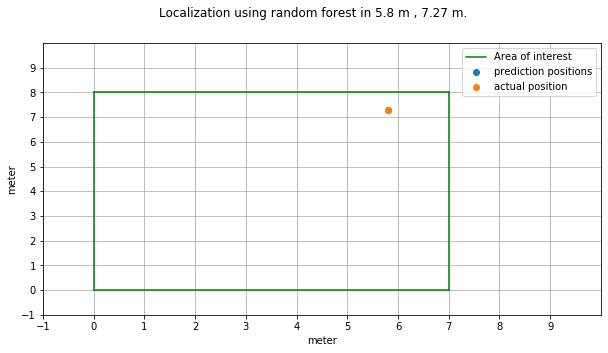

Nilai MAE untuk RF: 0.00 meter.
5.799999999999999

Lantai 1.0.


Nilai MAE untuk RF: 3.37 meter.
4.9399999999999995

Lantai 1.0.


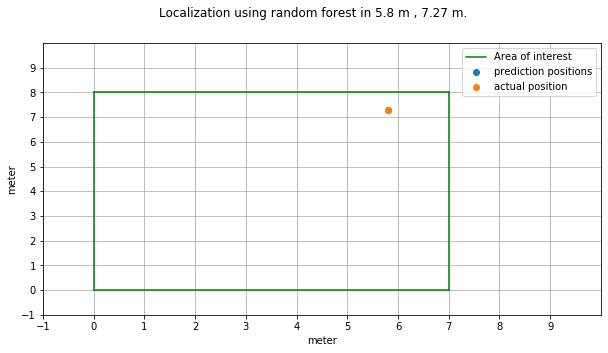

Nilai MAE untuk RF: 0.00 meter.
5.799999999999999

Lantai 1.0.


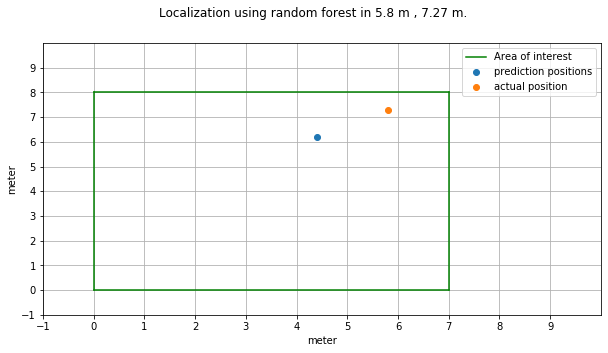

Nilai MAE untuk RF: 1.77 meter.
4.3999999999999995

Lantai 2.0.


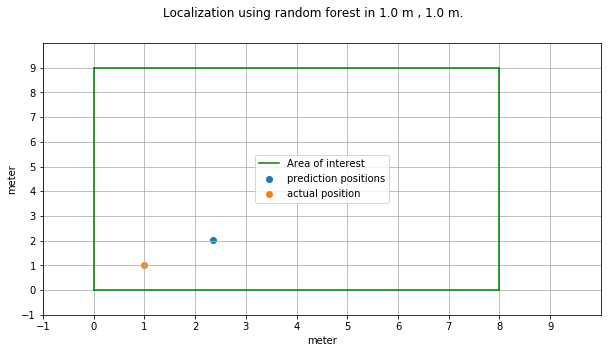

Nilai MAE untuk RF: 1.70 meter.

Lantai 2.0.


Nilai MAE untuk RF: 1.69 meter.

Lantai 2.0.


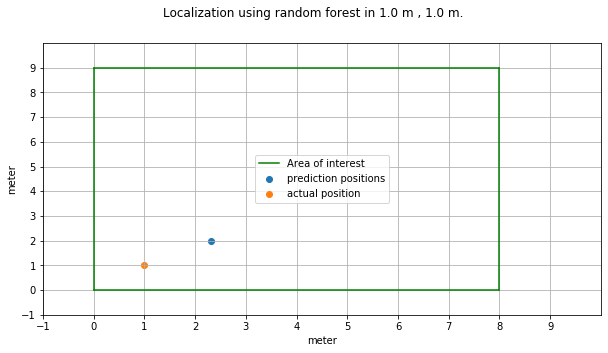

Nilai MAE untuk RF: 1.65 meter.

Lantai 2.0.


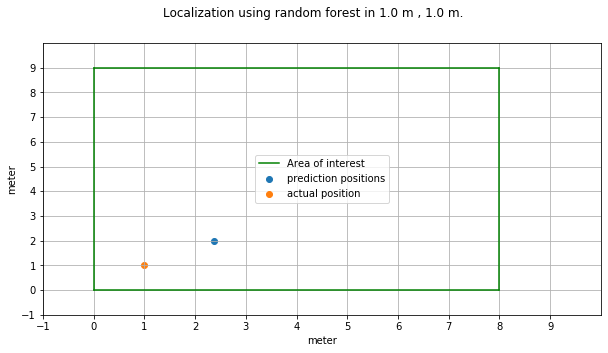

Nilai MAE untuk RF: 1.69 meter.

Lantai 2.0.


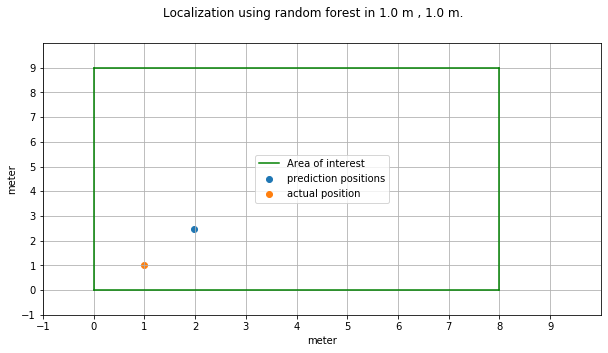

Nilai MAE untuk RF: 1.77 meter.

Lantai 2.0.


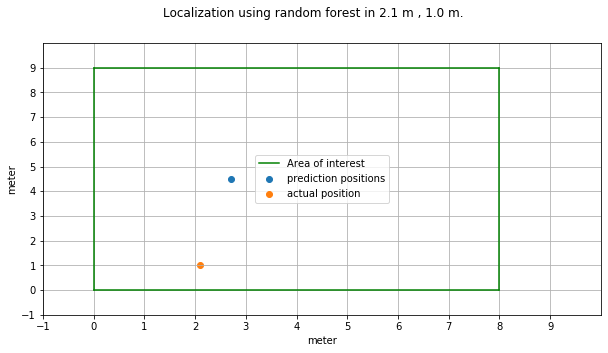

Nilai MAE untuk RF: 3.54 meter.

Lantai 2.0.


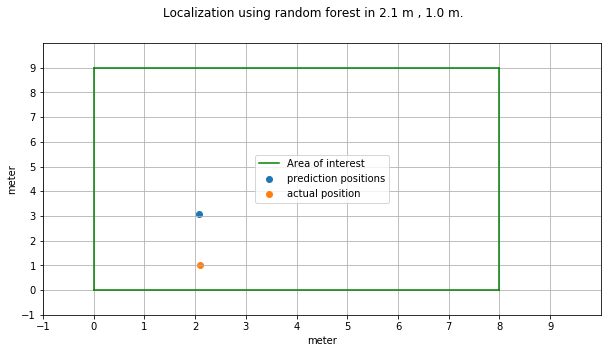

Nilai MAE untuk RF: 2.07 meter.

Lantai 2.0.


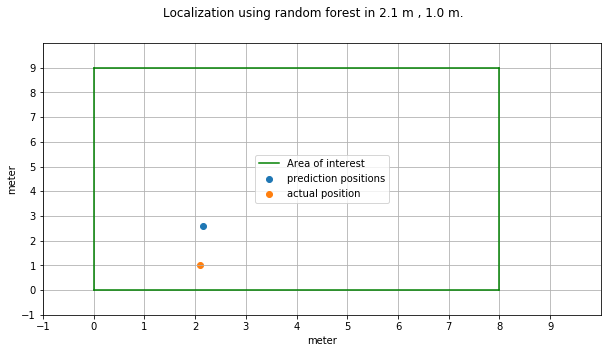

Nilai MAE untuk RF: 1.59 meter.

Lantai 2.0.


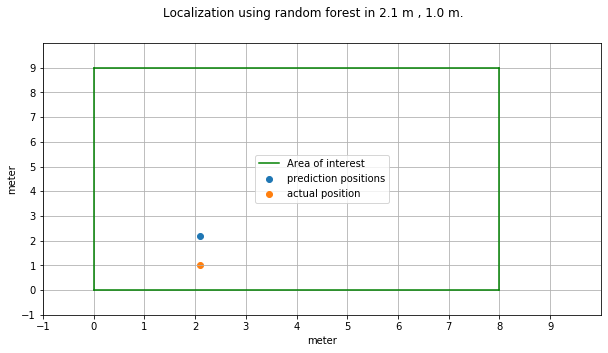

Nilai MAE untuk RF: 1.21 meter.

Lantai 2.0.


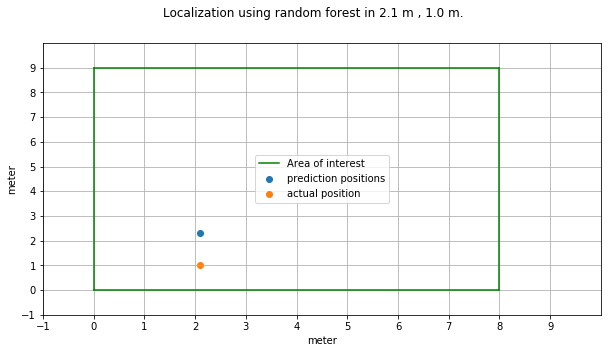

Nilai MAE untuk RF: 1.30 meter.

Lantai 2.0.


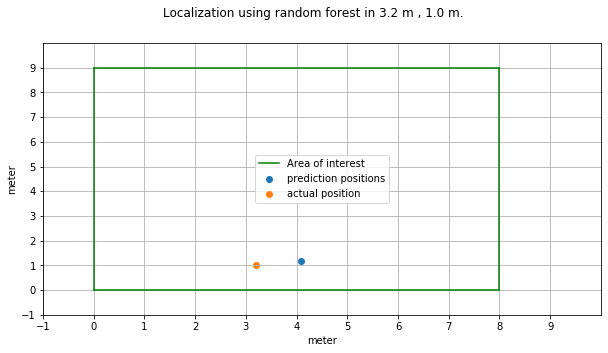

Nilai MAE untuk RF: 0.91 meter.

Lantai 2.0.


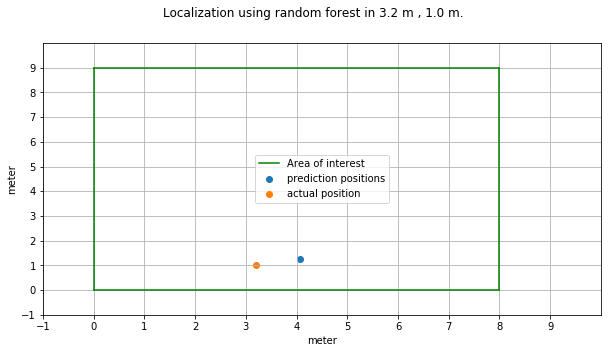

Nilai MAE untuk RF: 0.91 meter.

Lantai 2.0.


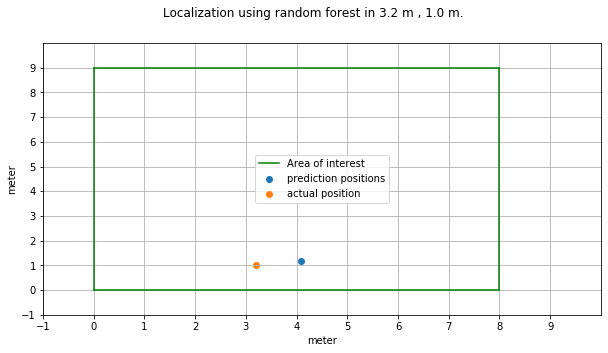

Nilai MAE untuk RF: 0.91 meter.

Lantai 2.0.


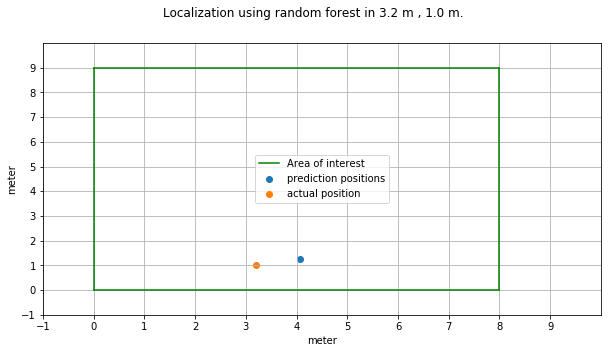

Nilai MAE untuk RF: 0.91 meter.

Lantai 2.0.


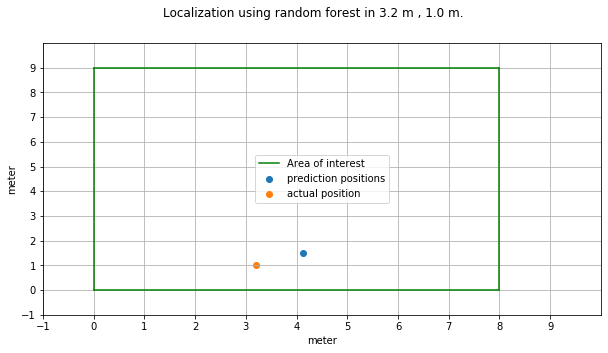

Nilai MAE untuk RF: 1.05 meter.

Lantai 2.0.


Nilai MAE untuk RF: 1.88 meter.

Lantai 2.0.


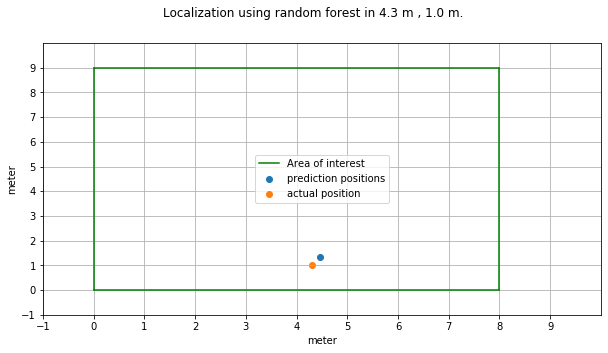

Nilai MAE untuk RF: 0.38 meter.

Lantai 2.0.


Nilai MAE untuk RF: 0.33 meter.

Lantai 2.0.


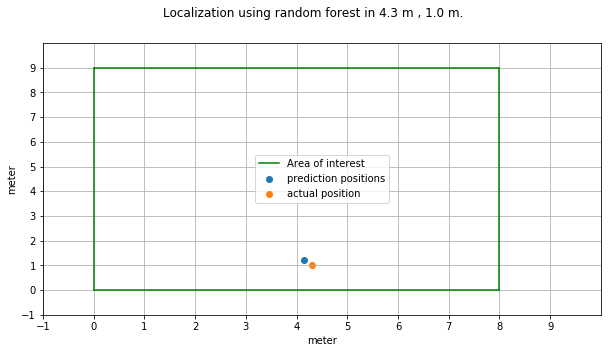

Nilai MAE untuk RF: 0.26 meter.

Lantai 2.0.


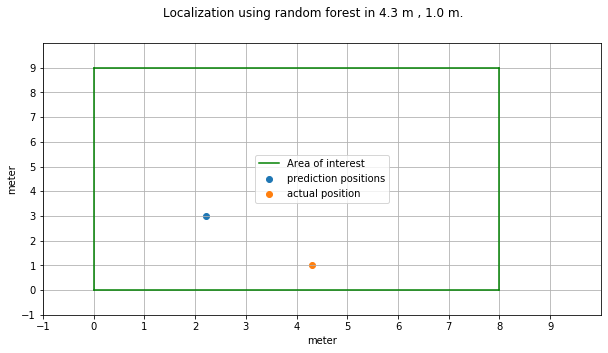

Nilai MAE untuk RF: 2.88 meter.

Lantai 2.0.


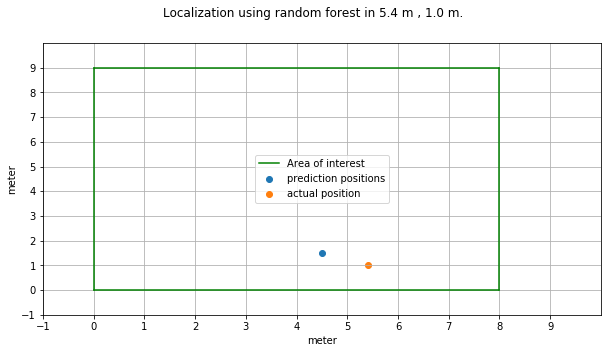

Nilai MAE untuk RF: 1.03 meter.

Lantai 2.0.


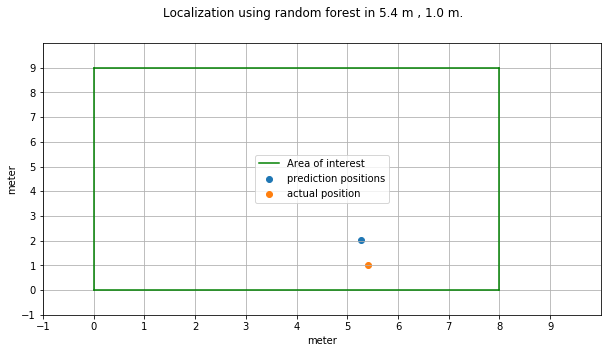

Nilai MAE untuk RF: 1.05 meter.

Lantai 2.0.


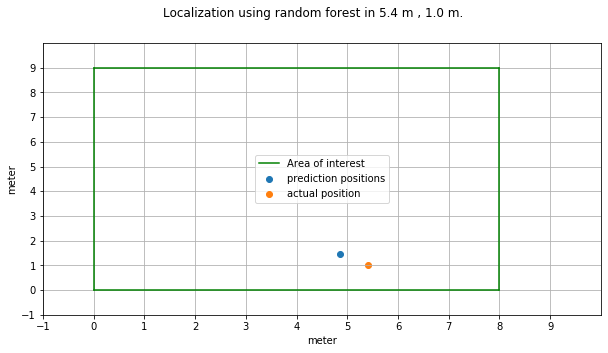

Nilai MAE untuk RF: 0.71 meter.

Lantai 2.0.


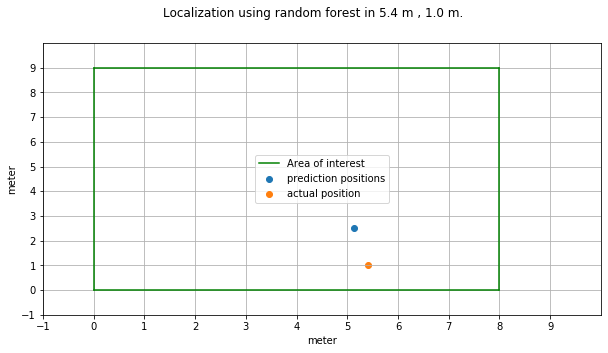

Nilai MAE untuk RF: 1.55 meter.

Lantai 2.0.


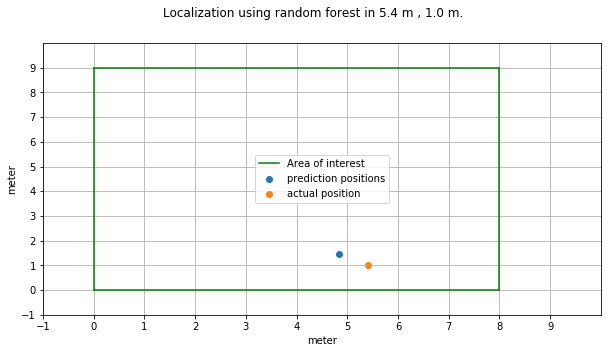

Nilai MAE untuk RF: 0.73 meter.

Lantai 2.0.


Nilai MAE untuk RF: 2.06 meter.

Lantai 2.0.


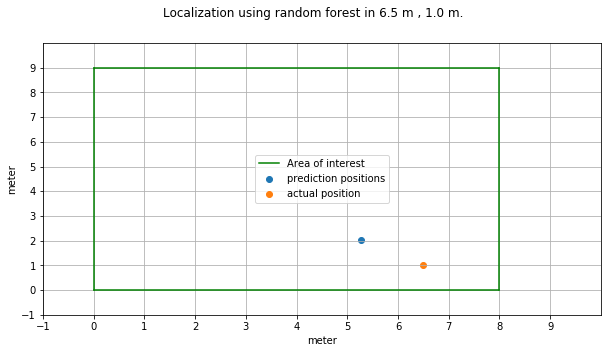

Nilai MAE untuk RF: 1.62 meter.

Lantai 2.0.


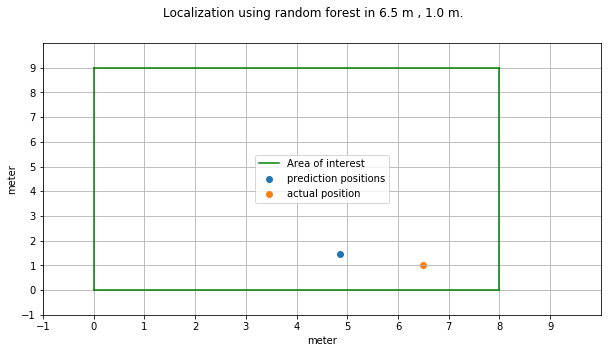

Nilai MAE untuk RF: 1.71 meter.

Lantai 2.0.


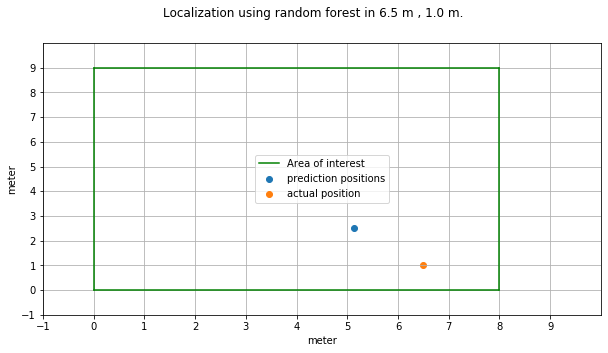

Nilai MAE untuk RF: 2.05 meter.

Lantai 2.0.


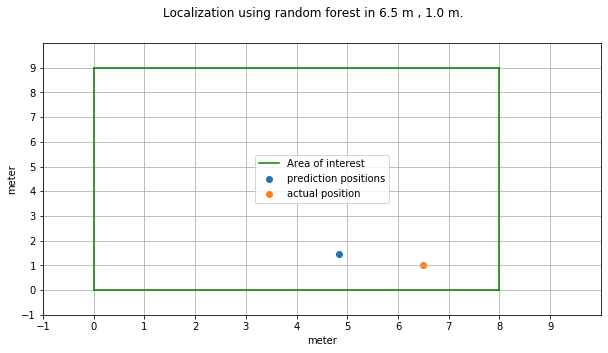

Nilai MAE untuk RF: 1.72 meter.

Lantai 2.0.


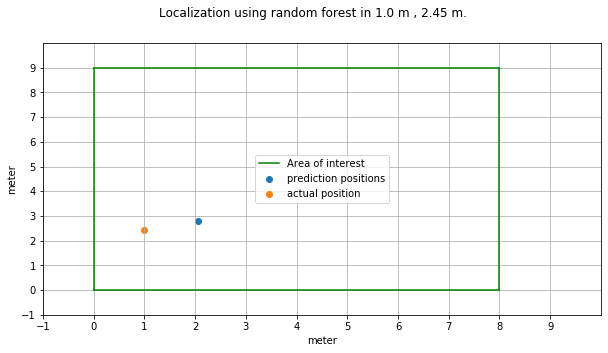

Nilai MAE untuk RF: 1.10 meter.

Lantai 2.0.


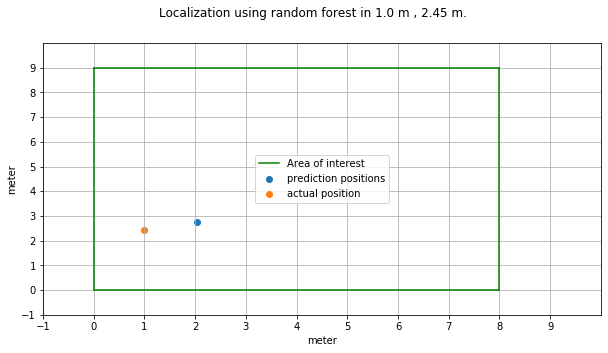

Nilai MAE untuk RF: 1.09 meter.

Lantai 2.0.


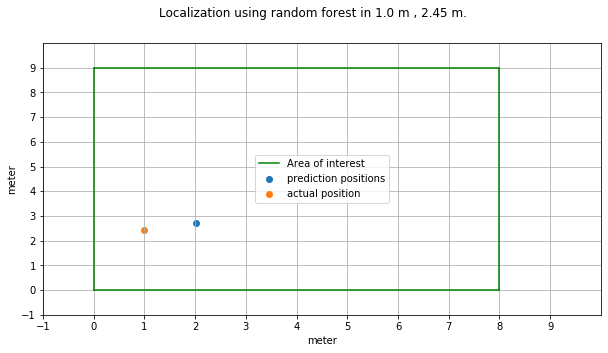

Nilai MAE untuk RF: 1.06 meter.

Lantai 2.0.


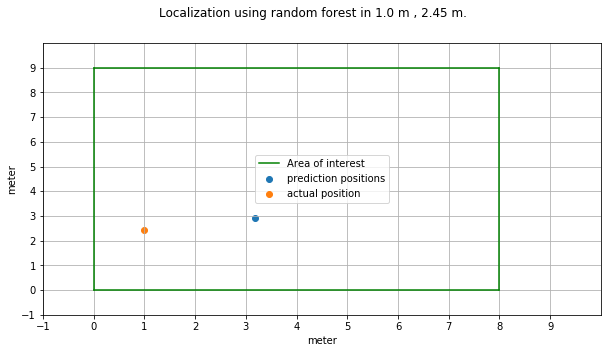

Nilai MAE untuk RF: 2.22 meter.

Lantai 2.0.


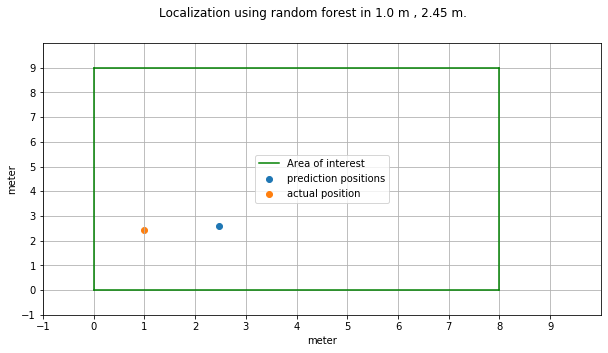

Nilai MAE untuk RF: 1.47 meter.

Lantai 2.0.


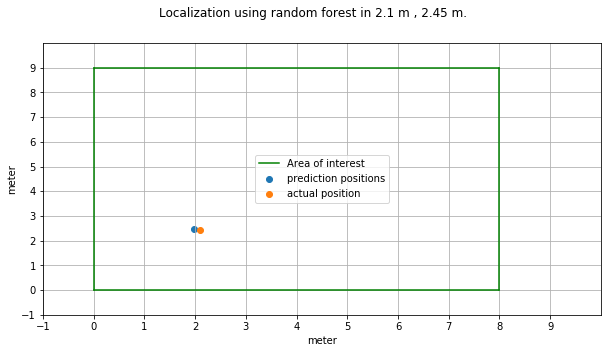

Nilai MAE untuk RF: 0.14 meter.

Lantai 2.0.


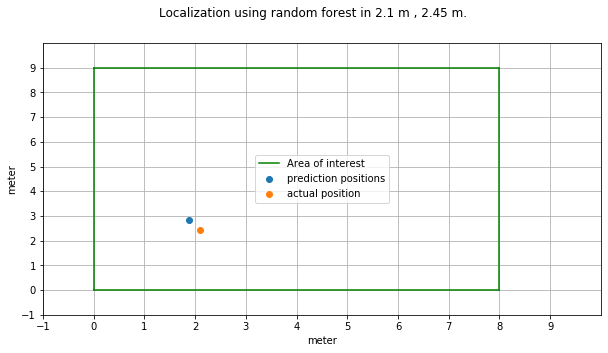

Nilai MAE untuk RF: 0.43 meter.

Lantai 2.0.


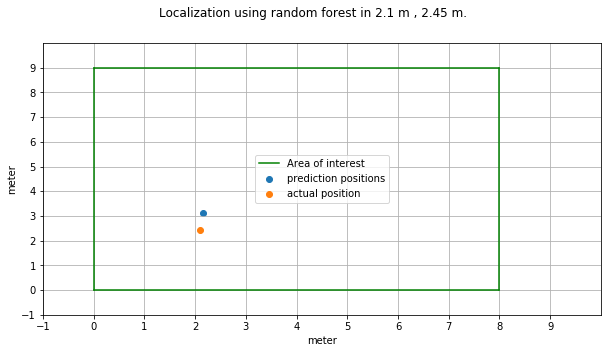

Nilai MAE untuk RF: 0.67 meter.

Lantai 2.0.


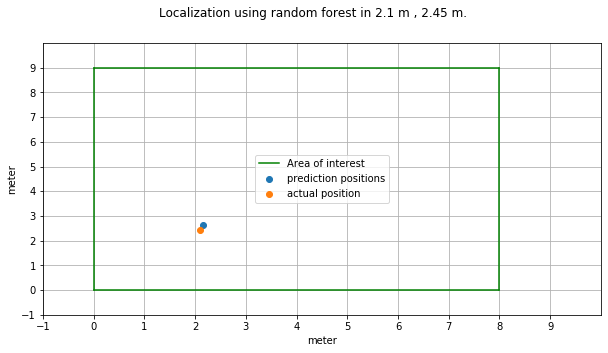

Nilai MAE untuk RF: 0.17 meter.

Lantai 2.0.


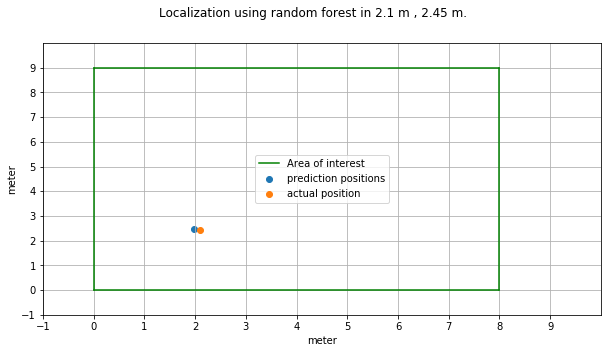

Nilai MAE untuk RF: 0.14 meter.

Lantai 2.0.


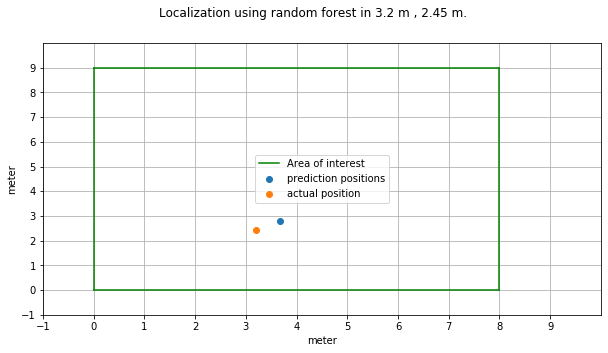

Nilai MAE untuk RF: 0.59 meter.

Lantai 2.0.


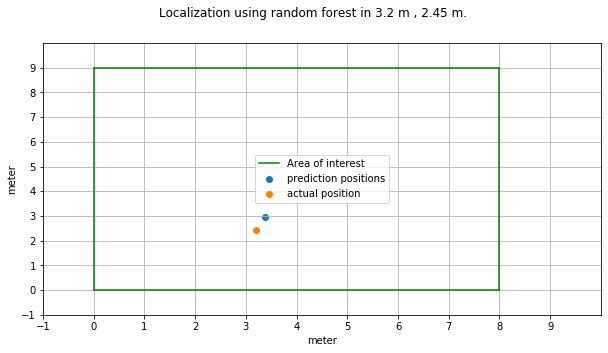

Nilai MAE untuk RF: 0.55 meter.

Lantai 2.0.


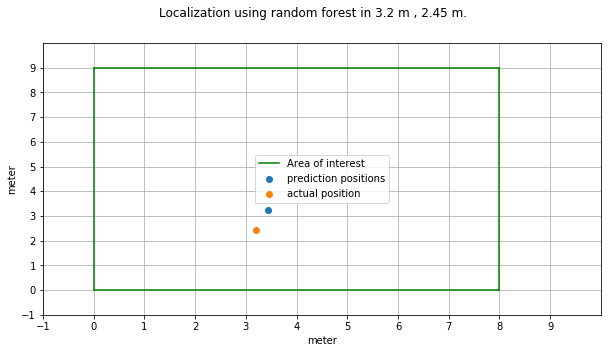

Nilai MAE untuk RF: 0.82 meter.

Lantai 2.0.


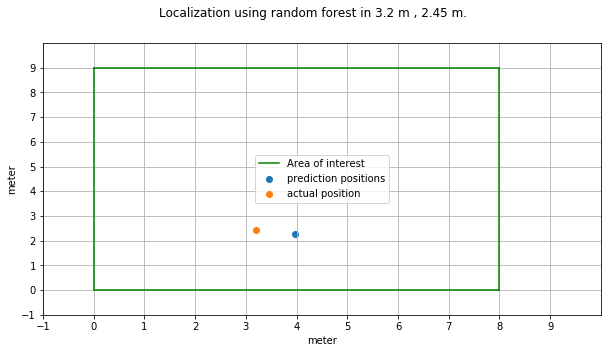

Nilai MAE untuk RF: 0.78 meter.

Lantai 2.0.


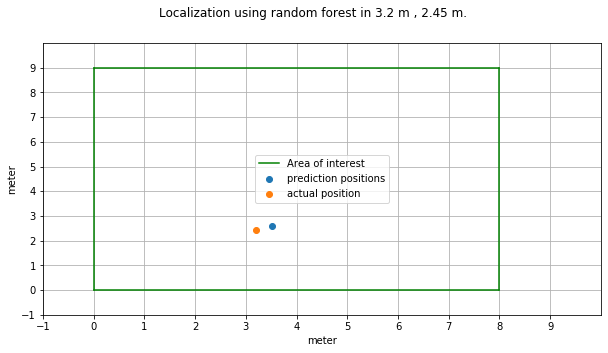

Nilai MAE untuk RF: 0.35 meter.

Lantai 2.0.


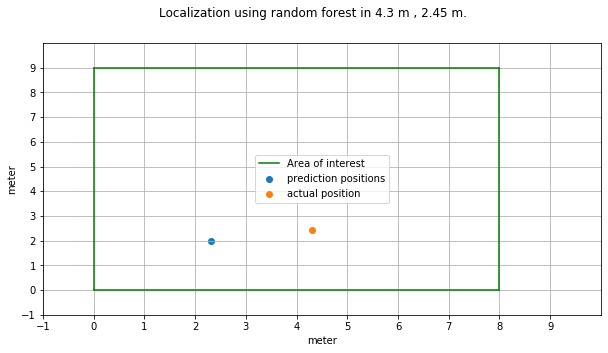

Nilai MAE untuk RF: 2.04 meter.

Lantai 2.0.


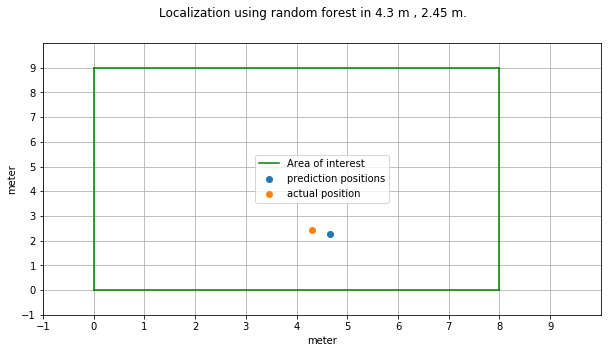

Nilai MAE untuk RF: 0.40 meter.

Lantai 2.0.


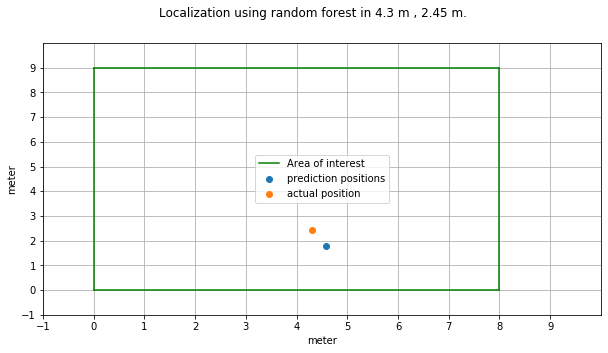

Nilai MAE untuk RF: 0.74 meter.

Lantai 2.0.


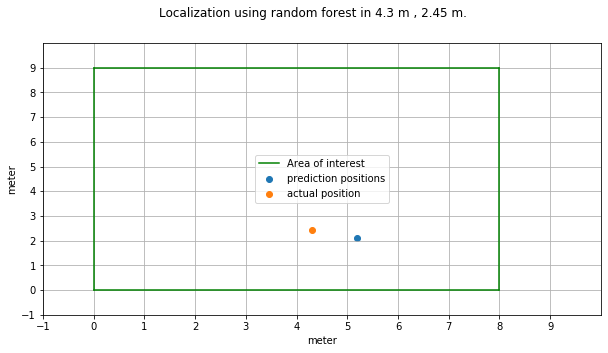

Nilai MAE untuk RF: 0.96 meter.

Lantai 2.0.


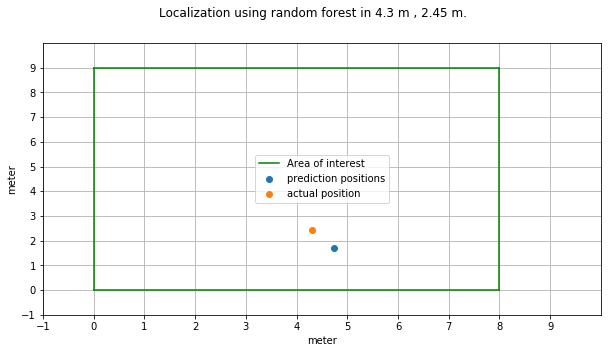

Nilai MAE untuk RF: 0.87 meter.

Lantai 2.0.


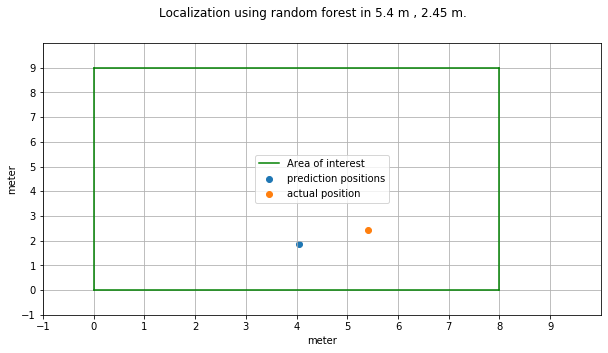

Nilai MAE untuk RF: 1.48 meter.

Lantai 2.0.


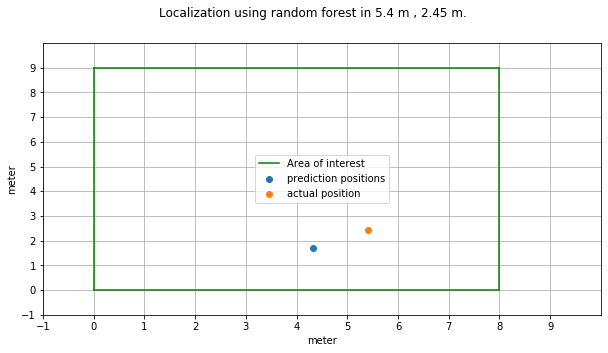

Nilai MAE untuk RF: 1.31 meter.

Lantai 2.0.


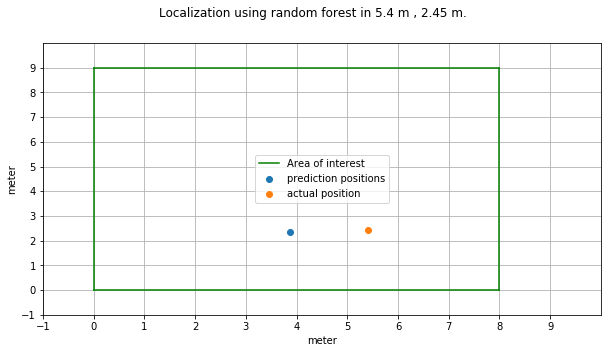

Nilai MAE untuk RF: 1.54 meter.

Lantai 2.0.


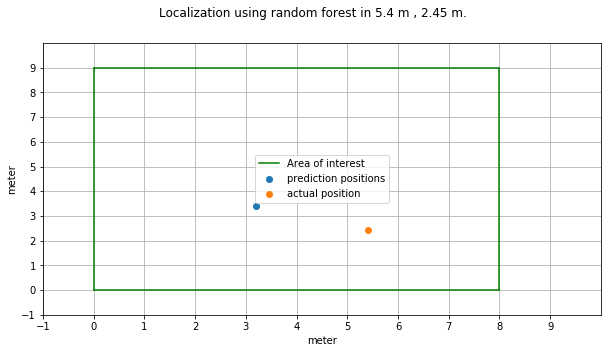

Nilai MAE untuk RF: 2.39 meter.

Lantai 2.0.


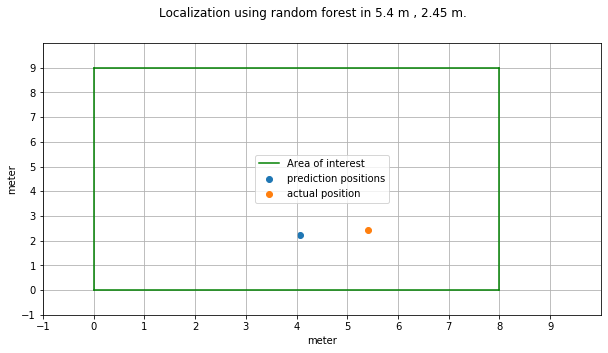

Nilai MAE untuk RF: 1.35 meter.

Lantai 2.0.


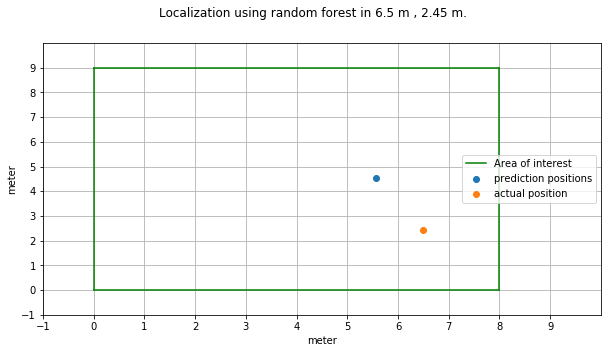

Nilai MAE untuk RF: 2.27 meter.

Lantai 2.0.


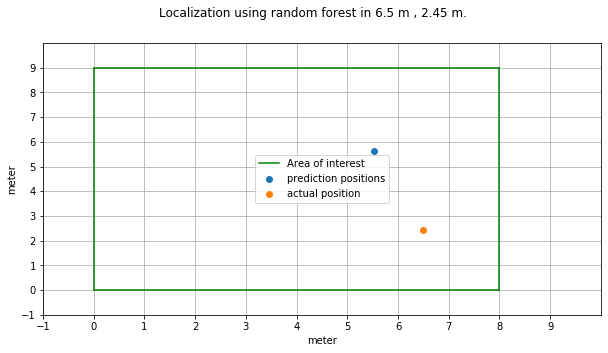

Nilai MAE untuk RF: 3.33 meter.

Lantai 2.0.


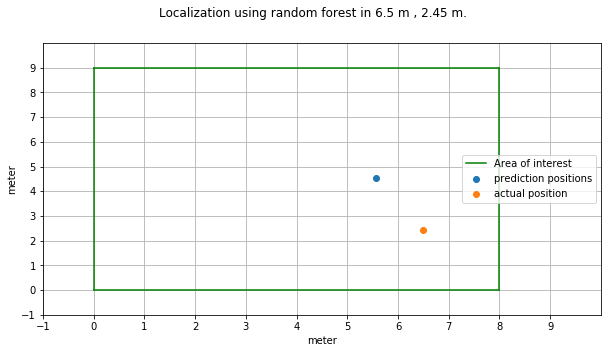

Nilai MAE untuk RF: 2.27 meter.

Lantai 2.0.


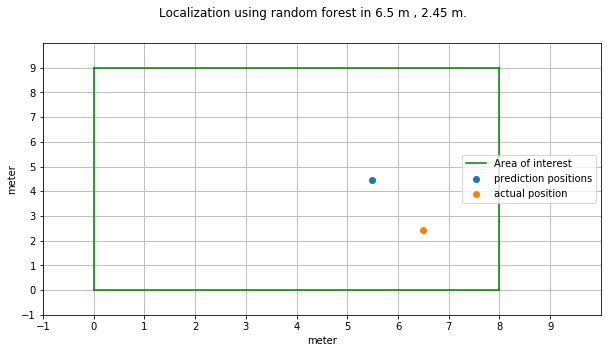

Nilai MAE untuk RF: 2.25 meter.

Lantai 2.0.


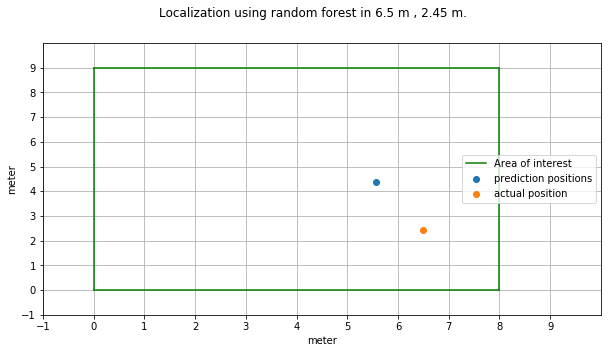

Nilai MAE untuk RF: 2.13 meter.

Lantai 2.0.


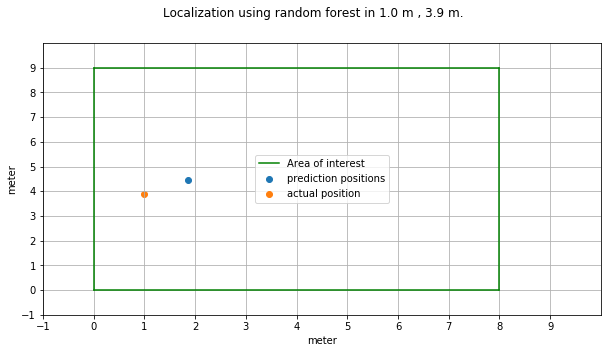

Nilai MAE untuk RF: 1.03 meter.

Lantai 2.0.


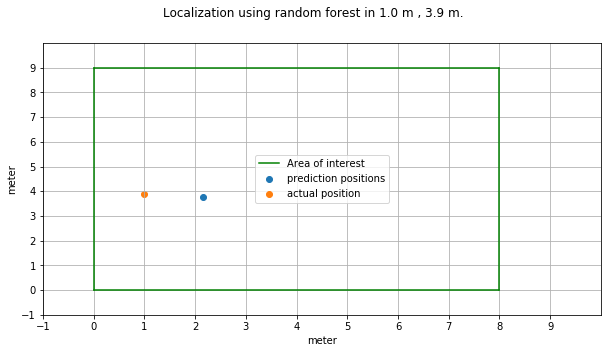

Nilai MAE untuk RF: 1.16 meter.

Lantai 2.0.


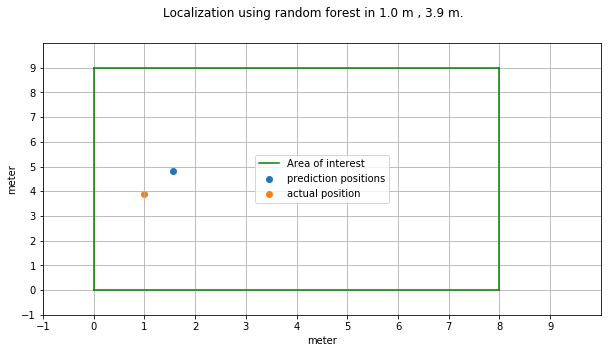

Nilai MAE untuk RF: 1.07 meter.

Lantai 2.0.


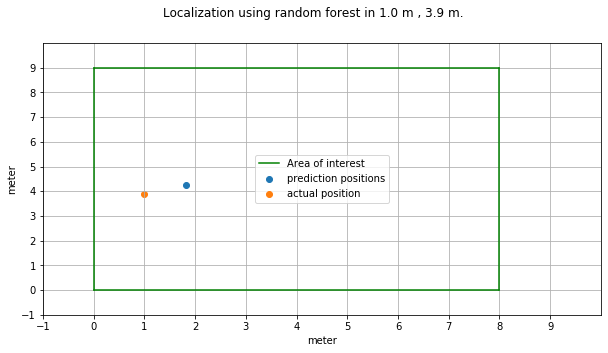

Nilai MAE untuk RF: 0.91 meter.

Lantai 2.0.


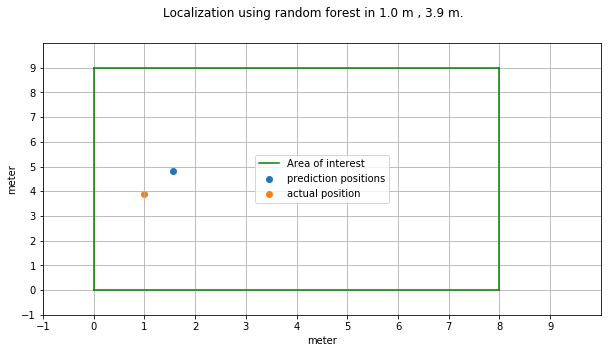

Nilai MAE untuk RF: 1.07 meter.

Lantai 2.0.


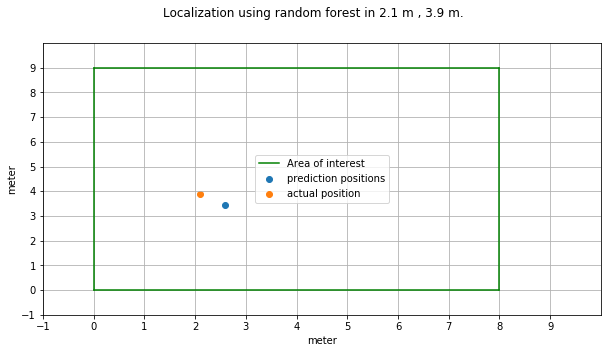

Nilai MAE untuk RF: 0.68 meter.

Lantai 2.0.


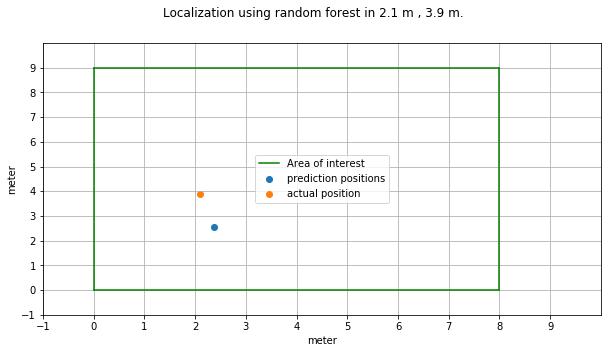

Nilai MAE untuk RF: 1.37 meter.

Lantai 2.0.


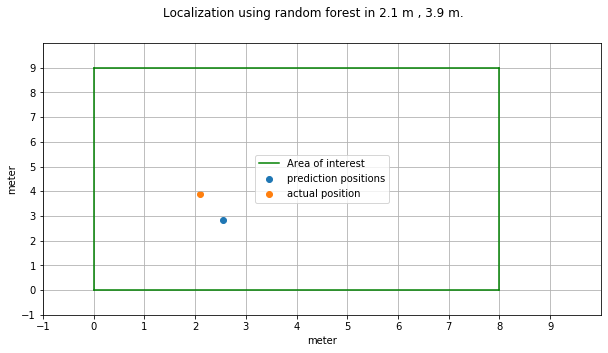

Nilai MAE untuk RF: 1.17 meter.

Lantai 2.0.


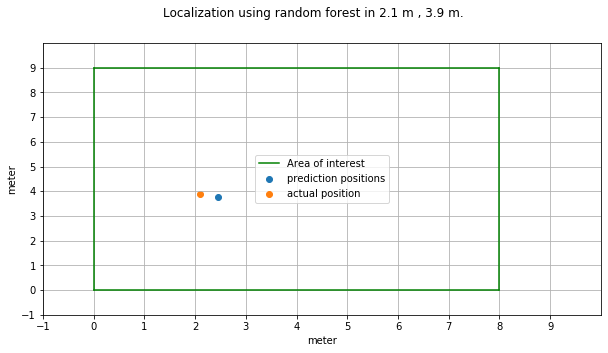

Nilai MAE untuk RF: 0.36 meter.

Lantai 2.0.


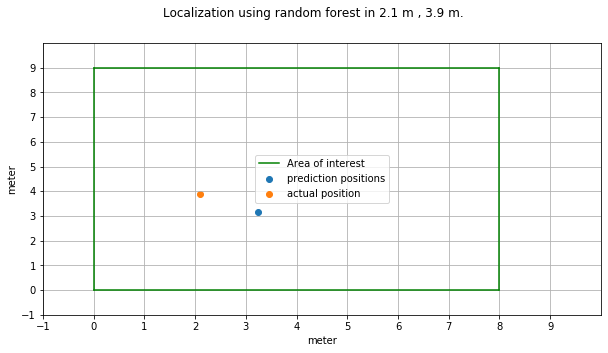

Nilai MAE untuk RF: 1.35 meter.

Lantai 2.0.


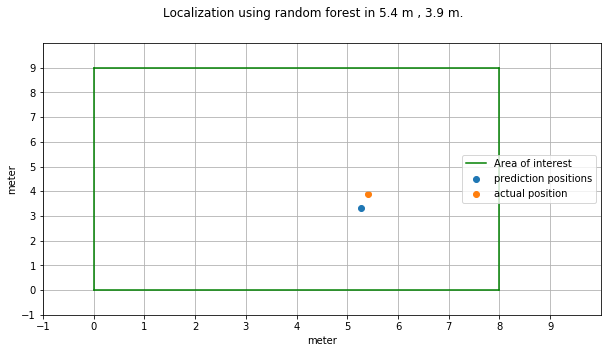

Nilai MAE untuk RF: 0.59 meter.

Lantai 2.0.


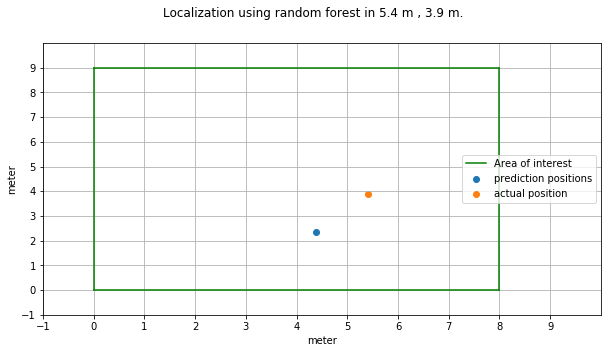

Nilai MAE untuk RF: 1.85 meter.

Lantai 2.0.


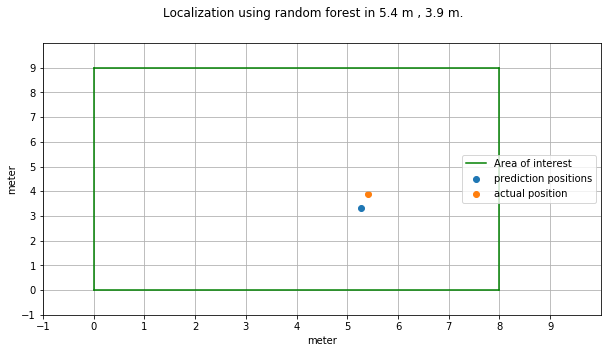

Nilai MAE untuk RF: 0.59 meter.

Lantai 2.0.


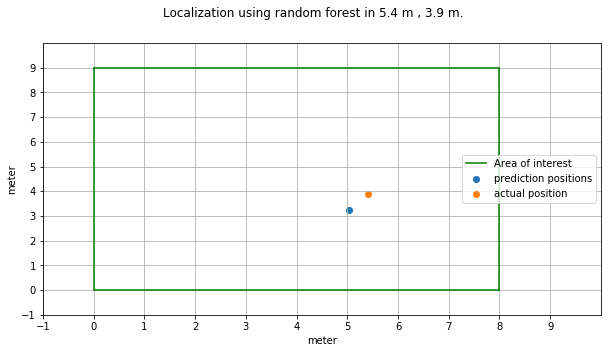

Nilai MAE untuk RF: 0.75 meter.

Lantai 2.0.


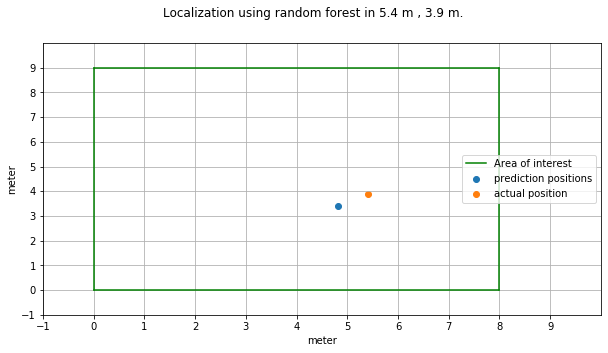

Nilai MAE untuk RF: 0.76 meter.

Lantai 2.0.


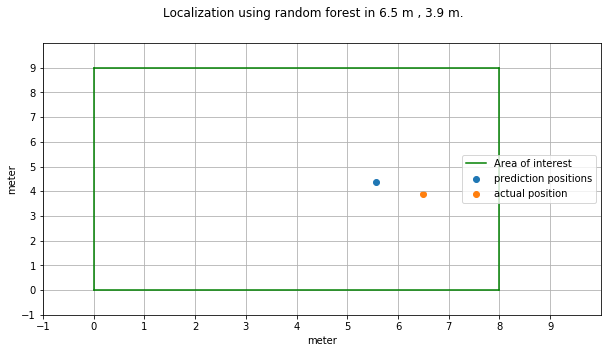

Nilai MAE untuk RF: 1.05 meter.

Lantai 2.0.


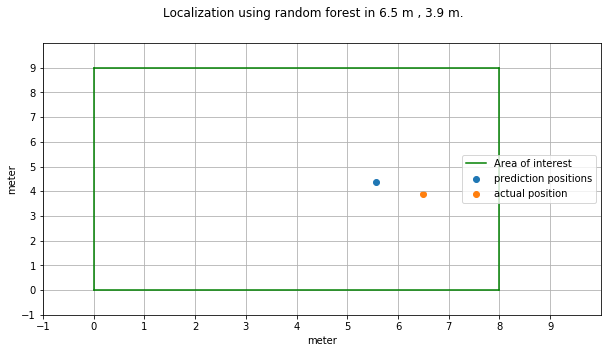

Nilai MAE untuk RF: 1.05 meter.

Lantai 2.0.


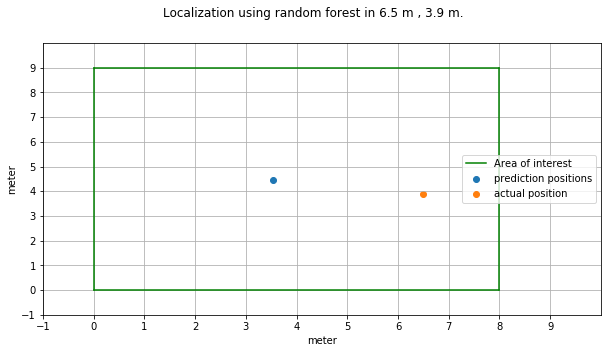

Nilai MAE untuk RF: 3.02 meter.

Lantai 2.0.


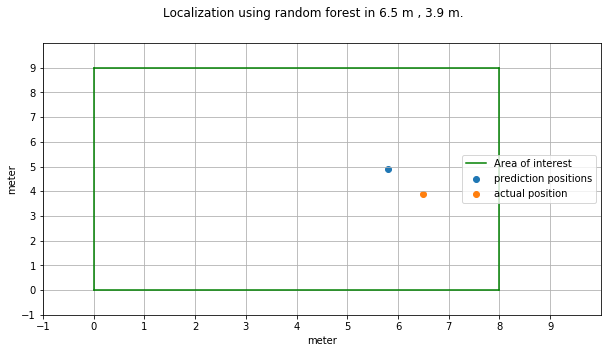

Nilai MAE untuk RF: 1.23 meter.

Lantai 2.0.


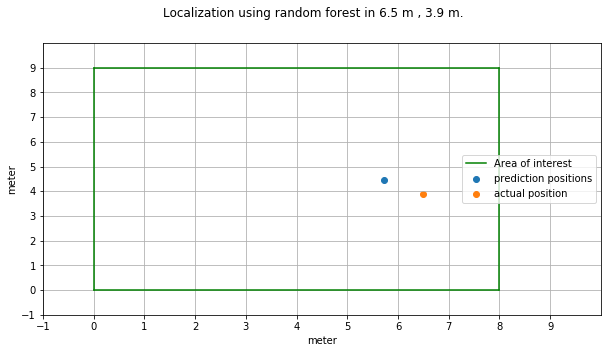

Nilai MAE untuk RF: 0.95 meter.

Lantai 2.0.


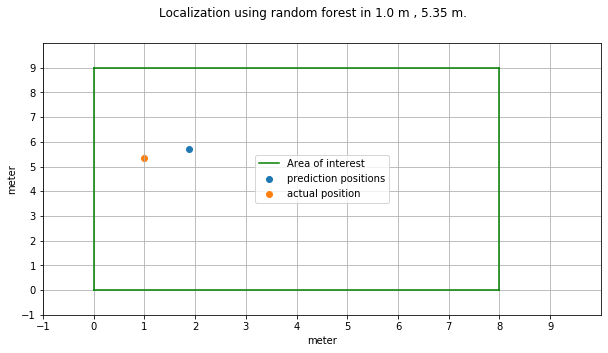

Nilai MAE untuk RF: 0.94 meter.

Lantai 2.0.


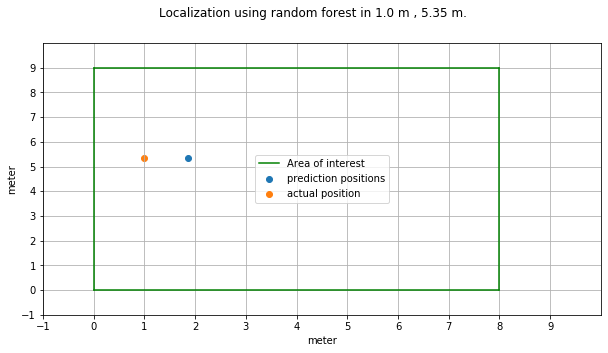

Nilai MAE untuk RF: 0.86 meter.

Lantai 2.0.


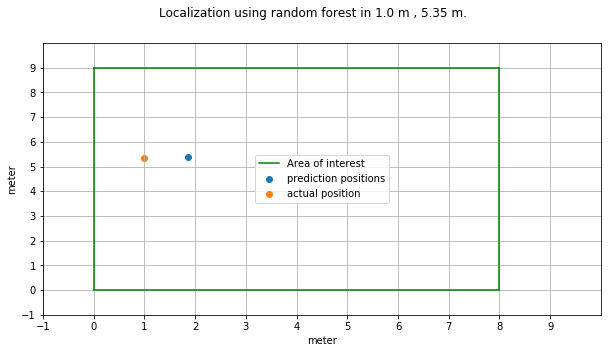

Nilai MAE untuk RF: 0.86 meter.

Lantai 2.0.


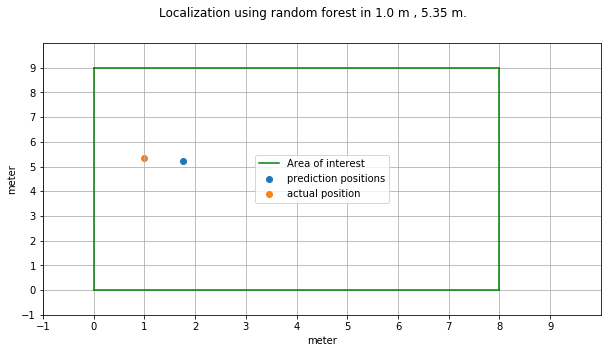

Nilai MAE untuk RF: 0.77 meter.

Lantai 2.0.


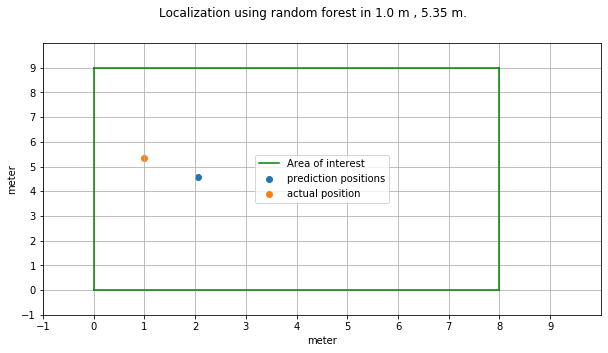

Nilai MAE untuk RF: 1.32 meter.

Lantai 2.0.


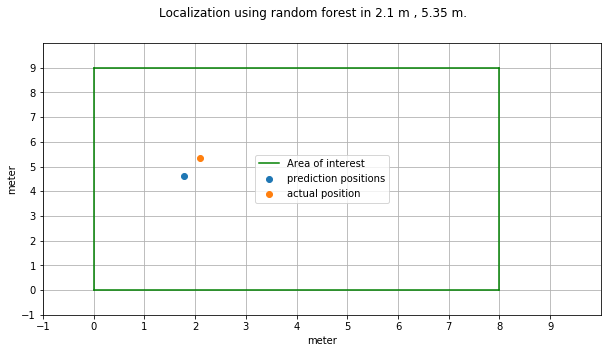

Nilai MAE untuk RF: 0.80 meter.

Lantai 2.0.


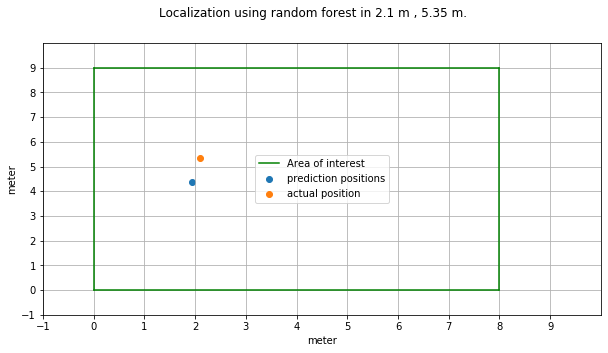

Nilai MAE untuk RF: 0.98 meter.

Lantai 2.0.


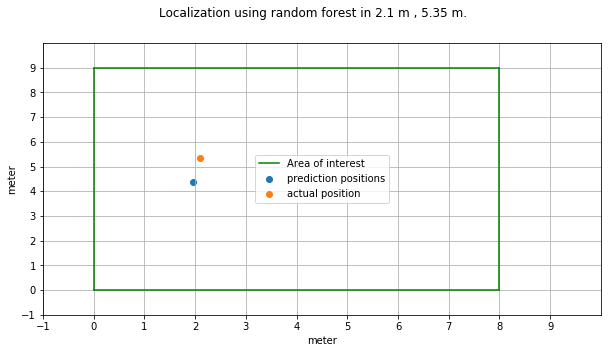

Nilai MAE untuk RF: 0.97 meter.

Lantai 2.0.


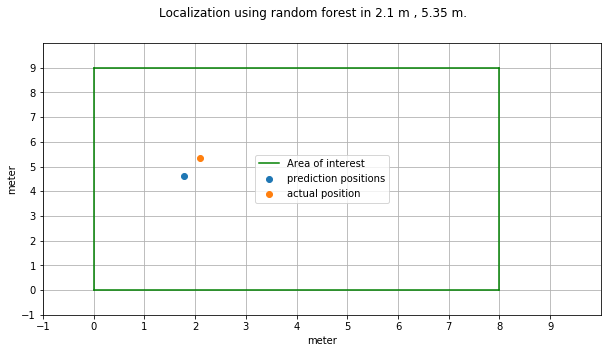

Nilai MAE untuk RF: 0.80 meter.

Lantai 2.0.


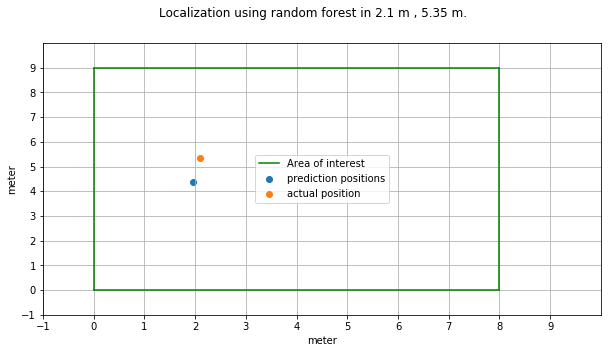

Nilai MAE untuk RF: 0.97 meter.

Lantai 2.0.


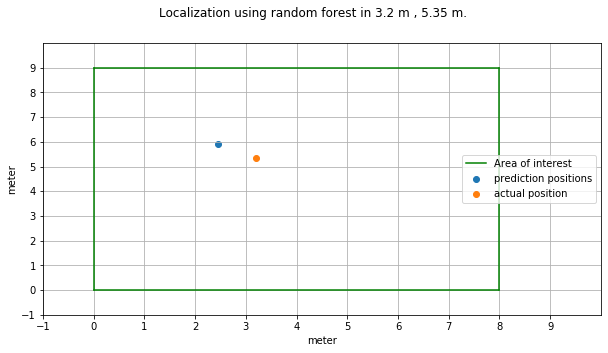

Nilai MAE untuk RF: 0.93 meter.

Lantai 2.0.


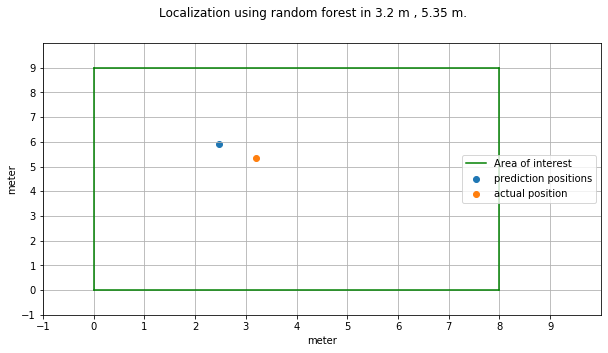

Nilai MAE untuk RF: 0.94 meter.

Lantai 2.0.


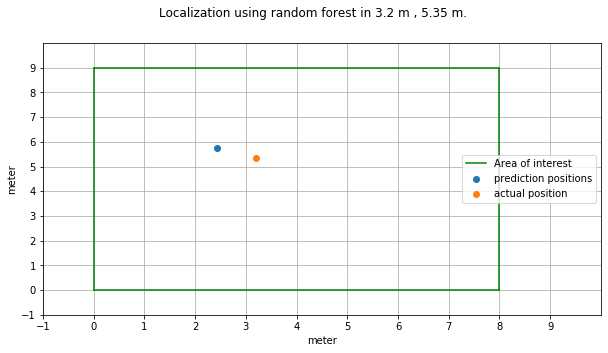

Nilai MAE untuk RF: 0.87 meter.

Lantai 2.0.


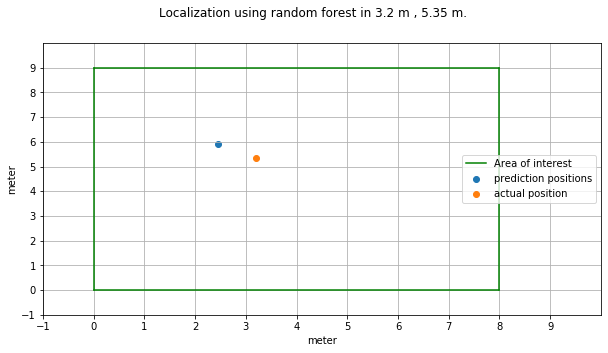

Nilai MAE untuk RF: 0.93 meter.

Lantai 2.0.


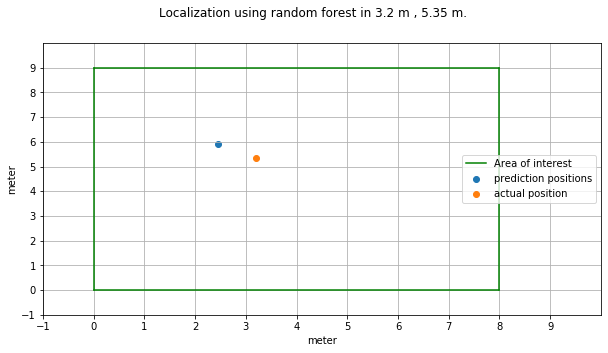

Nilai MAE untuk RF: 0.93 meter.

Lantai 2.0.


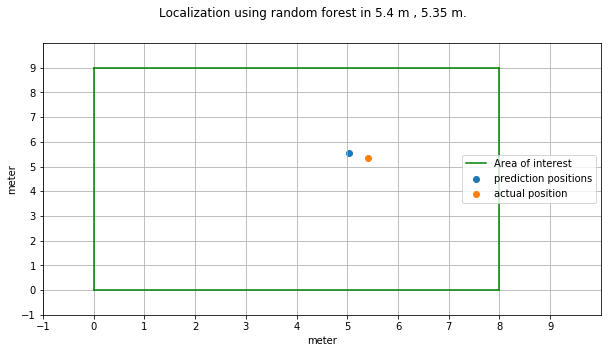

Nilai MAE untuk RF: 0.43 meter.

Lantai 2.0.


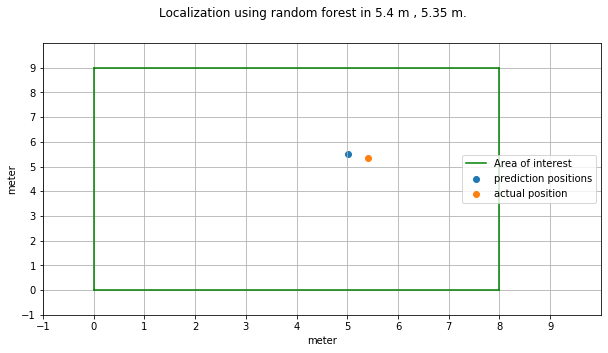

Nilai MAE untuk RF: 0.42 meter.

Lantai 2.0.


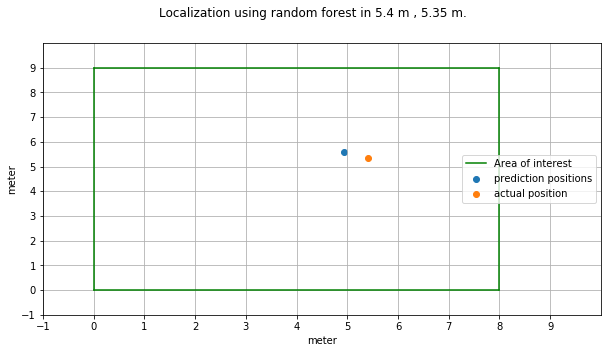

Nilai MAE untuk RF: 0.51 meter.

Lantai 2.0.


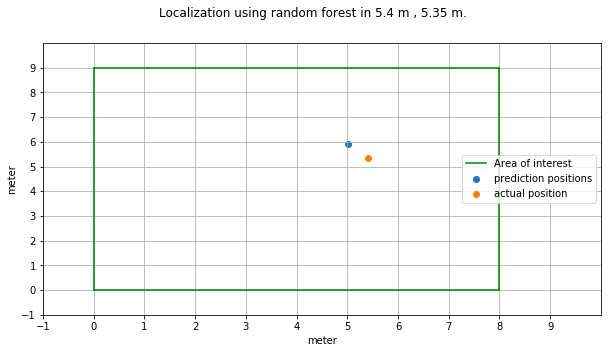

Nilai MAE untuk RF: 0.70 meter.

Lantai 2.0.


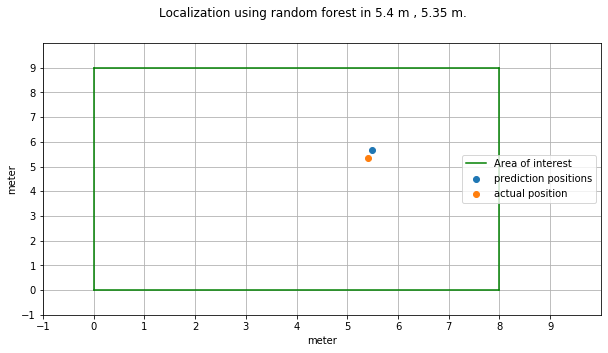

Nilai MAE untuk RF: 0.33 meter.

Lantai 2.0.


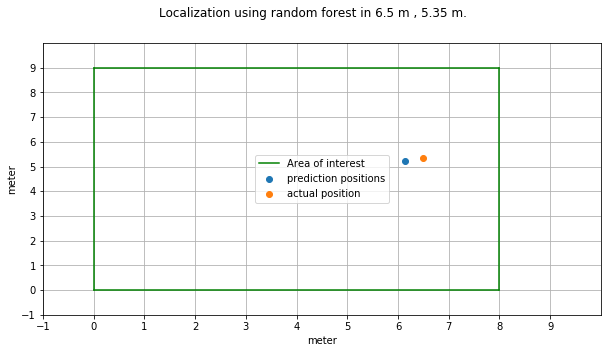

Nilai MAE untuk RF: 0.39 meter.

Lantai 2.0.


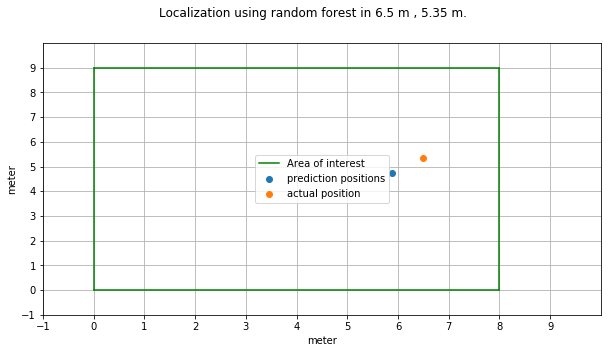

Nilai MAE untuk RF: 0.86 meter.

Lantai 2.0.


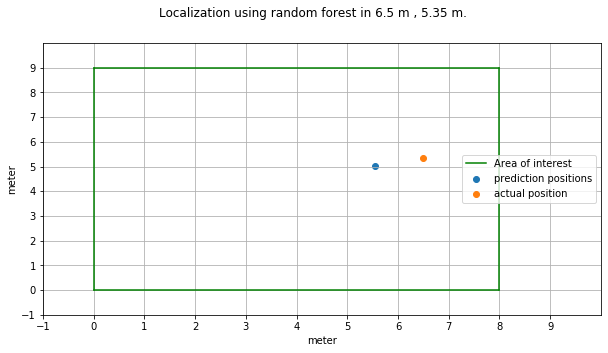

Nilai MAE untuk RF: 1.00 meter.

Lantai 2.0.


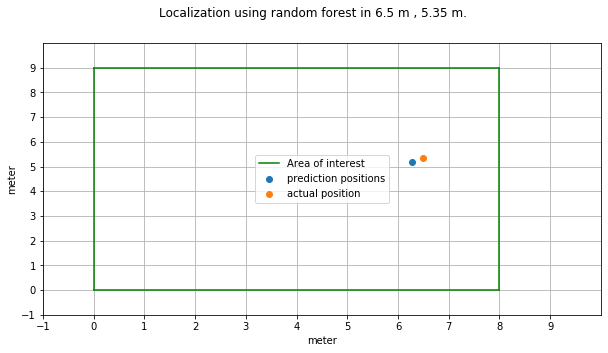

Nilai MAE untuk RF: 0.29 meter.

Lantai 2.0.


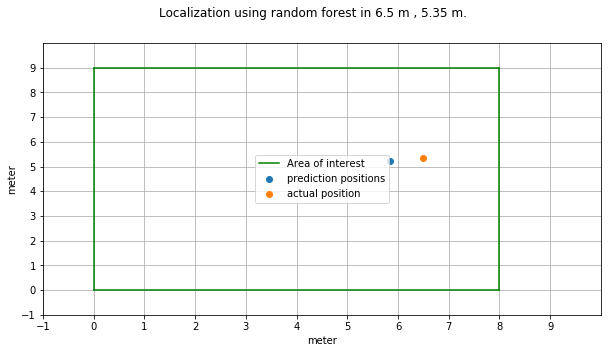

Nilai MAE untuk RF: 0.67 meter.

Lantai 2.0.


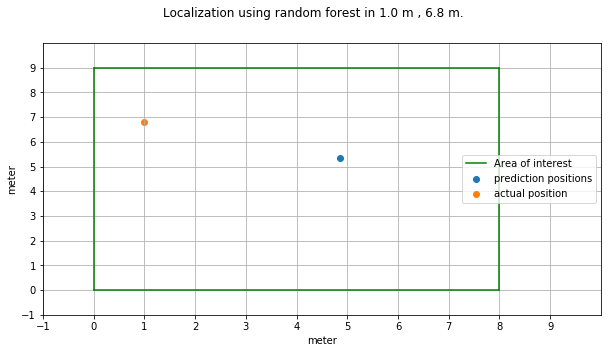

Nilai MAE untuk RF: 4.12 meter.

Lantai 2.0.


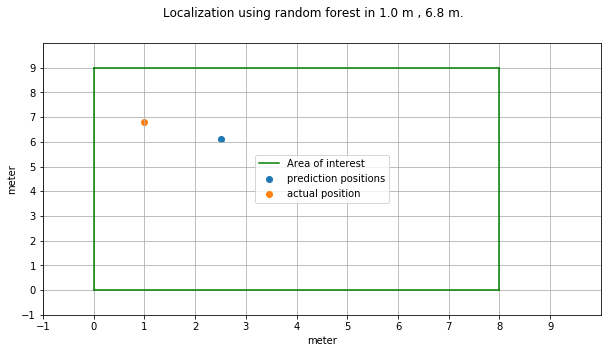

Nilai MAE untuk RF: 1.66 meter.

Lantai 2.0.


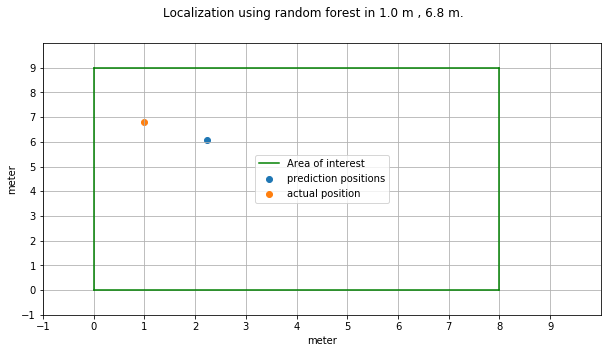

Nilai MAE untuk RF: 1.43 meter.

Lantai 2.0.


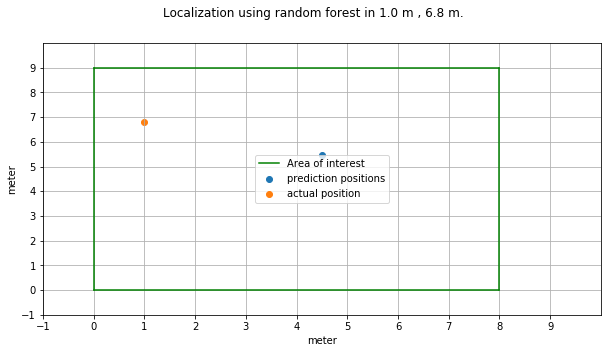

Nilai MAE untuk RF: 3.75 meter.

Lantai 2.0.


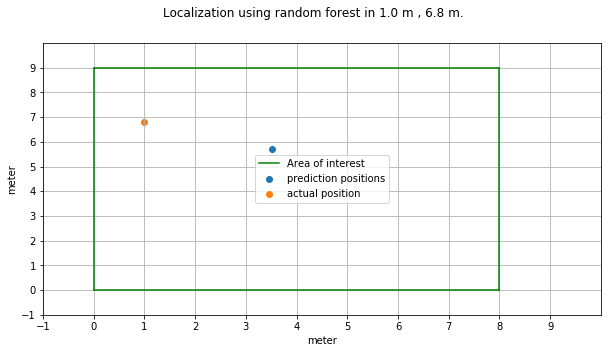

Nilai MAE untuk RF: 2.74 meter.

Lantai 2.0.


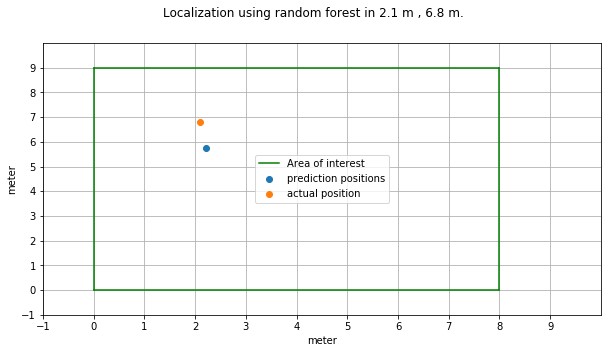

Nilai MAE untuk RF: 1.07 meter.

Lantai 2.0.


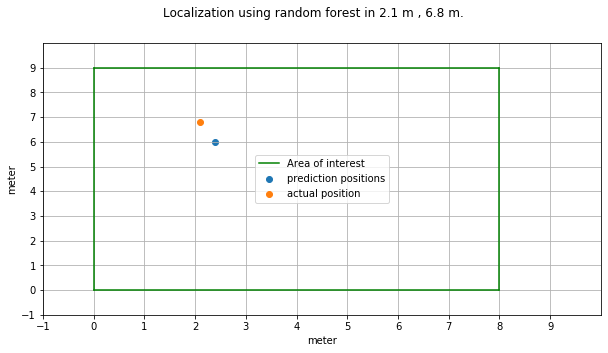

Nilai MAE untuk RF: 0.84 meter.

Lantai 2.0.


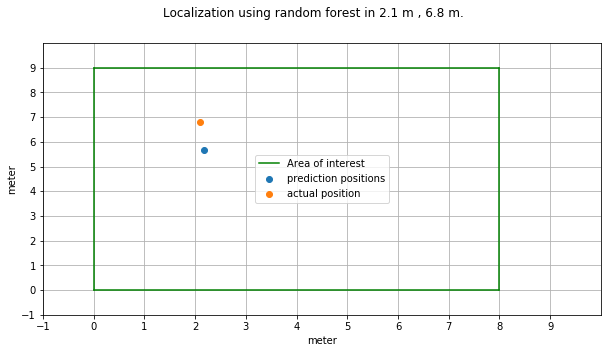

Nilai MAE untuk RF: 1.12 meter.

Lantai 2.0.


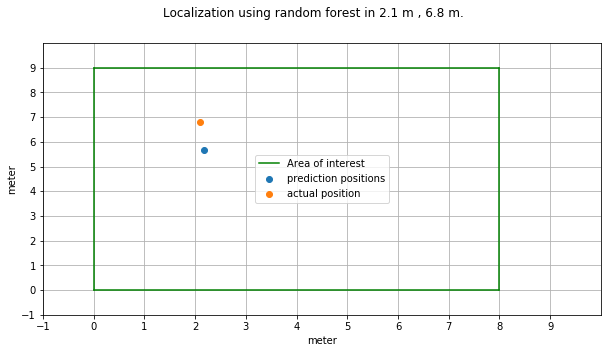

Nilai MAE untuk RF: 1.12 meter.

Lantai 2.0.


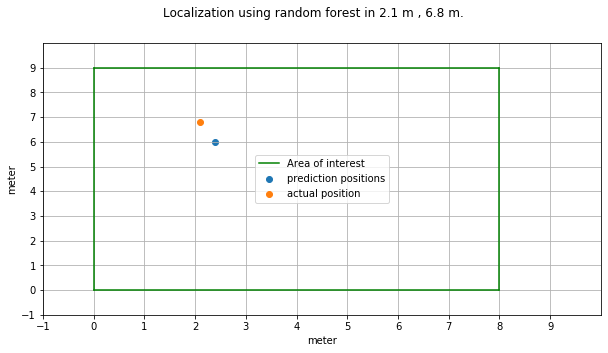

Nilai MAE untuk RF: 0.84 meter.

Lantai 2.0.


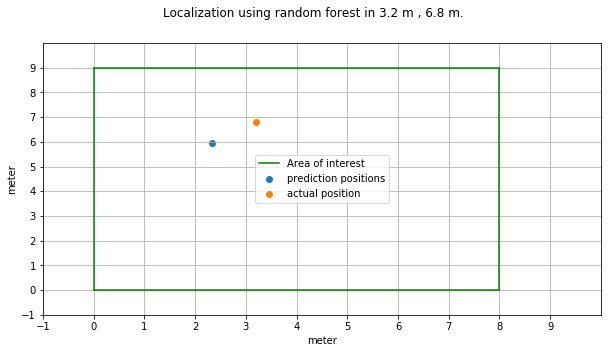

Nilai MAE untuk RF: 1.22 meter.

Lantai 2.0.


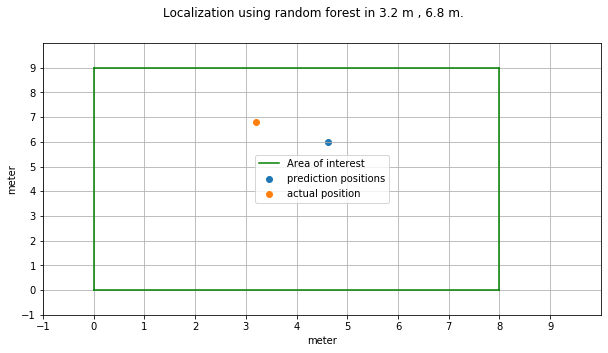

Nilai MAE untuk RF: 1.62 meter.

Lantai 2.0.


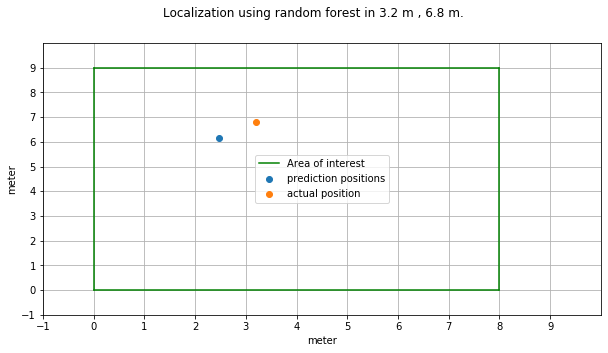

Nilai MAE untuk RF: 0.97 meter.

Lantai 2.0.


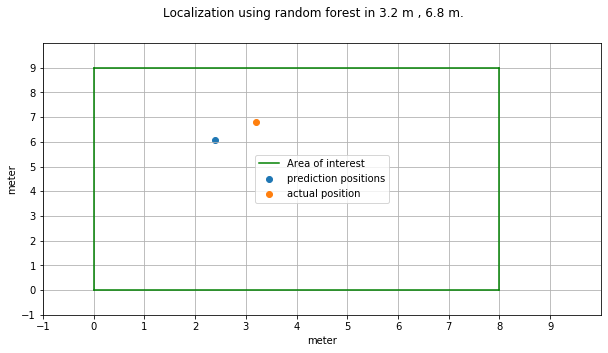

Nilai MAE untuk RF: 1.10 meter.

Lantai 2.0.


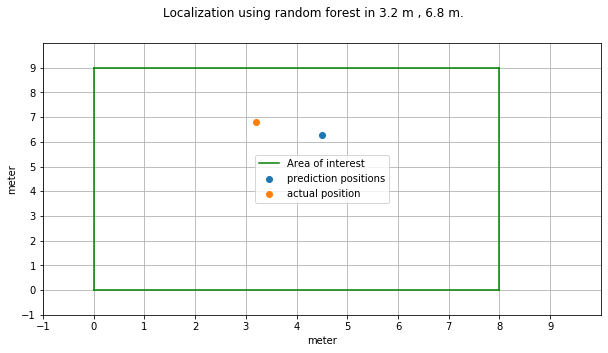

Nilai MAE untuk RF: 1.41 meter.

Lantai 2.0.


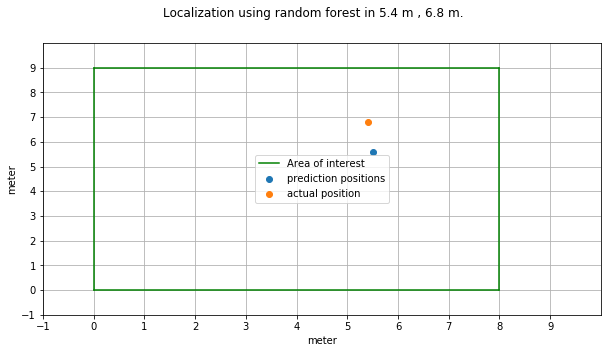

Nilai MAE untuk RF: 1.21 meter.

Lantai 2.0.


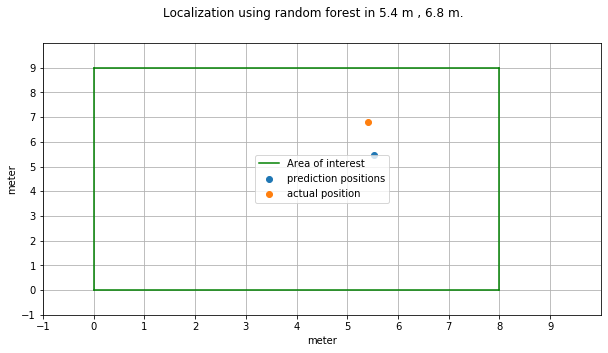

Nilai MAE untuk RF: 1.33 meter.

Lantai 2.0.


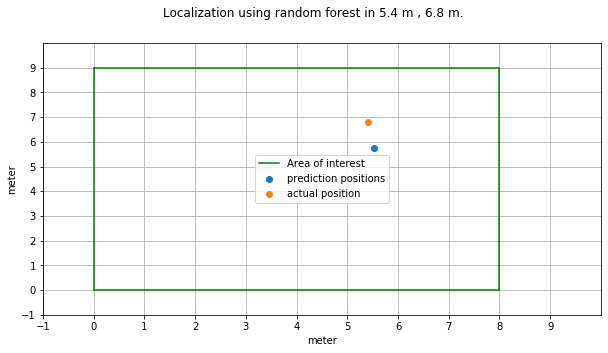

Nilai MAE untuk RF: 1.05 meter.

Lantai 2.0.


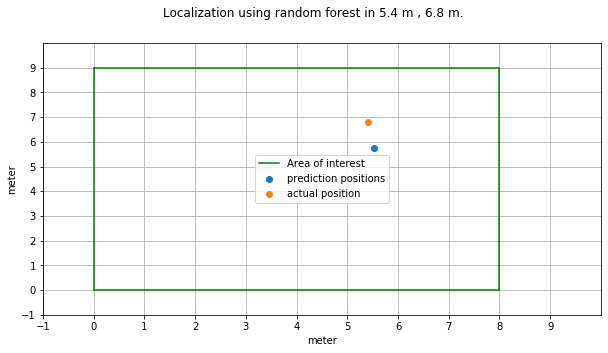

Nilai MAE untuk RF: 1.05 meter.

Lantai 2.0.


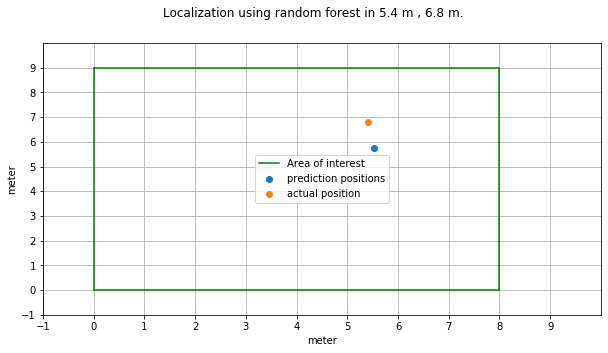

Nilai MAE untuk RF: 1.05 meter.

Lantai 2.0.


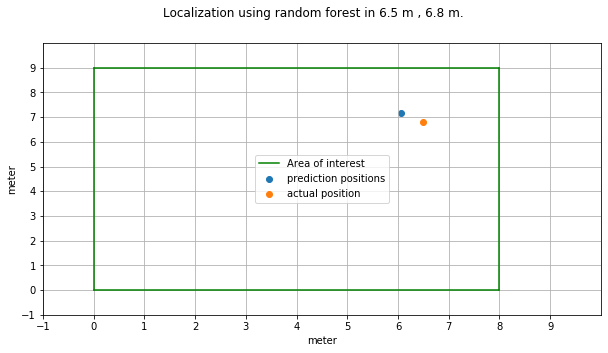

Nilai MAE untuk RF: 0.58 meter.

Lantai 2.0.


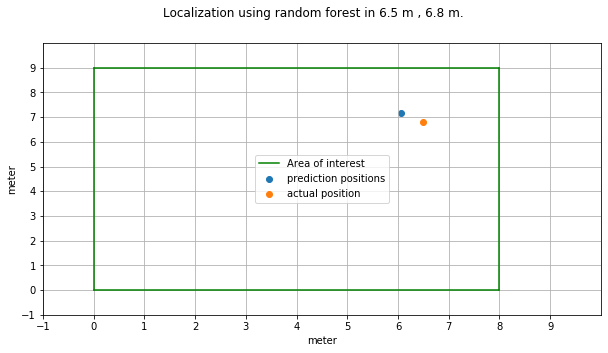

Nilai MAE untuk RF: 0.58 meter.

Lantai 2.0.


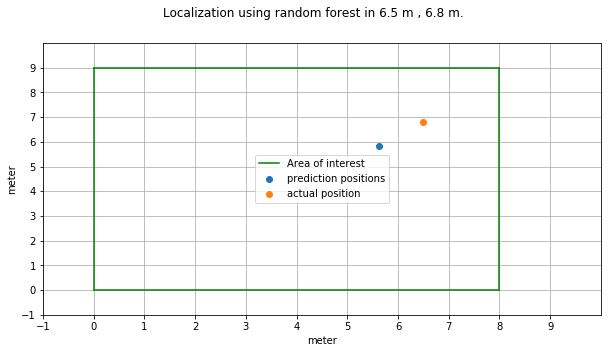

Nilai MAE untuk RF: 1.32 meter.

Lantai 2.0.


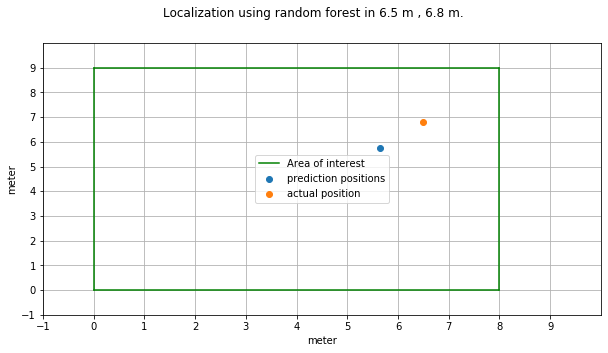

Nilai MAE untuk RF: 1.36 meter.

Lantai 2.0.


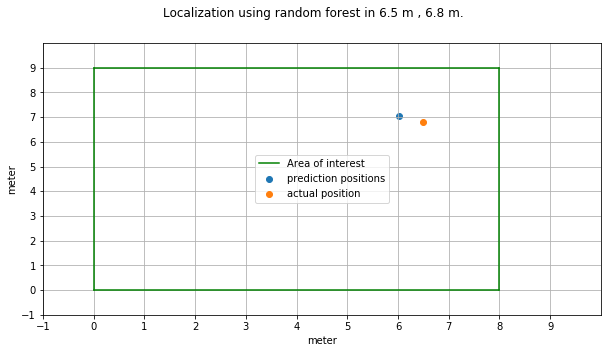

Nilai MAE untuk RF: 0.53 meter.

Lantai 2.0.


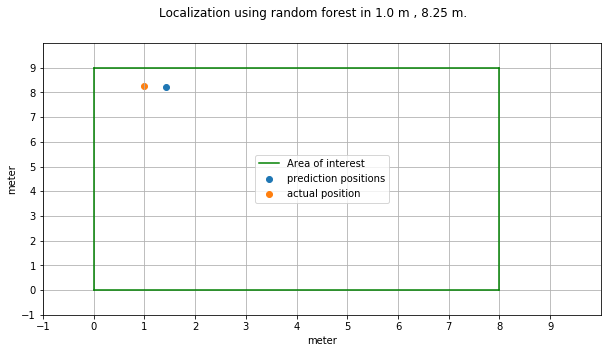

Nilai MAE untuk RF: 0.42 meter.

Lantai 2.0.


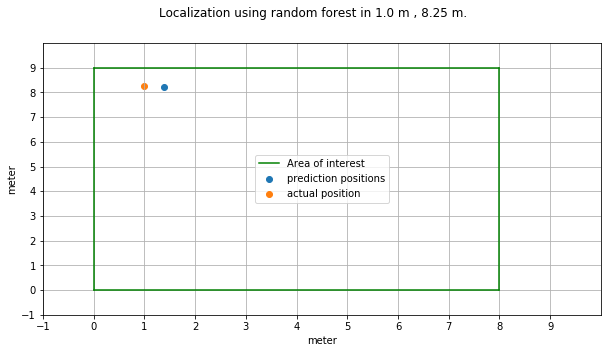

Nilai MAE untuk RF: 0.39 meter.

Lantai 2.0.


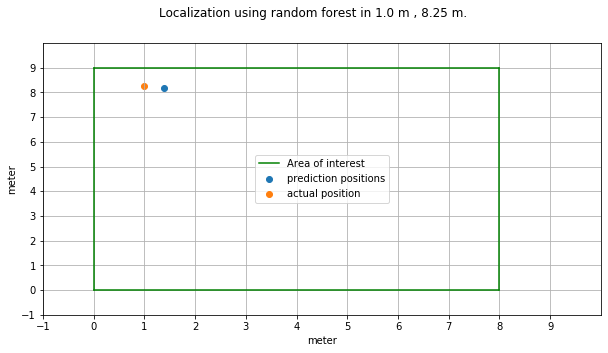

Nilai MAE untuk RF: 0.39 meter.

Lantai 2.0.


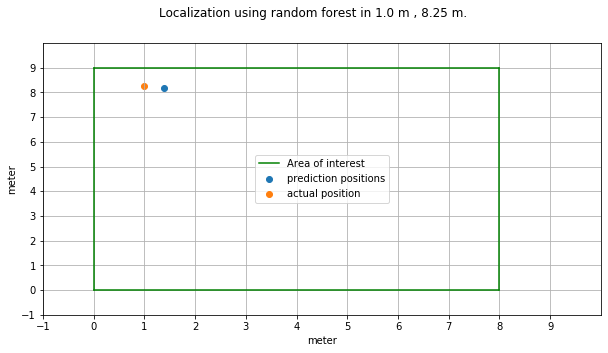

Nilai MAE untuk RF: 0.39 meter.

Lantai 2.0.


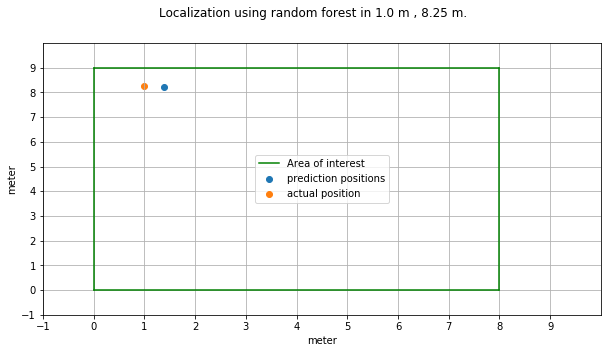

Nilai MAE untuk RF: 0.39 meter.

Lantai 2.0.


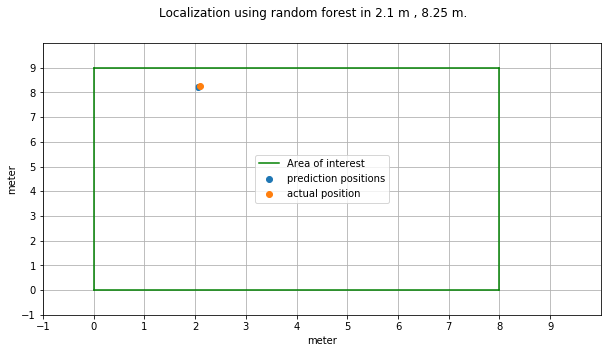

Nilai MAE untuk RF: 0.06 meter.

Lantai 2.0.


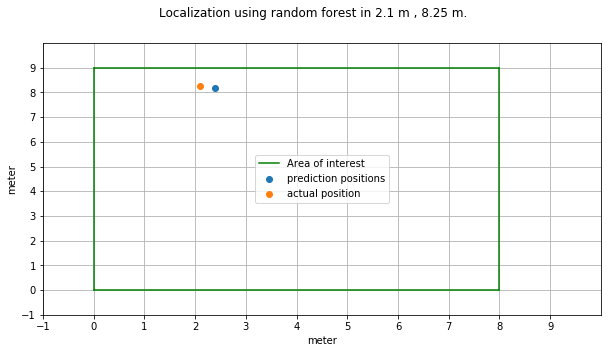

Nilai MAE untuk RF: 0.29 meter.

Lantai 2.0.


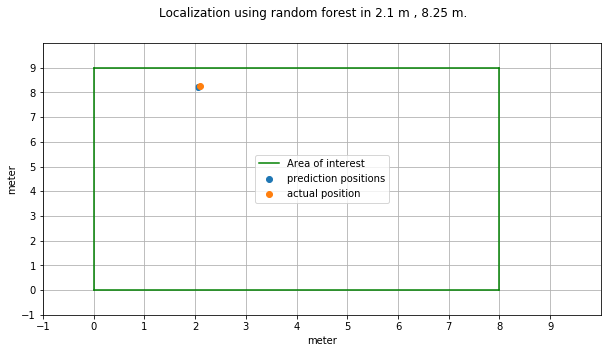

Nilai MAE untuk RF: 0.06 meter.

Lantai 2.0.


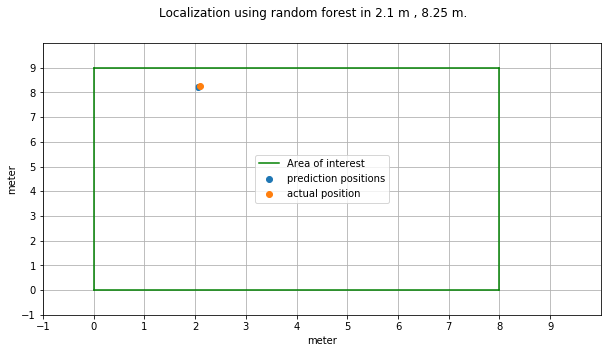

Nilai MAE untuk RF: 0.06 meter.

Lantai 2.0.


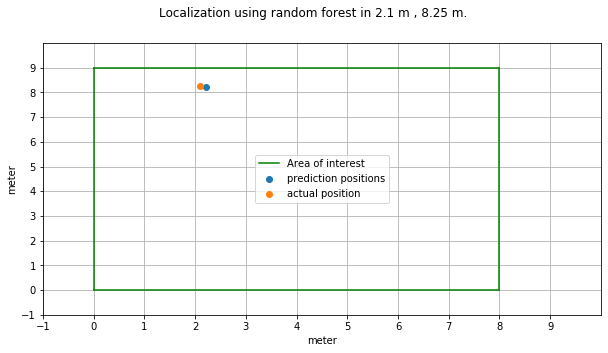

Nilai MAE untuk RF: 0.11 meter.

Lantai 2.0.


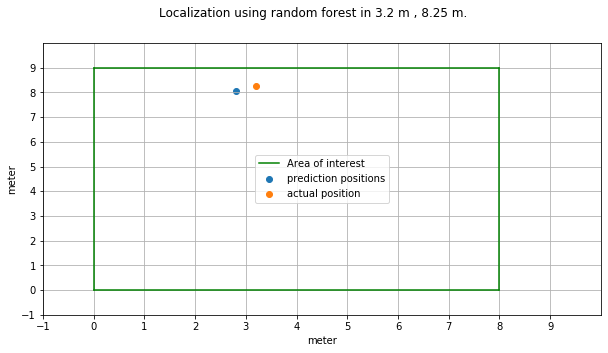

Nilai MAE untuk RF: 0.43 meter.

Lantai 2.0.


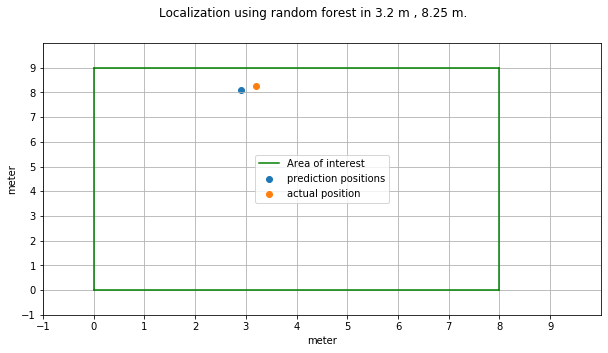

Nilai MAE untuk RF: 0.34 meter.

Lantai 2.0.


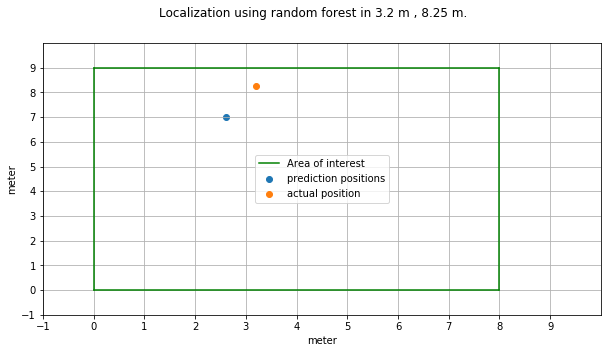

Nilai MAE untuk RF: 1.38 meter.

Lantai 2.0.


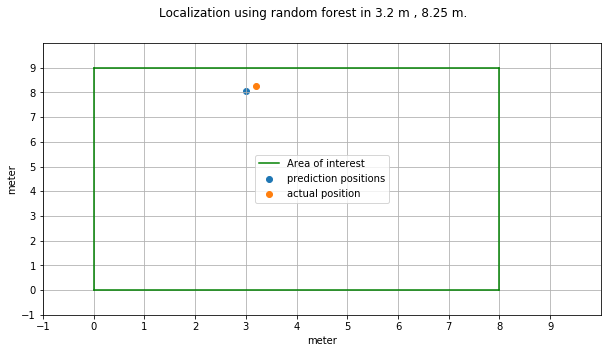

Nilai MAE untuk RF: 0.29 meter.

Lantai 2.0.


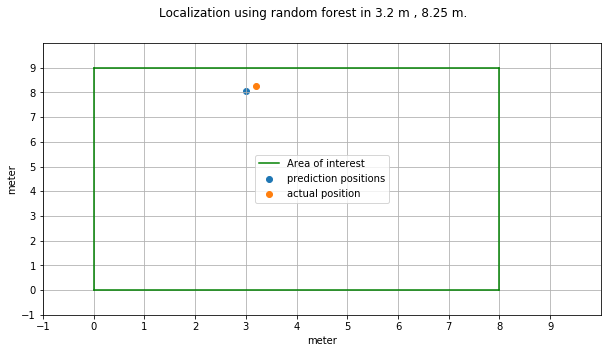

Nilai MAE untuk RF: 0.29 meter.

Lantai 2.0.


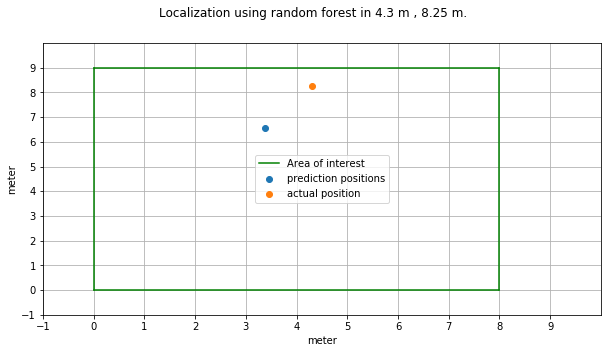

Nilai MAE untuk RF: 1.94 meter.

Lantai 2.0.


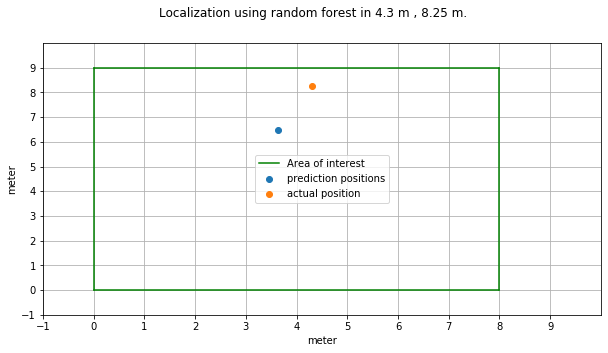

Nilai MAE untuk RF: 1.91 meter.

Lantai 2.0.


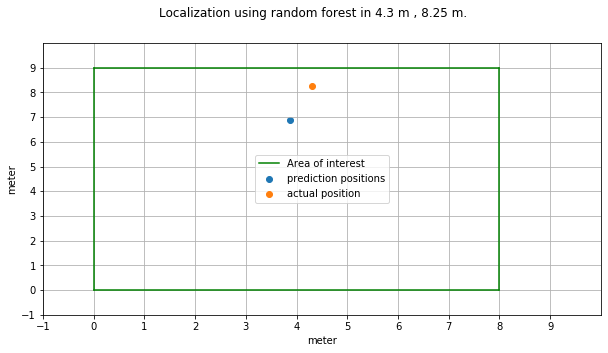

Nilai MAE untuk RF: 1.43 meter.

Lantai 2.0.


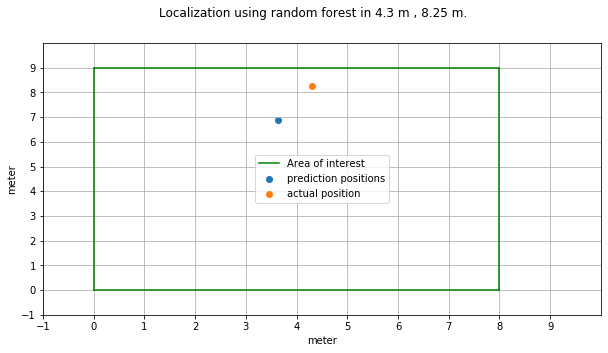

Nilai MAE untuk RF: 1.53 meter.

Lantai 2.0.


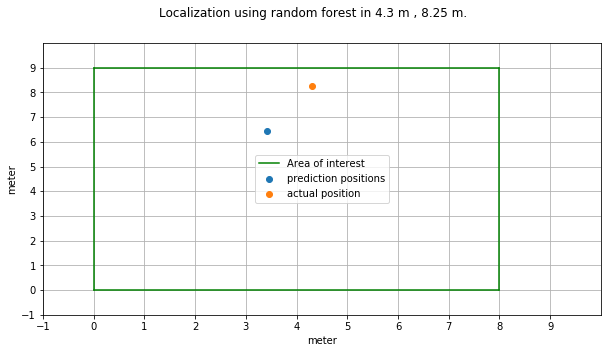

Nilai MAE untuk RF: 2.01 meter.

Lantai 2.0.


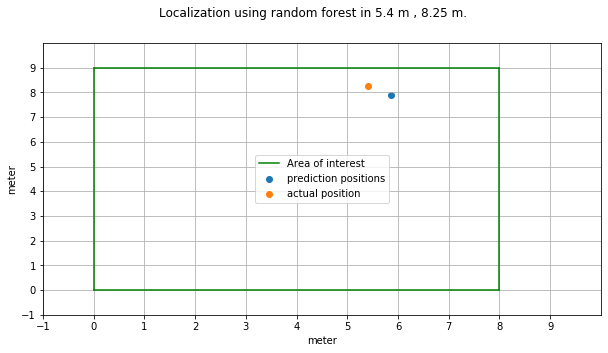

Nilai MAE untuk RF: 0.57 meter.

Lantai 2.0.


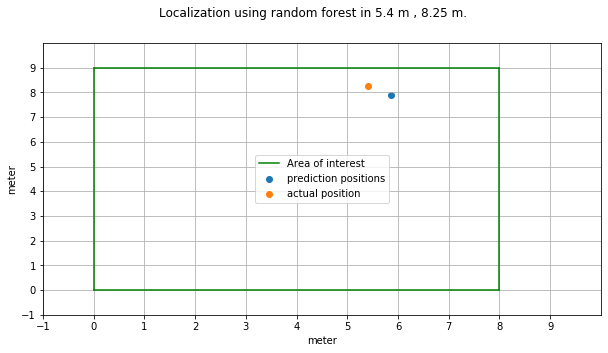

Nilai MAE untuk RF: 0.57 meter.

Lantai 2.0.


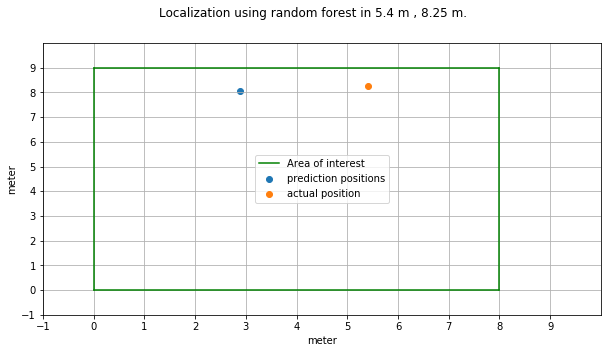

Nilai MAE untuk RF: 2.52 meter.

Lantai 2.0.


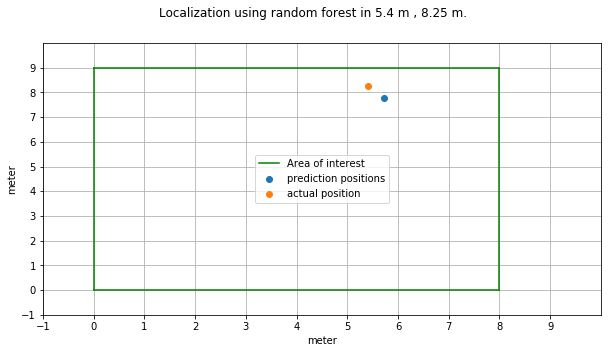

Nilai MAE untuk RF: 0.58 meter.

Lantai 2.0.


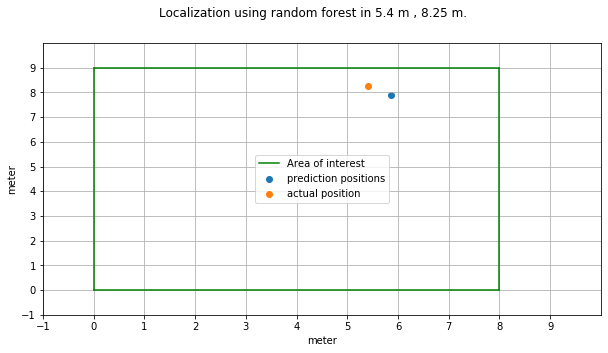

Nilai MAE untuk RF: 0.57 meter.

Lantai 2.0.


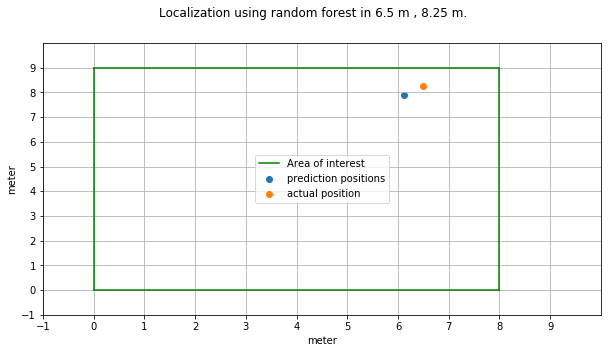

Nilai MAE untuk RF: 0.51 meter.

Lantai 2.0.


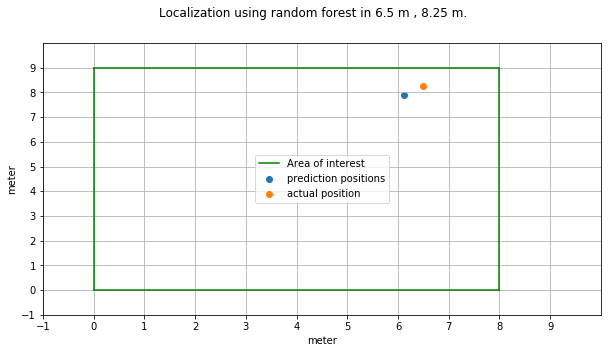

Nilai MAE untuk RF: 0.51 meter.

Lantai 2.0.


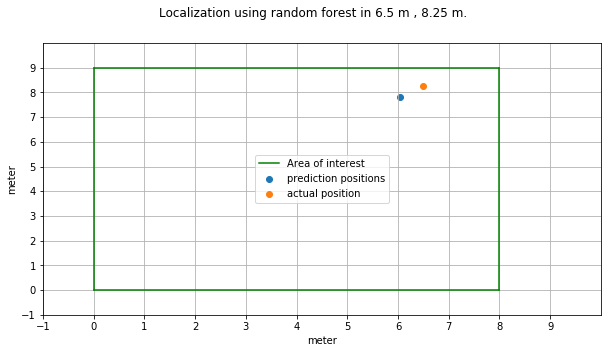

Nilai MAE untuk RF: 0.64 meter.

Lantai 2.0.


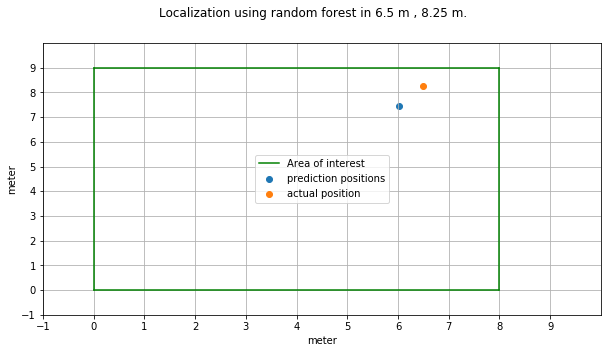

Nilai MAE untuk RF: 0.95 meter.

Lantai 2.0.


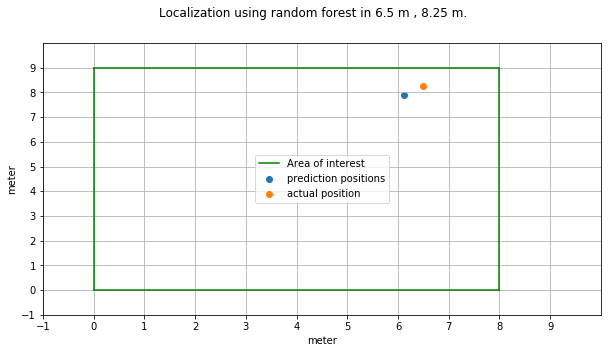

Nilai MAE untuk RF: 0.51 meter.



In [61]:
mse = 0
tabel =pd.DataFrame(columns=['lt_true','lt_pred','error_lt','x_true','y_true','x_pred','y_pred','error_loc'])
for i in range(X_test_full.shape[0]):
    pred1_lantai = best_rf3.predict(X_test_full.iloc[i].to_numpy().reshape(1, -1))
    print('Lantai {}.'.format(str(pred1_lantai[0])))

    
    if pred1_lantai == 1:
        
        pred_loc1 = best_rf1.predict(X_test_full.iloc[i].to_numpy().reshape(1, -1))
        
        label1 = y_test_full2.iloc[i].to_numpy().reshape(1, -1)
        
        fig = plt.figure(figsize=(10,5))
        fig.suptitle('Localization using random forest in {x} m , {y} m.'.format(x=label1[0][0], y=label1[0][1]), fontsize=12)
        ax = fig.gca()
        ax.set(xlim=(-1,10), ylim=(-1, 10))
        ax.set_ylabel('meter')
        ax.set_xlabel('meter')
        plt.yticks(np.arange(-1, 10, step=1))
        plt.xticks(np.arange(-1, 10, step=1))
        x_1 = [0, 7]
        y_1 = [0, 0]
        x_2 = [7, 7]
        y_2 = [0, 8]
        x_3 = [7, 0]
        y_3 = [8, 8]
        x_4 = [0, 0]
        y_4 = [8, 0]
        plt.plot(x_1, y_1,color='green',label='Area of interest')
        plt.plot(x_2, y_2,color='green')
        plt.plot(x_3, y_3,color='green')
        plt.plot(x_4, y_4,color='green')
        plt.scatter(pred_loc1[0][0],pred_loc1[0][1],label='prediction positions')
        plt.scatter(label1[0][0],label1[0][1],label='actual position')
        plt.grid()
        ax.legend()
        plt.show()

        mse = mse + custom_mse(label1,pred_loc1)
        print('Nilai MAE untuk RF: {:0.2f} meter.'.format(custom_mse(label1,pred_loc1)))
        print(pred_loc1[0][0])
        tabel = tabel.append({'lt_true': y_test_full.iloc[i][0], 'lt_pred': str(pred1_lantai[0]), 
                              'x_true': label1[0][0],'x_pred':round(pred_loc1[0][0],2),
                              'y_true': label1[0][1],'y_pred':round(pred_loc1[0][1],2),
                              'error_lt':y_test_full.iloc[i][0]-float(pred1_lantai[0]),
                              'error_loc':round(custom_mse(label1,pred_loc1),2)}, ignore_index=True)
        print('')
        
    if pred1_lantai == 2:
        pred_loc2 = best_rf2.predict(X_test_full.iloc[i].to_numpy().reshape(1, -1))
        
        label2 = y_test_full2.iloc[i].to_numpy().reshape(1, -1)
        
        fig = plt.figure(figsize=(10,5))
        fig.suptitle('Localization using random forest in {x} m , {y} m.'.format(x=label2[0][0], y=label2[0][1]), fontsize=12)
        ax = fig.gca()
        ax.set(xlim=(-1,10), ylim=(-1, 10))
        ax.set_ylabel('meter')
        ax.set_xlabel('meter')
        plt.yticks(np.arange(-1, 10, step=1))
        plt.xticks(np.arange(-1, 10, step=1))
        x_1 = [0, 8]
        y_1 = [0, 0]
        x_2 = [8, 8]
        y_2 = [0, 9]
        x_3 = [8, 0]
        y_3 = [9, 9]
        x_4 = [0, 0]
        y_4 = [9, 0]
        plt.plot(x_1, y_1,color='green',label='Area of interest')
        plt.plot(x_2, y_2,color='green')
        plt.plot(x_3, y_3,color='green')
        plt.plot(x_4, y_4,color='green')
        plt.scatter(pred_loc2[0][0],pred_loc2[0][1],label='prediction positions')
        plt.scatter(label2[0][0],label2[0][1],label='actual position')
        plt.grid()
        ax.legend()
        plt.show()

        mse = mse + custom_mse(label2,pred_loc2)
        print('Nilai MAE untuk RF: {:0.2f} meter.'.format(custom_mse(label2,pred_loc2)))
        tabel = tabel.append({'lt_true': y_test_full.iloc[i][0], 'lt_pred': str(pred1_lantai[0]), 
                              'x_true': label2[0][0],'x_pred':round(pred_loc2[0][0],2),
                              'y_true': label2[0][1],'y_pred':round(pred_loc2[0][1],2),
                              'error_lt':float(y_test_full.iloc[i][0])-float(pred1_lantai[0]),
                              'error_loc':round(custom_mse(label2,pred_loc2),2)}, ignore_index=True)
        print('')

In [24]:
print(mse/260)

0.9020516184795192


In [101]:
tabel1

lt_true lt_pred  error_lt  x_true  y_true  x_pred  y_pred  error_loc
0       1.0     1.0       0.0     1.0    1.57    1.00    1.57       0.00
1       1.0     1.0       0.0     1.0    1.57    1.78    1.76       0.80
2       1.0     1.0       0.0     1.0    1.57    1.00    1.57       0.00
3       1.0     1.0       0.0     1.0    1.57    1.00    1.57       0.00
4       1.0     1.0       0.0     1.0    1.57    1.00    1.57       0.00
..      ...     ...       ...     ...     ...     ...     ...        ...
95      1.0     1.0       0.0     5.8    7.27    5.80    7.27       0.00
96      1.0     1.0       0.0     5.8    7.27    5.80    7.27       0.00
97      1.0     1.0       0.0     5.8    7.27    4.94    4.01       3.37
98      1.0     1.0       0.0     5.8    7.27    5.80    7.27       0.00
99      1.0     1.0       0.0     5.8    7.27    4.40    6.19       1.77

[100 rows x 8 columns]

In [63]:
tabel.to_excel('multistorey eval.xlsx')

In [78]:
tabel1=tabel.loc[(tabel.iloc[:,1]==str(1.0))]
tabel2=tabel.loc[(tabel.iloc[:,1]==str(2.0))]

In [118]:
tabel2

lt_true lt_pred  error_lt  x_true  y_true  x_pred  y_pred  error_loc
100      2.0     2.0       0.0     1.0    1.00    2.36    2.02       1.70
101      2.0     2.0       0.0     1.0    1.00    2.36    1.99       1.69
102      2.0     2.0       0.0     1.0    1.00    2.31    2.00       1.65
103      2.0     2.0       0.0     1.0    1.00    2.36    1.99       1.69
104      2.0     2.0       0.0     1.0    1.00    1.97    2.48       1.77
..       ...     ...       ...     ...     ...     ...     ...        ...
255      2.0     2.0       0.0     6.5    8.25    6.13    7.91       0.51
256      2.0     2.0       0.0     6.5    8.25    6.13    7.91       0.51
257      2.0     2.0       0.0     6.5    8.25    6.04    7.80       0.64
258      2.0     2.0       0.0     6.5    8.25    6.02    7.43       0.95
259      2.0     2.0       0.0     6.5    8.25    6.13    7.91       0.51

[160 rows x 8 columns]

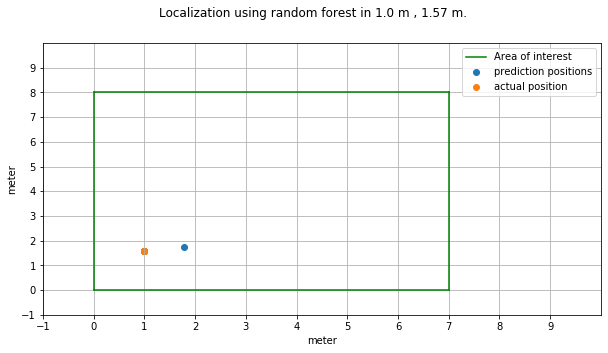

Nilai MAE: 0.16 meter.


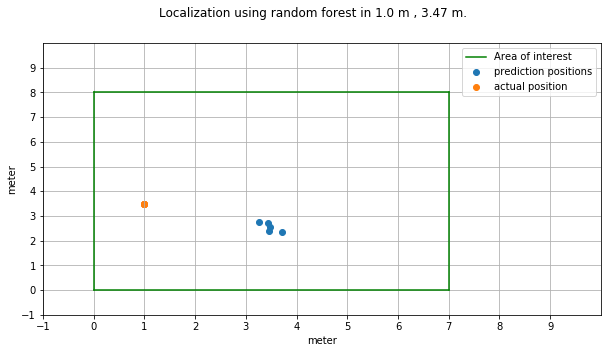

Nilai MAE: 2.64 meter.


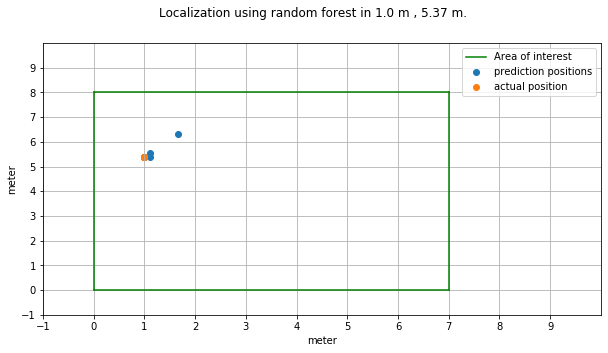

Nilai MAE: 0.30 meter.


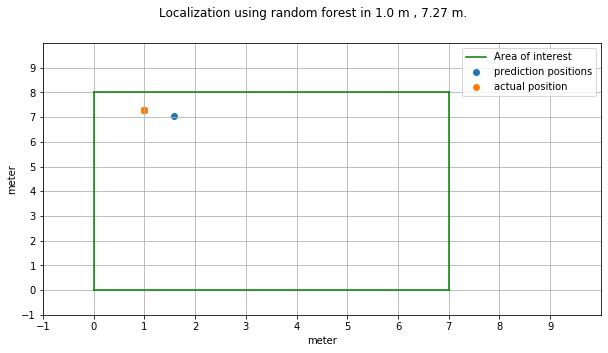

Nilai MAE: 0.12 meter.


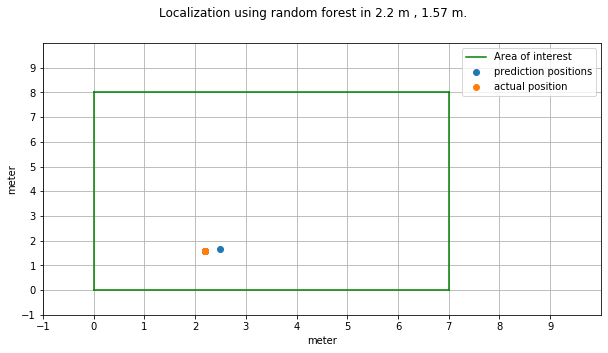

Nilai MAE: 0.06 meter.


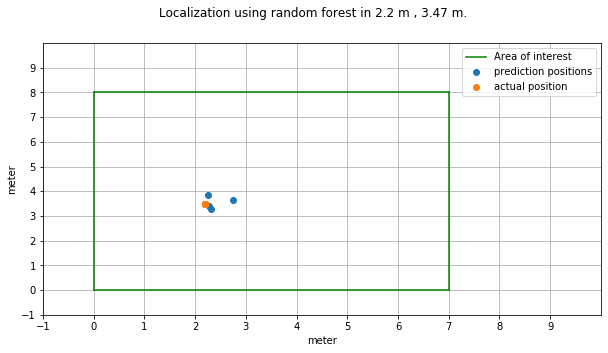

Nilai MAE: 0.26 meter.


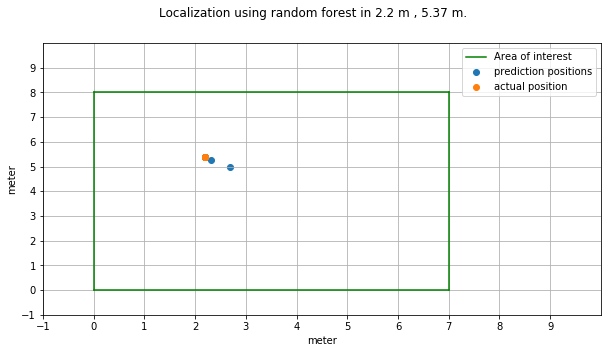

Nilai MAE: 0.15 meter.


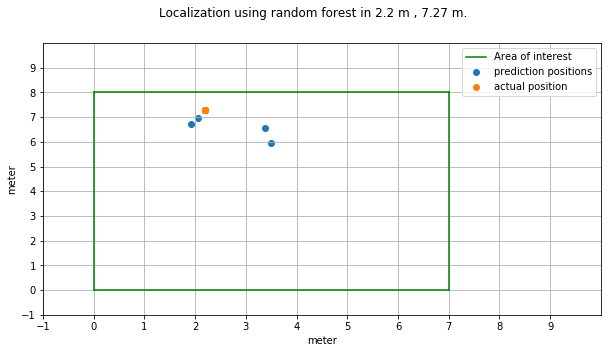

Nilai MAE: 0.84 meter.


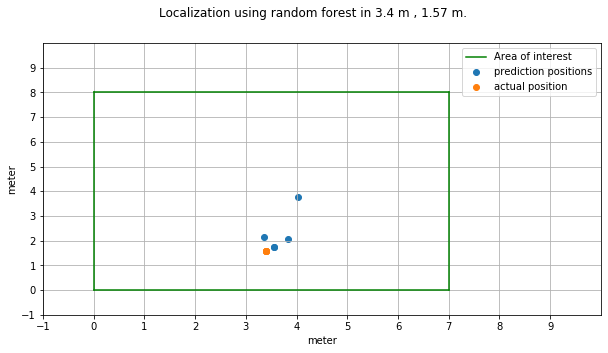

Nilai MAE: 0.80 meter.


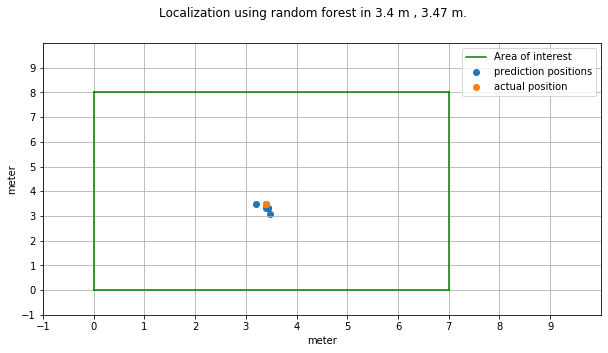

Nilai MAE: 0.22 meter.


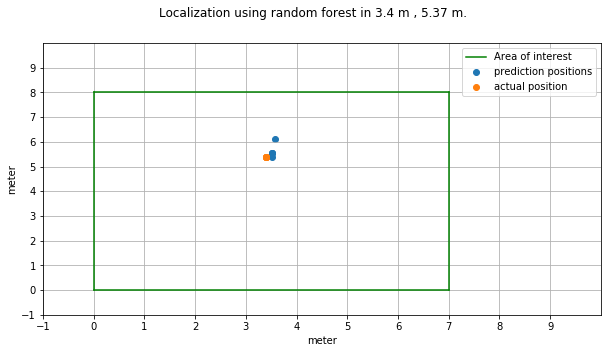

Nilai MAE: 0.31 meter.


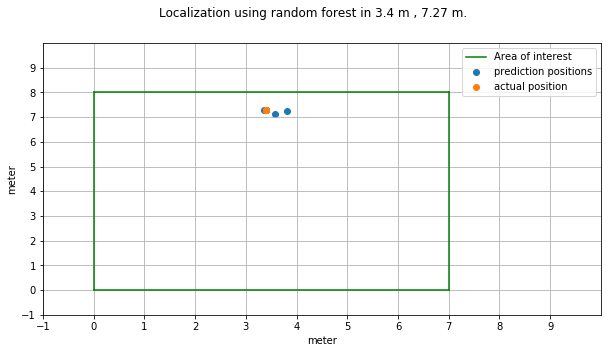

Nilai MAE: 0.14 meter.


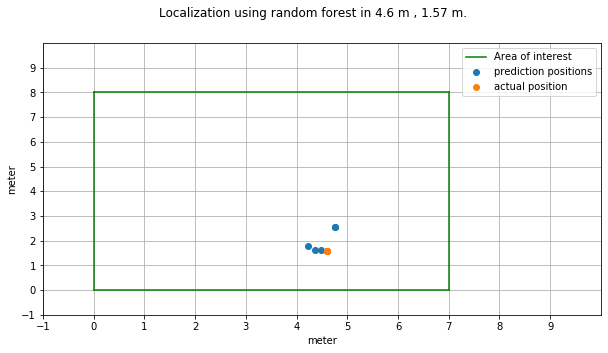

Nilai MAE: 0.56 meter.


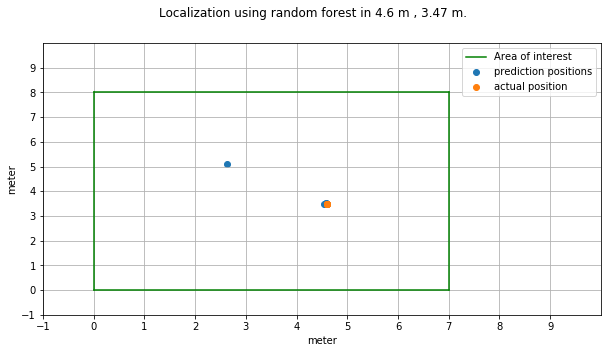

Nilai MAE: 0.55 meter.


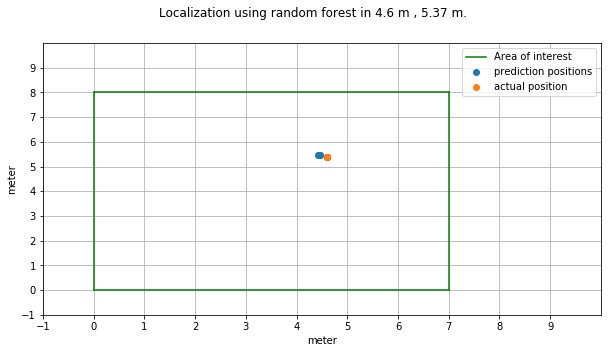

Nilai MAE: 0.11 meter.


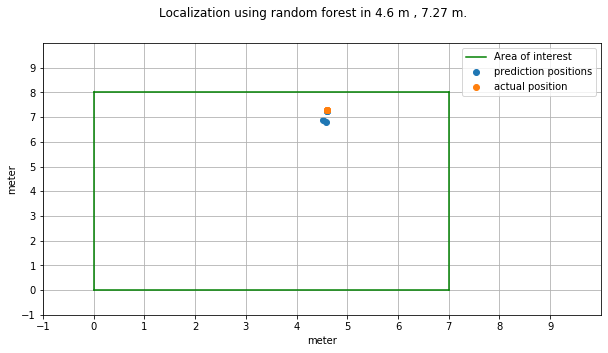

Nilai MAE: 0.18 meter.


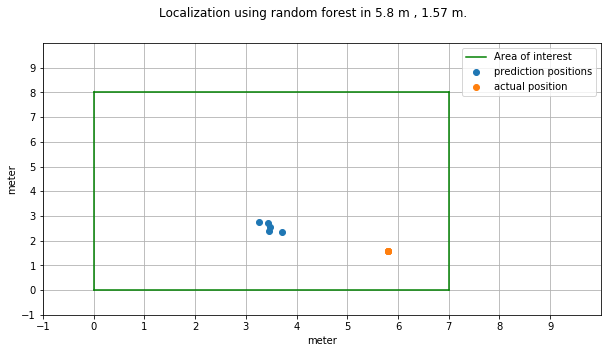

Nilai MAE: 2.53 meter.


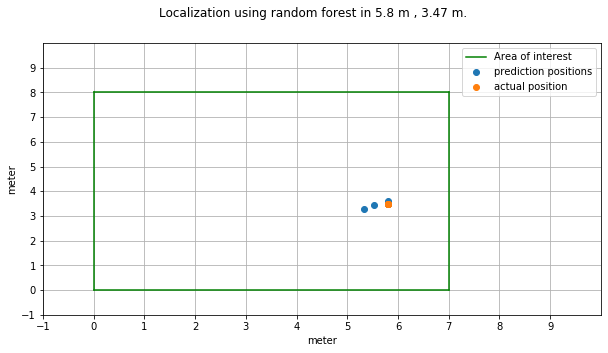

Nilai MAE: 0.18 meter.


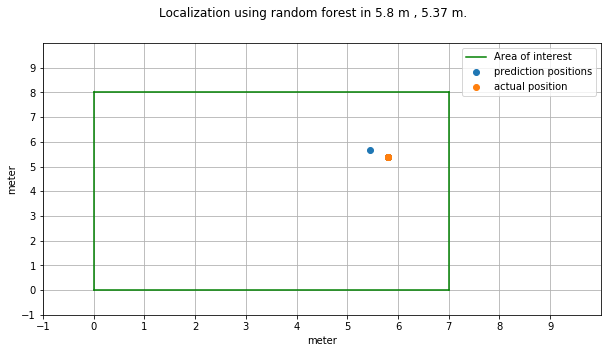

Nilai MAE: 0.09 meter.


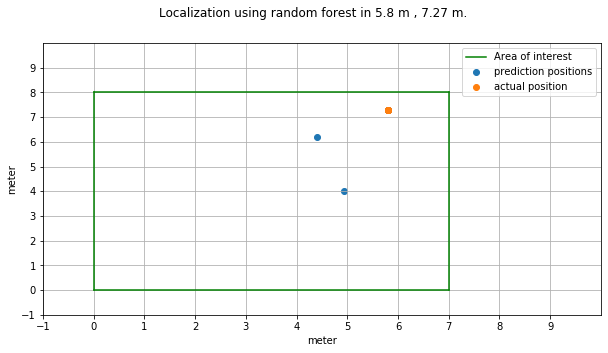

Nilai MAE: 1.03 meter.


In [122]:
for j in range(5):
    for k in range(4):
        t1= tabel1.loc[(tabel1.iloc[:,3]==1+1.2*j) & (tabel1.iloc[:,4]==round(1.57+1.90*k,2))]
        xt1=t1.iloc[:,3]
        yt1=t1.iloc[:,4]
        xp1=t1.iloc[:,5]
        yp1=t1.iloc[:,6]
        fig = plt.figure(figsize=(10,5))
        fig.suptitle('Localization using random forest in {x} m , {y} m.'.format(x=1+1.2*j, y=round(1.57+1.90*k,2)), fontsize=12)
        ax = fig.gca()
        ax.set(xlim=(-1,10), ylim=(-1, 10))
        ax.set_ylabel('meter')
        ax.set_xlabel('meter')
        plt.yticks(np.arange(-1, 10, step=1))
        plt.xticks(np.arange(-1, 10, step=1))
        x_1 = [0, 7]
        y_1 = [0, 0]
        x_2 = [7, 7]
        y_2 = [0, 8]
        x_3 = [7, 0]
        y_3 = [8, 8]
        x_4 = [0, 0]
        y_4 = [8, 0]
        plt.plot(x_1, y_1,color='green',label='Area of interest')
        plt.plot(x_2, y_2,color='green')
        plt.plot(x_3, y_3,color='green')
        plt.plot(x_4, y_4,color='green')
        plt.scatter(xp1,yp1,label='prediction positions')
        plt.scatter(xt1,yt1,label='actual position')
        plt.grid()
        ax.legend()
        plt.show()
        
        print('Nilai MAE: {:0.2f} meter.'.format(custom_mse(t1.iloc[:,3:5].to_numpy(),t1.iloc[:,5:7].to_numpy())))

In [ ]:
for j in range(5):
    for k in range(4):
        t1= tabel1.loc[(tabel1.iloc[:,3]==1+1.2*j) & (tabel1.iloc[:,4]==round(1.57+1.90*k,2))]
        xt1=t1.iloc[:,3]
        yt1=t1.iloc[:,4]
        xp1=t1.iloc[:,5]
        yp1=t1.iloc[:,6]
        fig = plt.figure(figsize=(10,5))
        fig.suptitle('Localization using random forest in {x} m , {y} m.'.format(x=1+1.2*j, y=round(1.57+1.90*k,2)), fontsize=12)
        ax = fig.gca()
        ax.set(xlim=(-1,10), ylim=(-1, 10))
        ax.set_ylabel('meter')
        ax.set_xlabel('meter')
        plt.yticks(np.arange(-1, 10, step=1))
        plt.xticks(np.arange(-1, 10, step=1))
        x_1 = [0, 7]
        y_1 = [0, 0]
        x_2 = [7, 7]
        y_2 = [0, 8]
        x_3 = [7, 0]
        y_3 = [8, 8]
        x_4 = [0, 0]
        y_4 = [8, 0]
        plt.plot(x_1, y_1,color='green',label='Area of interest')
        plt.plot(x_2, y_2,color='green')
        plt.plot(x_3, y_3,color='green')
        plt.plot(x_4, y_4,color='green')
        plt.scatter(xp1,yp1,label='prediction positions')
        plt.scatter(xt1,yt1,label='actual position')
        plt.grid()
        ax.legend()
        plt.show()
        
        print('Nilai MAE: {:0.2f} meter.'.format(custom_mse(t1.iloc[:,3:5].to_numpy(),t1.iloc[:,5:7].to_numpy())))

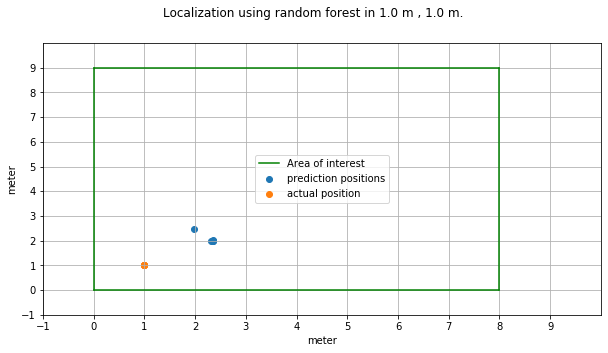

Nilai MAE: 1.70 meter.


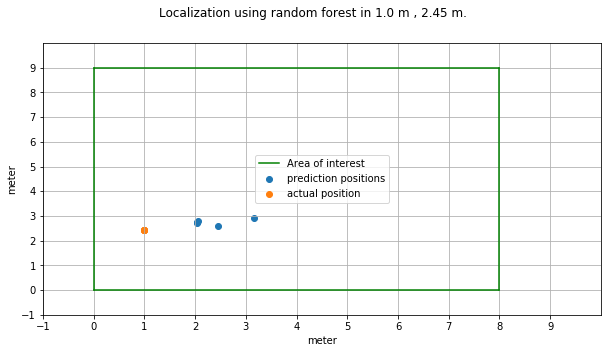

Nilai MAE: 1.39 meter.


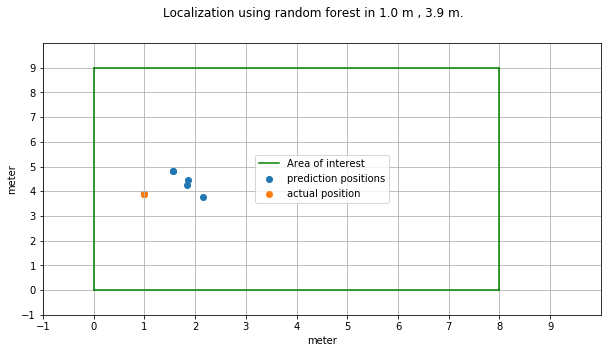

Nilai MAE: 1.05 meter.


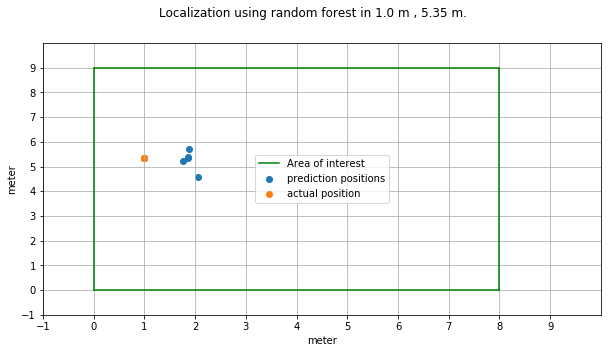

Nilai MAE: 0.95 meter.


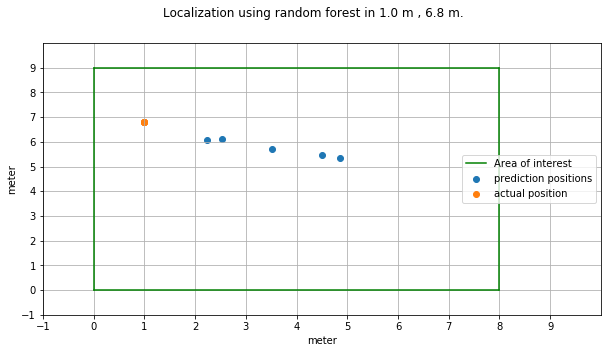

Nilai MAE: 2.74 meter.


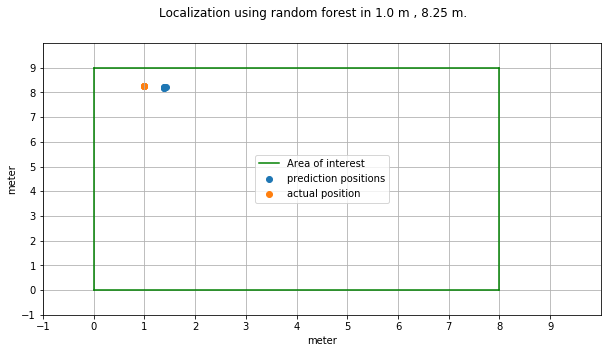

Nilai MAE: 0.40 meter.


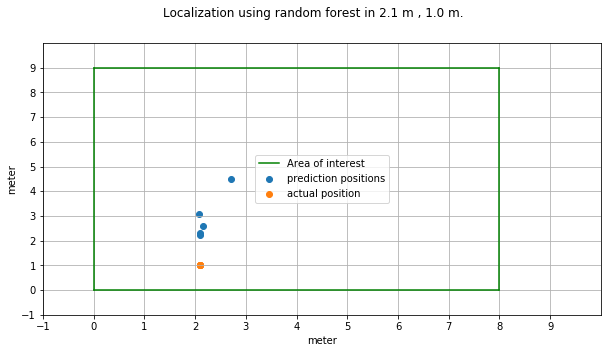

Nilai MAE: 1.94 meter.


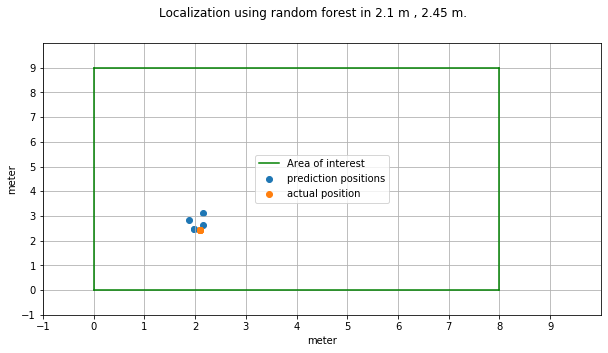

Nilai MAE: 0.31 meter.


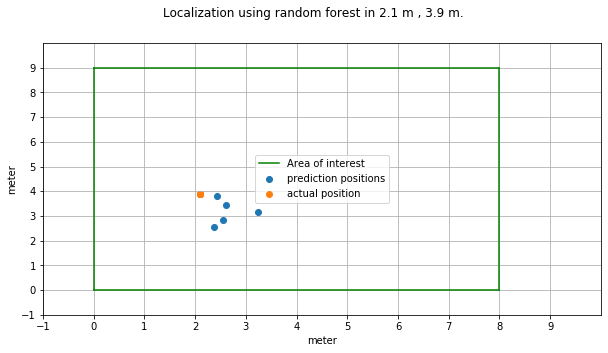

Nilai MAE: 0.98 meter.


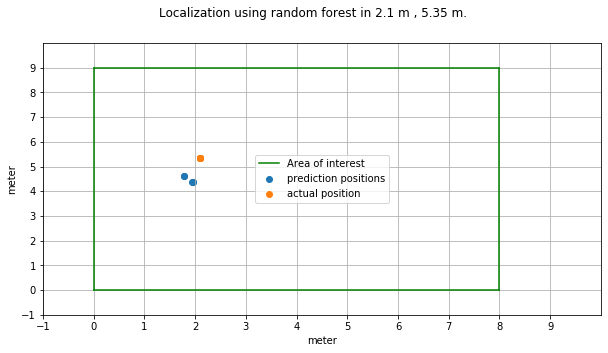

Nilai MAE: 0.90 meter.


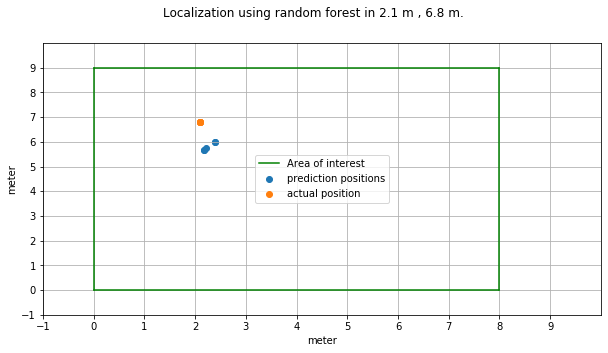

Nilai MAE: 1.00 meter.


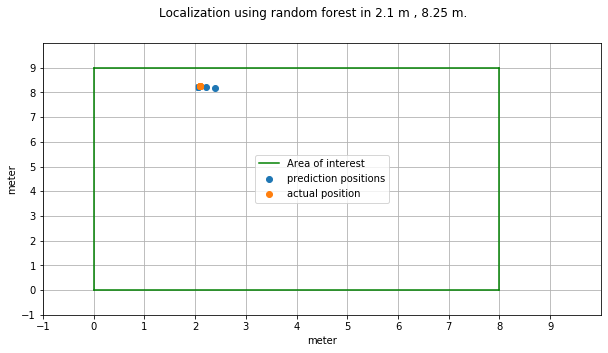

Nilai MAE: 0.12 meter.


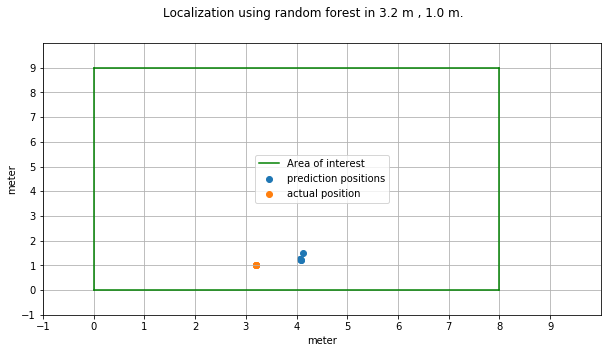

Nilai MAE: 0.94 meter.


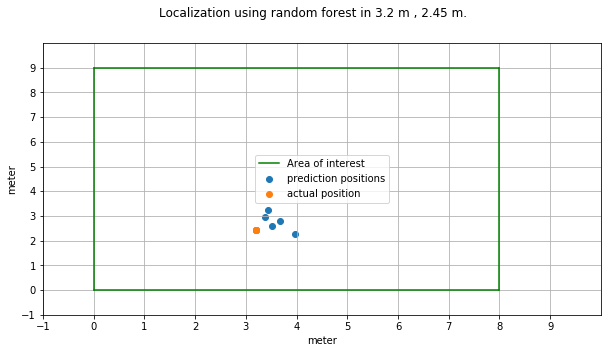

Nilai MAE: 0.62 meter.


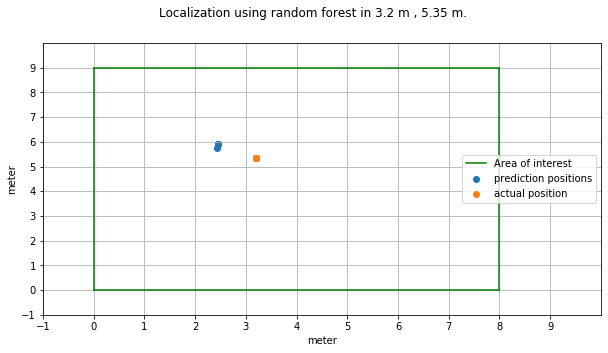

Nilai MAE: 0.91 meter.


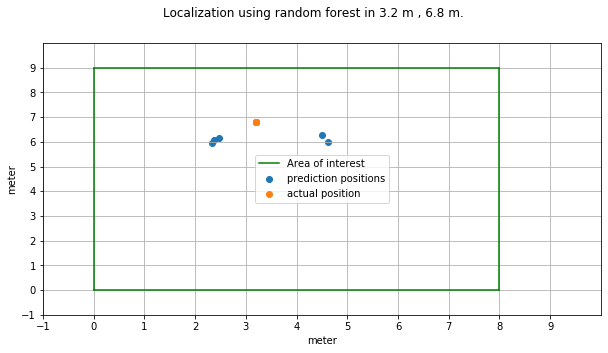

Nilai MAE: 1.26 meter.


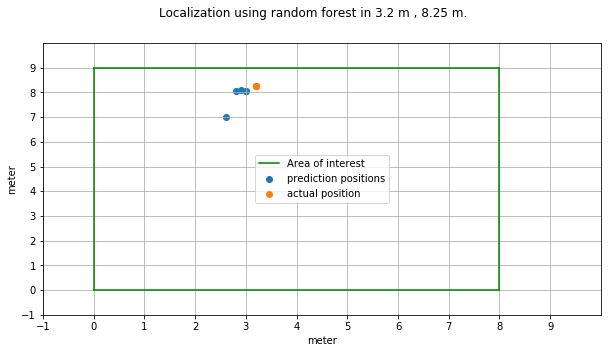

Nilai MAE: 0.55 meter.


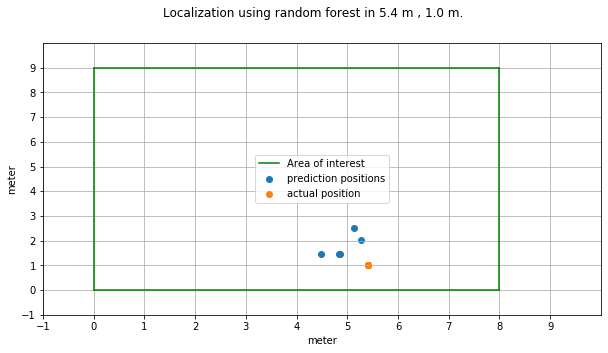

Nilai MAE: 1.01 meter.


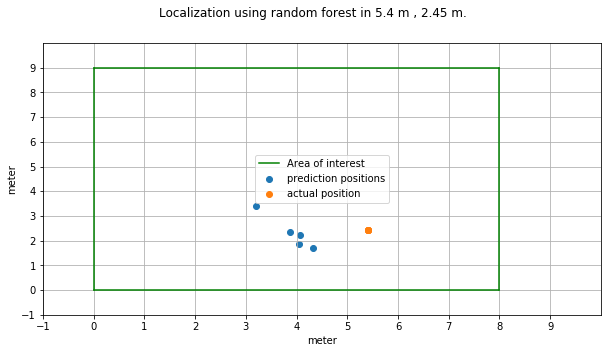

Nilai MAE: 1.61 meter.


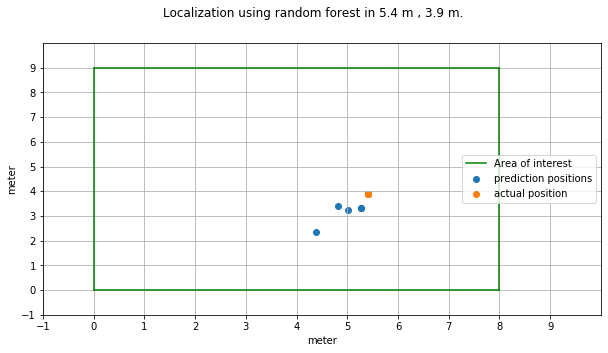

Nilai MAE: 0.91 meter.


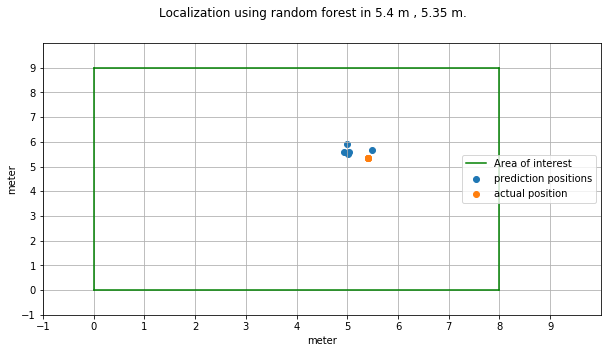

Nilai MAE: 0.48 meter.


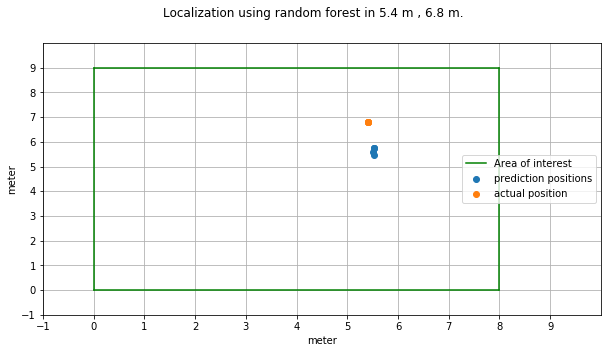

Nilai MAE: 1.14 meter.


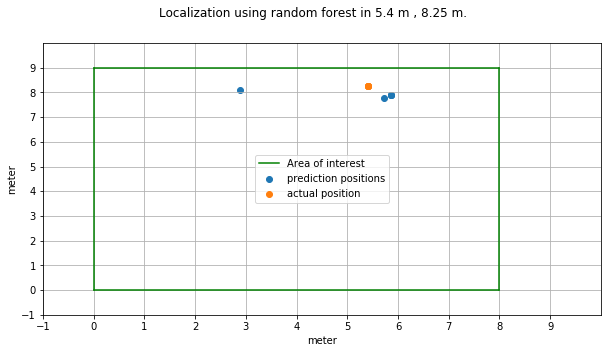

Nilai MAE: 0.96 meter.


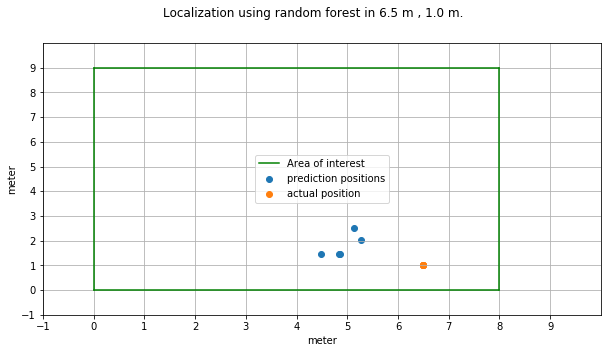

Nilai MAE: 1.83 meter.


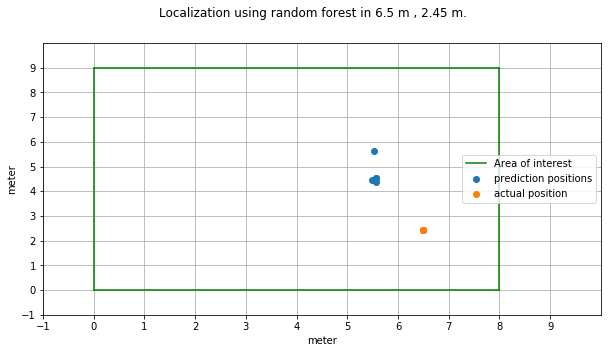

Nilai MAE: 2.45 meter.


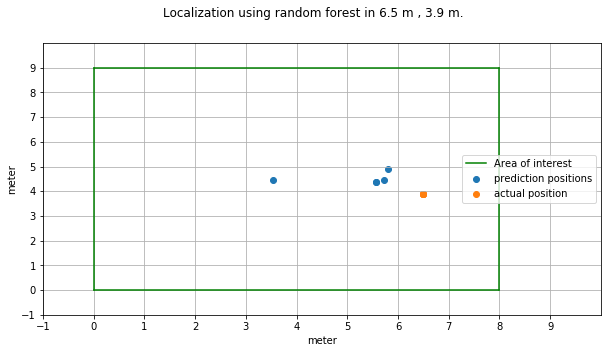

Nilai MAE: 1.46 meter.


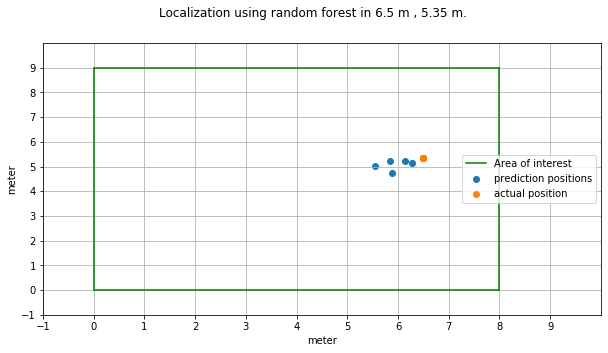

Nilai MAE: 0.65 meter.


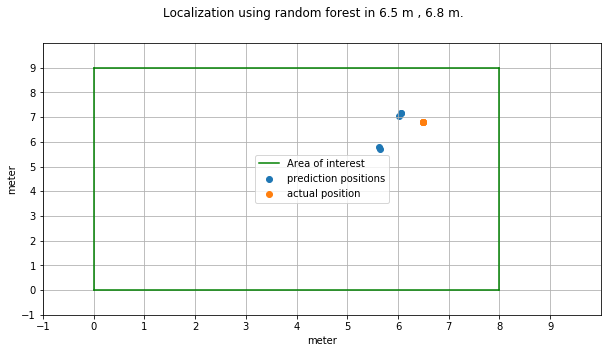

Nilai MAE: 0.88 meter.


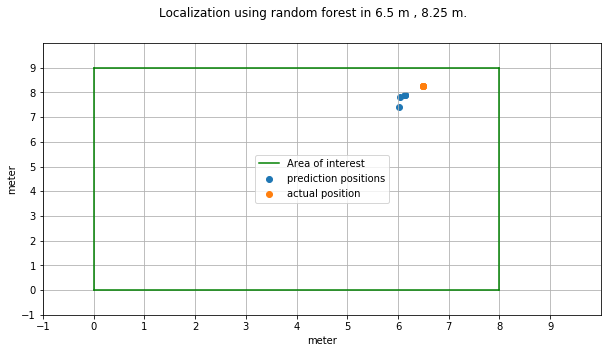

Nilai MAE: 0.62 meter.


In [124]:
for m in range(6):
    for n in range(6):
        t2= tabel2.loc[(tabel2.iloc[:,3]==1+1.1*m) & (tabel2.iloc[:,4]==round(1+1.45*n,2))]
        
        xt2=t2.iloc[:,3]
        yt2=t2.iloc[:,4]
        xp2=t2.iloc[:,5]
        yp2=t2.iloc[:,6]
        
        isempty = t2.empty
        if isempty == True:
            continue
            
        fig = plt.figure(figsize=(10,5))
        fig.suptitle('Localization using random forest in {x} m , {y} m.'.format(x=1+1.1*m, y=round(1+1.45*n,2)), fontsize=12)
        ax = fig.gca()
        ax.set(xlim=(-1,10), ylim=(-1, 10))
        ax.set_ylabel('meter')
        ax.set_xlabel('meter')
        plt.yticks(np.arange(-1, 10, step=1))
        plt.xticks(np.arange(-1, 10, step=1))
        x_1 = [0, 8]
        y_1 = [0, 0]
        x_2 = [8, 8]
        y_2 = [0, 9]
        x_3 = [8, 0]
        y_3 = [9, 9]
        x_4 = [0, 0]
        y_4 = [9, 0]
        plt.plot(x_1, y_1,color='green',label='Area of interest')
        plt.plot(x_2, y_2,color='green')
        plt.plot(x_3, y_3,color='green')
        plt.plot(x_4, y_4,color='green')
        plt.scatter(xp2,yp2,label='prediction positions')
        plt.scatter(xt2,yt2,label='actual position')
        plt.grid()
        ax.legend()
        plt.show()
        
        print('Nilai MAE: {:0.2f} meter.'.format(custom_mse(t2.iloc[:,3:5].to_numpy(),t2.iloc[:,5:7].to_numpy())))